<a href="https://colab.research.google.com/github/shalemrajkumar/recurrent_neural_networks/blob/main/Analysis_Automation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Data_Structuring***

## Usage : Add Data.csv files in root and Run   // And upload df_2 (trait_scores) in sample data folder

In [ ]:
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
# get a list of all CSV files in the current directory

csv_files = glob.glob('*.csv')

#Get Trait - State scores df

path = 'sample_data/df_2.csv'

try:
  ts_score = pd.read_csv(path)
except:
  print('Upload trait and state scores in "Trait_score folder" with name df_2.csv')

In [ ]:
# create an empty dictionary to store the DataFrames
dfs = {}
count = 0
Names = []  #Empty list for Subject Names
Scores = []  #Empty list for Subject Scores
ids = []
Trait_score = []
State_score = []

# Subject id generator

def hash(input_string):
    words = input_string.strip().split()
    words = words[:5]
    numerical_values = [sum(ord(char) for char in word) for word in words]
    result = sum(numerical_values) * len(numerical_values) + 42 + (ord(words[0][0]))
    id_value = result % 100000
    return id_value

In [ ]:
# loop over the CSV files and import them as DataFrames

for file in csv_files:
    df_name = file.split('.')[0]  # use the file name without extension as the DataFrame name
    dfs[count] = pd.read_csv(file, na_values='-')
    Names.append(df_name)
    ids.append(hash(df_name))
    count += 1


In [ ]:
for i in range(len(dfs)):
    dfs[i]['Reward']=dfs[i]['Reward'].astype({'Reward':'string'})
    dfs[i]['Reward']=dfs[i]['Reward'].astype({'Reward':'float'})
    a = dfs[i]['Reward'].sum()
    r = dfs[i][dfs[i]['Terrain'] == "T"]
    a -= r['Reward'].sum()
    Scores.append(a) #calculating score of each subject



# Processing Trait and state anexity


try:
  ts_score = ts_score.rename(columns={'Unnamed: 0':'Names'})  #name column is empty so renaming it to "Names"
  for i in range(len(Names)):
    t_score = None
    s_score = None
    for j in range(len(ts_score['Names'])):
      if(Names[i][:5].lower() == ts_score['Names'][j][:5].lower()):      #works by checking first five letters of name
            t_score = ts_score.loc[:,'trait_score'][j]
            s_score = ts_score.loc[:,'State_score'][j]
    Trait_score.append(t_score)
    State_score.append(s_score)
except:
    print('Error getting Trait scores')

In [ ]:
    # df = pd.DataFrame({'Subject ID': ids,'Subject Name': Names,'Subject Score': Scores, 'Trait_score' : Trait_score, 'State_score' : State_score})

In [ ]:
try:
  if len(State_score) != 0 :
    df = pd.DataFrame({'Subject ID': ids,'Subject Name': Names,'Subject Score': Scores, 'Trait_score' : Trait_score, 'State_score' : State_score})
except:
    df = pd.DataFrame({'Subject ID': ids,'Subject Name': Names,'Subject Score': Scores})
    print("Error making df from trait scores")

# try:
#     if len(State_score) != 0 :
#         df = pd.DataFrame({'Subject ID': ids,'Subject Name': Names,'Subject Score': Scores, 'Trait_score' : Trait_score, 'State_score' : State_score})
# except:
#     try:
#         df = pd.DataFrame({'Subject ID': ids,'Subject Name': Names,'Subject Score': Scores, 'Trait_score' : Trait_score, 'State_score' : State_score})
#     except:
#         print("Error making df from trait scores")
#         df = pd.DataFrame({'Subject ID': ids,'Subject Name': Names,'Subject Score': Scores})

In [ ]:
df

Subject ID            Subject Name  Subject Score  Trait_score  \
0         2050  Swarnima_02_06_23_data         1751.0           40   
1         1910   Bhaumik_28_04_23_data         2064.0           33   
2         1849    Ritvik_03_06_23_data         2512.0           42   
3         1993  Abhijeet_01_06_23_data         2696.0           28   
4         1816    Naveen_02_06_23_data         1901.0           45   
5         1734      Sahithi_12_05_data         2351.0           54   
6         1623       Rakesh_10_05_data         2315.0           26   
7         1737      Saranya_10_05_data         1581.0           52   
8         2034  Purbasha_01_06_23_data         1561.0           52   
9         1513        Kanav_16_05_data         1766.0           40   
10        1969   Sumouli_05_06_23_data         2389.0           61   
11        1853     Kartikey_08_05_data         2615.0           59   
12        1710      Aravind_20_05_data         2803.0           53   
13        1626       Shashi_10_05_data         2060.0           42   
14        1621       Riddhi_18_05_data         1118.0           41   
15        1808     Abhishek_29_04_data         2948.0           29   
16        1528        Mudit_11_05_data         2280.0           47   
17        1732     Priti_01_06_23_data         1821.0           58   
18        1500        Aditi_19_05_data         2631.0           36   
19        1542        Tanvi_29_04_data         2555.0           43   
20        1609        jyoti_29_04_data         1370.0           42   
21        1728      Jayanth_10_05_data         2428.0           44   
22        1916   Niliena_03_06_23_data         1952.0           67   
23        1606       Raghib_10_05_data         1499.0           56   

    State_score  
0            34  
1            29  
2            40  
3            22  
4            28  
5            59  
6            22  
7            43  
8            46  
9            40  
10           41  
11           61  
12           50  
13           37  
14           39  
15           31  
16           52  
17           46  
18           42  
19           47  
20           24  
21           48  
22           62  
23           57

In [ ]:
df1 = pd.DataFrame()
custom_order = {'T': 0, '1': 1, '2': 2, '3': 3, '4': 4}
classes = ['ApproachT', 'AvoidT', 'Approach1', 'Avoid1', 'Approach2', 'Avoid2', 'Approach3', 'Avoid3', 'Approach4', 'Avoid4']

In [ ]:
for i in range(len(dfs)):
    # Performed 1 aggregation grouped on columns: 'Terrain', 'Decision'
    b = dfs[i].groupby(['Terrain', 'Decision']).agg(Decision_count=('Decision', 'count')).reset_index()


    b = b.sort_values('Terrain', key=lambda x: x.map(custom_order))
    b['Type'] = b['Decision'] + b['Terrain']
    b = b.drop(['Decision'], axis = 1)

    temp_comp_arr = [val for val in b["Type"]]

    for j in classes:
        if j not in temp_comp_arr:
            new_row = { "Type": f"{j}", "Decision_count": 0, "Terrain": j[-1]}
            b = b.append(new_row, ignore_index=True)

    b = b.sort_values('Terrain', key=lambda x: x.map(custom_order))

#     print(b)

    for terrain in b["Terrain"].unique():
        total = b.loc[b["Terrain"] == f"{terrain}", "Decision_count"].sum()
        new_row = { "Type": f"Total_{terrain}", "Decision_count": total, "Terrain": terrain}
        b = b.append(new_row, ignore_index=True)
#     print(dfs[i])


    b = b.sort_values('Terrain', key=lambda x: x.map(custom_order))
    b = b.drop(['Terrain'], axis = 1)
    b = b.set_index('Type')
    df1 = pd.concat([df1, b], axis=1)

<ipython-input-163-5cb38b51a06a>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  b = b.append(new_row, ignore_index=True)
<ipython-input-163-5cb38b51a06a>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  b = b.append(new_row, ignore_index=True)
<ipython-input-163-5cb38b51a06a>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  b = b.append(new_row, ignore_index=True)
<ipython-input-163-5cb38b51a06a>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  b = b.append(new_row, ignore_index=True)
<ipython-input-163-5cb38b51a06a>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use p

In [ ]:
classes1 = []
temp = pd.DataFrame()
temp1 = pd.DataFrame()

In [ ]:
for i in range(len(dfs)):
    # Performed 1 aggregation grouped on columns: 'Tree', 'Decision'
    c = dfs[i].groupby(['Tree', 'Decision']).agg(Decision_count=('Decision', 'count')).reset_index()

    c['Type'] = c['Decision'] + c['Tree']
    c = c.drop(['Decision'], axis = 1)


    for tree in c["Tree"].unique():
        total = c.loc[c["Tree"] == f"{tree}", "Decision_count"].sum()
        new_row = { "Type": f"Total_{tree}", "Decision_count": total, "Tree": tree}
        c = c.append(new_row, ignore_index=True)
#     print(c)

    c = c.drop(['Tree'], axis = 1)
    c = c.set_index('Type')
    c = c.sort_values(by='Type', key=lambda x: x.str[-4:])

    temp = pd.concat([temp, c], axis=1)
    # print(temp)
df1 = pd.concat([df1, temp], axis=0)


<ipython-input-165-bbc2d3012311>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  c = c.append(new_row, ignore_index=True)
<ipython-input-165-bbc2d3012311>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  c = c.append(new_row, ignore_index=True)
<ipython-input-165-bbc2d3012311>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  c = c.append(new_row, ignore_index=True)
<ipython-input-165-bbc2d3012311>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  c = c.append(new_row, ignore_index=True)
<ipython-input-165-bbc2d3012311>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use p

In [ ]:
lst = ['T', '1', '2', '3', '4']
Trees = ['Blue', 'Green', 'Red']
Decision = ['Approach', 'Avoid', 'Total']

temp3 = pd.DataFrame()
temp4 = pd.DataFrame()
temp5 = pd.DataFrame()
temp6 = pd.DataFrame()
x1 = pd.DataFrame()
d5 = pd.DataFrame()

def replace_mean (LIST):
    # print(LIST)
    filtered_list = [value for value in LIST if value is not None]
    mean_value = np.average(filtered_list)
    # print(mean_value)
    for i in range(len(LIST)):
        if LIST[i] is None:
            LIST[i] = mean_value
    # print(LIST)
    return LIST


In [ ]:
for i in range(len(dfs)):
    x = dfs[i]
    x = x.groupby(['Decision']).agg(Decision_count=('Decision', 'count')).reset_index()
    x = x.rename(columns={'Decision': 'Type'})
    x.loc[0, 'Type'] = 'Total_Approach'
    x.loc[1, 'Type'] = 'Total_Avoid'
    x = x.set_index('Type')
    d4 = pd.DataFrame()
    x1 = pd.concat([x1, x], axis=1)
    d = dfs[i]
    for j in lst:
        d1 = d[(d['Terrain'] == f"{j}")].reset_index()
        for k in Trees:
            d2 = d1[(d1['Tree'] == f"{k}")].reset_index()
            d3 = d2.groupby(['Tree', 'Decision']).agg(Decision_count=('Decision', 'count')).reset_index()
            total = d3.loc[d3["Tree"] == f"{k}", "Decision_count"].sum()
            new_rows = { "Tree": f"{k}", "Decision":"Total","Decision_count": total}
            d3 = d3.append(new_rows, ignore_index=True)
            for z in Decision:
                y = d3[(d3['Decision'] == f"{z}")].reset_index()
                y = y.rename(columns={'Tree': 'Type'})
                y.loc[0, 'Type'] = f'Environment_{j}_{k}_Tree_{z}'
                y = y.set_index('Type')
                y = y.drop(['index'], axis = 1)
                y = y.drop(['Decision'], axis = 1)

                d4 = pd.concat([d4, y], axis=0)
    d5 = pd.concat([d5, d4], axis=1)
df1 = pd.concat([df1, x1], axis=0)
df1 = pd.concat([df1, d5], axis=0)

<ipython-input-167-a83e8406b5d0>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  d3 = d3.append(new_rows, ignore_index=True)
<ipython-input-167-a83e8406b5d0>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  d3 = d3.append(new_rows, ignore_index=True)
<ipython-input-167-a83e8406b5d0>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  d3 = d3.append(new_rows, ignore_index=True)
<ipython-input-167-a83e8406b5d0>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  d3 = d3.append(new_rows, ignore_index=True)
<ipython-input-167-a83e8406b5d0>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ve

In [ ]:
for i in range(len(dfs)):
    e = dfs[i]
    # Removing unwanted characters and replacing with None then with mean reaction time and convert a column from strings to floats
    terrain_stats = {}

    for j in lst:
        f = e[(e['Terrain'] == f"{j}")].reset_index()
        List = []
        for val in f.loc[:, "RevealTime"]:

            try:
                List.append(float(val[1:-2]))
            except:
                List.append(None)
        replace_mean(List)
        frame = pd.DataFrame(List, columns = ["RevealTime"])
        std = frame['RevealTime'].std()
        mean = frame['RevealTime'].mean()
        median = frame['RevealTime'].median()
        terrain_stats[f'Terrain_{j}_mean_RT'] = mean
        terrain_stats[f'Terrain_{j}_median_RT'] = median
        terrain_stats[f'Terrain_{j}_std_RT'] = std
    stats_df = pd.DataFrame.from_dict(terrain_stats, orient='index', columns=['Decision_count'])
    temp3 = pd.concat([stats_df, temp3], axis=1)
temp3 = temp3.iloc[:, ::-1]
df1 = pd.concat([df1, temp3], axis=0)

In [ ]:
for i in range(len(dfs)):
    g = dfs[i]
    # Removing unwanted characters and replacing with None then with mean reaction time and convert a column from strings to floats
    terrain_stats1 = {}
    tree_stats = {}
    for j in lst:
        h = g[(g['Terrain'] == f"{j}")].reset_index()
        for k in Trees:
            l = h[(h['Tree'] == f"{k}")].reset_index()
            List = []
            for val in l.loc[:, "RevealTime"]:
                try:
                    List.append(float(val[1:-2]))
                except:
                    List.append(None)
            replace_mean(List)
            frames = pd.DataFrame(List, columns = ["RevealTime"])
            std = frames['RevealTime'].std()
            mean = frames['RevealTime'].mean()
            median = frames['RevealTime'].median()
            tree_stats[f'Terrain_{j}_{k}_mean_RT'] = mean
            tree_stats[f'Terrain_{j}_{k}_median_RT'] = median
            tree_stats[f'Terrain_{j}_{k}_std_RT'] = std
    stats_tree = pd.DataFrame.from_dict(tree_stats, orient='index', columns=['Decision_count'])
    temp4 = pd.concat([stats_tree, temp4], axis=1)
temp4 = temp4.iloc[:, ::-1]
df1 = pd.concat([df1, temp4], axis=0)

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg 

In [ ]:
for i in range(len(dfs)):
    m = dfs[i]
    # Removing unwanted characters and replacing with None then with mean reaction time and convert a column from strings to floats
    tree_stats = {}
    for j in lst:
        n = m[(m['Terrain'] == f"{j}")].reset_index()
        List = []
        for val in n.loc[:, "DecisionTime"]:

            try:
                List.append(float(val[1:-2]))
            except:
                List.append(None)
        replace_mean(List)
        frame1 = pd.DataFrame(List, columns = ["DecisionTime"])
        std = frame1['DecisionTime'].std()
        mean = frame1['DecisionTime'].mean()
        median = frame1['DecisionTime'].median()
        terrain_stats1[f'Terrain_{j}_mean_DT'] = mean
        terrain_stats1[f'Terrain_{j}_median_DT'] = median
        terrain_stats1[f'Terrain_{j}_std_DT'] = std
    stats_df1 = pd.DataFrame.from_dict(terrain_stats1, orient='index', columns=['Decision_count'])
    temp5 = pd.concat([stats_df1, temp5], axis=1)
temp5 = temp5.iloc[:, ::-1]
df1 = pd.concat([df1, temp5], axis=0)

In [ ]:
for i in range(len(dfs)):
    o = dfs[i]
    # Removing unwanted characters and replacing with None then with mean reaction time and convert a column from strings to floats
    tree_stats1 = {}
    for j in lst:
        p = o[(o['Terrain'] == f"{j}")].reset_index()
        for k in Trees:
            q = p[(p['Tree'] == f"{k}")].reset_index()
            List = []
            for val in q.loc[:, "DecisionTime"]:
                try:
                    List.append(float(val[1:-2]))
                except:
                    List.append(None)
            replace_mean(List)
            frames1 = pd.DataFrame(List, columns = ["DecisionTime"])
            std = frames1['DecisionTime'].std()
            mean = frames1['DecisionTime'].mean()
            median = frames1['DecisionTime'].median()
            tree_stats1[f'Terrain_{j}_{k}_mean_DT'] = mean
            tree_stats1[f'Terrain_{j}_{k}_median_DT'] = median
            tree_stats1[f'Terrain_{j}_{k}_std_DT'] = std
    stats_tree1 = pd.DataFrame.from_dict(tree_stats1, orient='index', columns=['Decision_count'])
    temp6 = pd.concat([stats_tree1, temp6], axis=1)
temp6 = temp6.iloc[:, ::-1]
df1 = pd.concat([df1, temp6], axis=0)

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg 

In [ ]:
df1=df1.T
df1=df1.reset_index()
df = pd.concat([df,df1], axis =1)
df1 = df1.set_index('index')
df = df.drop('index',axis =1)

In [ ]:
pd.set_option('display.max_columns', 1000)

In [ ]:
df = df.replace(np.NaN, 0)

In [ ]:
# for i in df.columns:
#     print(i)
df




Subject ID            Subject Name  Subject Score  Trait_score  \
0         2050  Swarnima_02_06_23_data         1751.0           40   
1         1910   Bhaumik_28_04_23_data         2064.0           33   
2         1849    Ritvik_03_06_23_data         2512.0           42   
3         1993  Abhijeet_01_06_23_data         2696.0           28   
4         1816    Naveen_02_06_23_data         1901.0           45   
5         1734      Sahithi_12_05_data         2351.0           54   
6         1623       Rakesh_10_05_data         2315.0           26   
7         1737      Saranya_10_05_data         1581.0           52   
8         2034  Purbasha_01_06_23_data         1561.0           52   
9         1513        Kanav_16_05_data         1766.0           40   
10        1969   Sumouli_05_06_23_data         2389.0           61   
11        1853     Kartikey_08_05_data         2615.0           59   
12        1710      Aravind_20_05_data         2803.0           53   
13        1626       Shashi_10_05_data         2060.0           42   
14        1621       Riddhi_18_05_data         1118.0           41   
15        1808     Abhishek_29_04_data         2948.0           29   
16        1528        Mudit_11_05_data         2280.0           47   
17        1732     Priti_01_06_23_data         1821.0           58   
18        1500        Aditi_19_05_data         2631.0           36   
19        1542        Tanvi_29_04_data         2555.0           43   
20        1609        jyoti_29_04_data         1370.0           42   
21        1728      Jayanth_10_05_data         2428.0           44   
22        1916   Niliena_03_06_23_data         1952.0           67   
23        1606       Raghib_10_05_data         1499.0           56   

    State_score  ApproachT  AvoidT  Total_T  Approach1  Avoid1  Total_1  \
0            34        9.0     3.0     12.0       46.0    17.0     63.0   
1            29        7.0     2.0      9.0       63.0     4.0     67.0   
2            40       13.0     0.0     13.0       88.0     2.0     90.0   
3            22       10.0     2.0     12.0       85.0     4.0     89.0   
4            28        6.0     0.0      6.0       90.0     8.0     98.0   
5            59        8.0     5.0     13.0       78.0    16.0     94.0   
6            22       12.0     0.0     12.0       81.0    18.0     99.0   
7            43        7.0     1.0      8.0       48.0    14.0     62.0   
8            46        7.0     0.0      7.0       51.0     8.0     59.0   
9            40       11.0     1.0     12.0       74.0     6.0     80.0   
10           41        2.0     0.0      2.0      100.0     5.0    105.0   
11           61       12.0     4.0     16.0       82.0     7.0     89.0   
12           50       13.0     0.0     13.0       97.0     3.0    100.0   
13           37        7.0     1.0      8.0       69.0    19.0     88.0   
14           39        8.0     5.0     13.0       49.0    20.0     69.0   
15           31       13.0     5.0     18.0      100.0     8.0    108.0   
16           52       12.0     0.0     12.0       83.0     6.0     89.0   
17           46       12.0     0.0     12.0       61.0    16.0     77.0   
18           42        8.0     0.0      8.0       90.0     0.0     90.0   
19           47       12.0     0.0     12.0       76.0     5.0     81.0   
20           24        6.0     0.0      6.0       63.0    18.0     81.0   
21           48       10.0     2.0     12.0       81.0     8.0     89.0   
22           62       14.0     1.0     15.0       81.0     8.0     89.0   
23           57        5.0     4.0      9.0       52.0    16.0     68.0   

    Approach2  Avoid2  Total_2  Approach3  Avoid3  Total_3  Approach4  Avoid4  \
0        58.0    11.0     69.0       70.0     5.0     75.0       69.0     0.0   
1        75.0     5.0     80.0       83.0     7.0     90.0       83.0    13.0   
2        91.0     5.0     96.0       75.0    14.0     89.0       58.0    14.0   
3        83.0     7.0     90.0       90.0     7.0    

In [ ]:
# from google.colab import files

# df.to_csv('df.csv')
# files.download('df.csv')

In [ ]:
# for i in (df.columns):
#   print(i)

In [ ]:
df.shape

(24, 196)

#***Reward-Punishment_Learning_and_its_Rates / Avoidance and its Rate***


In [ ]:
window = 5  #@param {type: "slider", min: 3, max: 20}
step = 4   #@param {type: "slider", min: 3, max: 20}
#window, step default 5
# used step 3 window 5

In [ ]:
dfz = {} # without RT and DT
lst1 = ['1', '2', '3', '4']
colors = ['red', 'green', 'blue','orange']
labels = ['Reward_Learning_Rate', 'Punishment_Learning_Rate', 'Avoidance_Rate']
labels1 = ['Reward_Learning', 'Punishment_Learning', 'Avoidance']

In [ ]:
for i in range(len(dfs)):
    dfz[i] = dfs[i].drop(['RevealTime','DecisionTime'],axis = 1)

In [ ]:
def Rlearn (rew,dec):
#     print(rew)
#     print(dec)
    reward = 0
    avoidance = 0
    positive_items = 0
    negative_items = 0
    for i in range(0, len(dec)):
        if dec.iloc[i] == 'Avoid':
            avoidance += 1
    for i in range(0, len(rew)):
        if rew.iloc[i] < 0:
            negative_items += 1
        else:
            positive_items += 1
    if(positive_items + negative_items + avoidance != 0):
        reward = positive_items / (positive_items + negative_items + avoidance)
    else:
        reward = 0

#     print(reward)
    return reward


def Plearn (rew,dec):
    punishment = 0
    avoidance = 0
    positive_items = 0
    negative_items = 0
    for i in range(0, len(dec)):
        if dec.iloc[i] == 'Avoid':
            avoidance += 1
    for i in range(0, len(rew)):
        if rew.iloc[i] < 0:
            negative_items += 1
        else:
            positive_items += 1
    if(positive_items + negative_items + avoidance != 0):
        punishment = negative_items / (positive_items + negative_items + avoidance)
    else:
        punishment = 0
#     print(punishment)
    return punishment


def Avoidance(rew,dec):
    avoid = 0
    avoidance = 0
    positive_items = 0
    negative_items = 0
    for i in range(0, len(dec)):
        if dec.iloc[i] == 'Avoid':
            avoidance += 1
    for i in range(0, len(rew)):
        if rew.iloc[i] < 0:
            negative_items += 1
        else:
            positive_items += 1
    if(positive_items + negative_items + avoidance != 0):
        avoid = avoidance / (positive_items + negative_items + avoidance)
    else:
        punishment = 0
#     print(avoid)
    return avoid


def calculate_rate(data, previous_value):
    rates = []
    for value in data:
        if previous_value == 0:
            rates.append(value)  # For the first case, append None
        else:
            rate = value - previous_value
            rates.append(rate)

        previous_value = value

    return [rates, previous_value]


In [ ]:
# participant number
participant = 2  #@param {type: "number"}

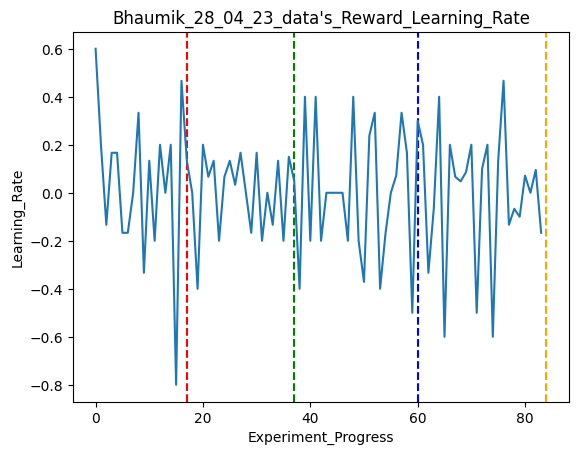

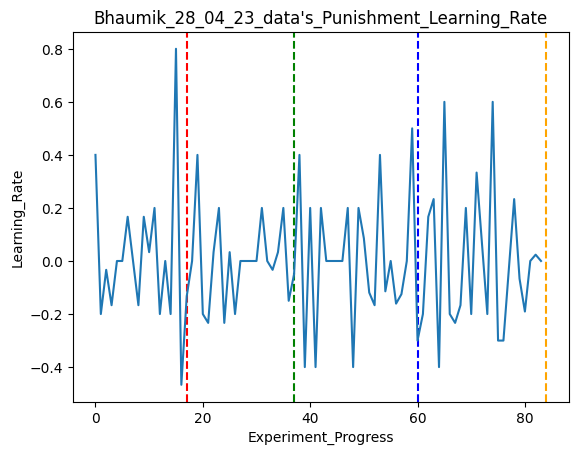

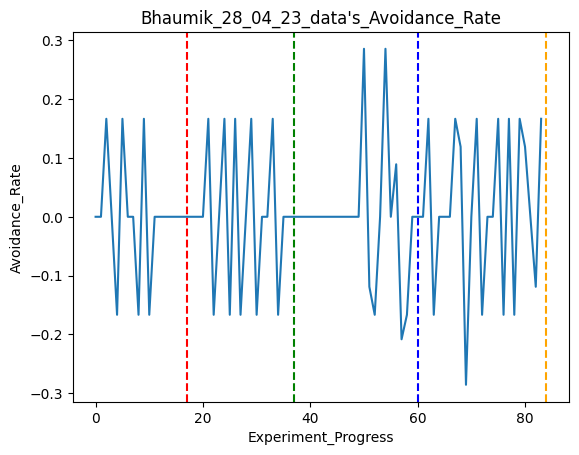

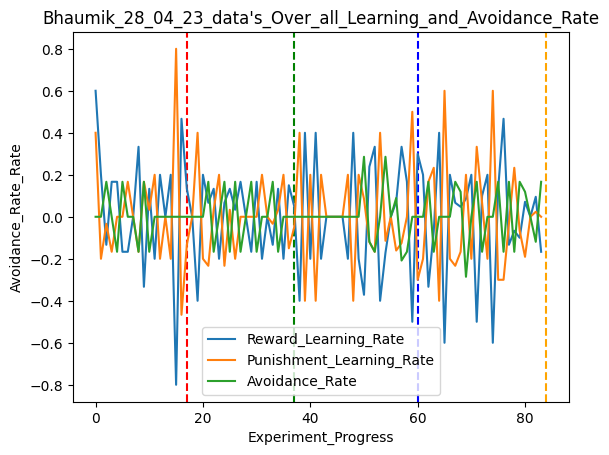

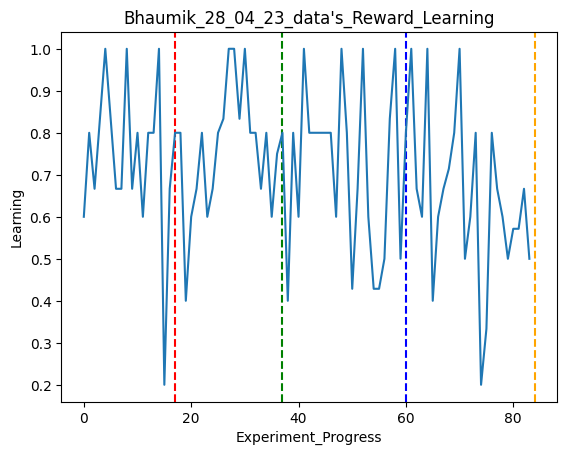

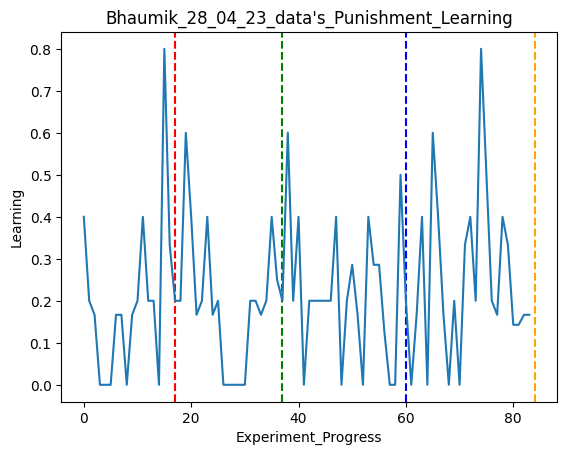

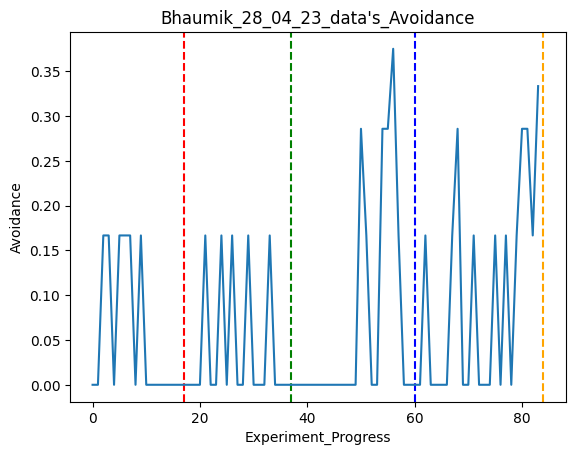

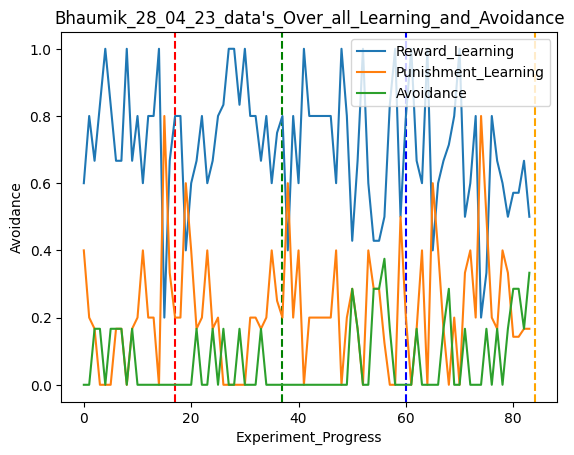

In [ ]:
k = participant - 1
Reward_Learning_rate = []
Punishment_Learning_rate = []
Avoidance_rate = []
RL1 = []
PL1 = []
AV1 = []
for j in lst1:
    temp = dfz[k][(dfz[k]['Terrain'] == f"{j}")].reset_index()
    temp['Reward'] = temp['Reward'].astype(float)
    temp = temp.replace(np.NaN, 0)
    Reward_learning = []
    Punishment_learning = []
    avoidance = []



    # for i in range(0, len(temp['Reward']), 5):
    #         Rl = Rlearn(temp['Reward'][i:i+5],temp['Decision'][i:i+5])   #
    #         Reward_learning.append(Rl)
    #         Pl = Plearn(temp['Reward'][i:i+5],temp['Decision'][i:i+5])
    #         Punishment_learning.append(Pl)                                                                # Any issue with slider comment below similar 'for' loop and uncomment this and run :)
    #         Av = Avoidance(temp['Reward'][i:i+5],temp['Decision'][i:i+5])
    #         avoidance.append(Av)
    # RL1.append(Reward_learning)
    # PL1.append(Punishment_learning)
    # AV1.append(avoidance)


    for i in range(0, len(temp['Reward']), step):
            Rl = Rlearn(temp['Reward'][i:i+window],temp['Decision'][i:i+window])   #
            Reward_learning.append(Rl)
            Pl = Plearn(temp['Reward'][i:i+window],temp['Decision'][i:i+window])
            Punishment_learning.append(Pl)
            Av = Avoidance(temp['Reward'][i:i+window],temp['Decision'][i:i+window])
            avoidance.append(Av)
    RL1.append(Reward_learning)
    PL1.append(Punishment_learning)
    AV1.append(avoidance)

previous_value = 0
for r in range(len(RL1)):
    tmp = calculate_rate(RL1[r], previous_value)
    previous_value = tmp[1]
    Reward_Learning_rate.append(tmp[0])
data1 = Reward_Learning_rate


previous_value = 0
for r in range(len(PL1)):
    tmp = calculate_rate(PL1[r], previous_value)
    previous_value = tmp[1]
    Punishment_Learning_rate.append(tmp[0])
data2 = Punishment_Learning_rate


previous_value = 0
for r in range(len(AV1)):
    tmp = calculate_rate(AV1[r], previous_value)
    previous_value = tmp[1]
    Avoidance_rate.append(tmp[0])
data3 = Avoidance_rate


res=[]
T_values = []
for i in data1:
    res.extend(i)
    try:
        T_values.append(T_values[-1] + len(i))
    except:
        T_values.append(len(i))
res1=[]
T_values1 = []
for i in data2:
    res1.extend(i)
    try:
        T_values1.append(T_values1[-1] + len(i))
    except:
        T_values1.append(len(i))
res2=[]
T_values2 = []
for i in data3:
    res2.extend(i)
    try:
        T_values2.append(T_values2[-1] + len(i))
    except:
        T_values2.append(len(i))

for point, color in zip(T_values, colors):
    plt.axvline(x=point, color=color, linestyle='--')

Name = df['Subject Name'][k]
plt.xlabel('Experiment_Progress')
plt.ylabel('Learning_Rate')
plt.title(f"{Name}'s_Reward_Learning_Rate")

x = range(len(res))
plt.plot(x,res)
plt.show()

for point, color in zip(T_values1, colors):
    plt.axvline(x=point, color=color, linestyle='--')

Name = df['Subject Name'][k]
plt.xlabel('Experiment_Progress')
plt.ylabel('Learning_Rate')
plt.title(f"{Name}'s_Punishment_Learning_Rate")

x = range(len(res1))
plt.plot(x,res1)
plt.show()

for point, color in zip(T_values2, colors):
    plt.axvline(x=point, color=color, linestyle='--')

Name = df['Subject Name'][k]
plt.xlabel('Experiment_Progress')
plt.ylabel('Avoidance_Rate')
plt.title(f"{Name}'s_Avoidance_Rate")

x = range(len(res2))
plt.plot(x,res2)
plt.show()

lists = [res, res1, res2]
for point, color in zip(T_values2, colors):
    plt.axvline(x=point, color=color, linestyle='--')

for i, j in zip(labels, lists):
    x = range(len(res))
    y = j

    plt.plot(x, y, label=f'{i}')
    plt.ylabel(f'{i}_Rate')

Name = df['Subject Name'][k]
plt.xlabel('Experiment_Progress')
plt.title(f"{Name}'s_Over_all_Learning_and_Avoidance_Rate")
plt.legend()
plt.show()

res3=[]
T_values3 = []
for i in RL1:
    res3.extend(i)
    try:
        T_values3.append(T_values3[-1] + len(i))
    except:
        T_values3.append(len(i))
res4=[]
T_values4 = []
for i in PL1:
    res4.extend(i)
    try:
        T_values4.append(T_values4[-1] + len(i))
    except:
        T_values4.append(len(i))
res5=[]
T_values5 = []
for i in AV1:
    res5.extend(i)
    try:
        T_values5.append(T_values5[-1] + len(i))
    except:
        T_values5.append(len(i))

for point, color in zip(T_values3, colors):
    plt.axvline(x=point, color=color, linestyle='--')

Name = df['Subject Name'][k]
plt.xlabel('Experiment_Progress')
plt.ylabel('Learning')
plt.title(f"{Name}'s_Reward_Learning")

x = range(len(res3))
plt.plot(x,res3)
plt.show()

for point, color in zip(T_values4, colors):
    plt.axvline(x=point, color=color, linestyle='--')

Name = df['Subject Name'][k]
plt.xlabel('Experiment_Progress')
plt.ylabel('Learning')
plt.title(f"{Name}'s_Punishment_Learning")

x = range(len(res4))
plt.plot(x,res4)
plt.show()

for point, color in zip(T_values5, colors):
    plt.axvline(x=point, color=color, linestyle='--')

Name = df['Subject Name'][k]
plt.xlabel('Experiment_Progress')
plt.ylabel('Avoidance')
plt.title(f"{Name}'s_Avoidance")

x = range(len(res5))
plt.plot(x,res5)
plt.show()

lists = [res3, res4, res5]
for point, color in zip(T_values5, colors):
    plt.axvline(x=point, color=color, linestyle='--')

for i, j in zip(labels1, lists):
    x = range(len(res3))  # x-axis values
    y = j  # y-axis values

    plt.plot(x, y, label=f'{i}')
    plt.ylabel(f'{i}')

Name = df['Subject Name'][k]
plt.xlabel('Experiment_Progress')
plt.title(f"{Name}'s_Over_all_Learning_and_Avoidance")
plt.legend()
plt.show()

In [ ]:
# for k in range(len(dfz)):
  #paste code here with indent for all graphs at once







#***Reward-Punishment_Learning_and_its_Rates / Avoidance and its Rate with respect to trees***

In [ ]:
trees = ["Red","Blue","Green"]
colour = ["Red","Blue","Green"]
out = pd.DataFrame()
out1 = pd.DataFrame()
size = len(dfz)
size
# Max participants

24

In [ ]:
# participant number
participant = 10  #@param {type: "number"}

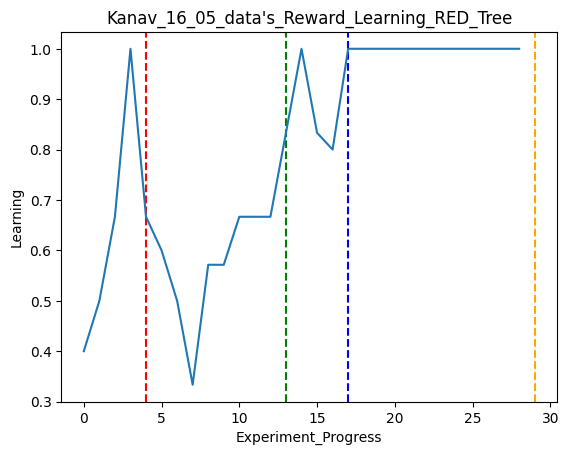

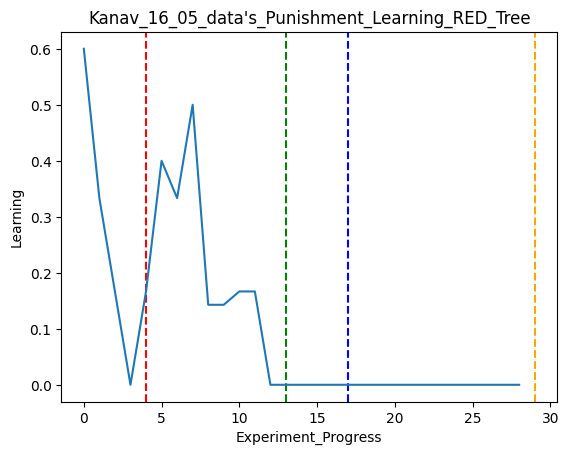

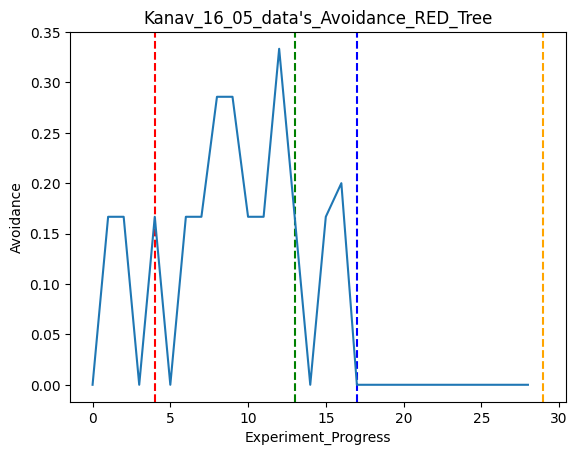

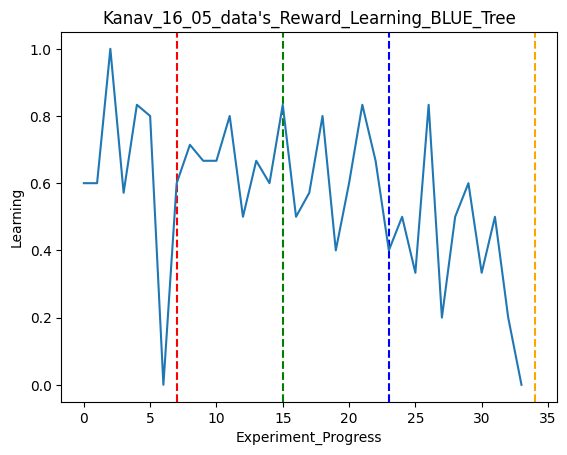

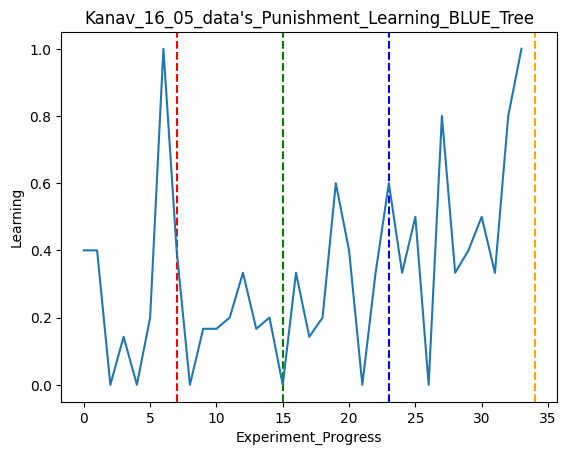

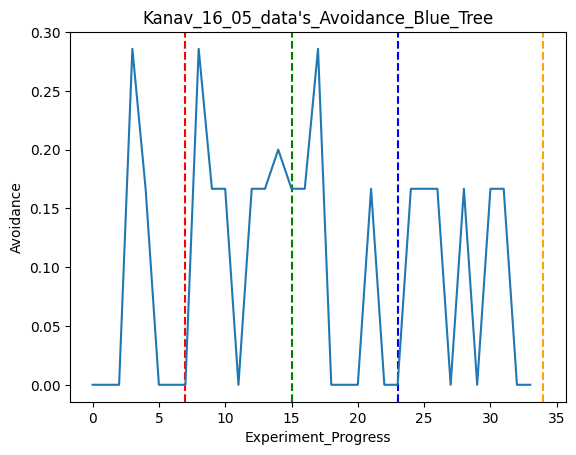

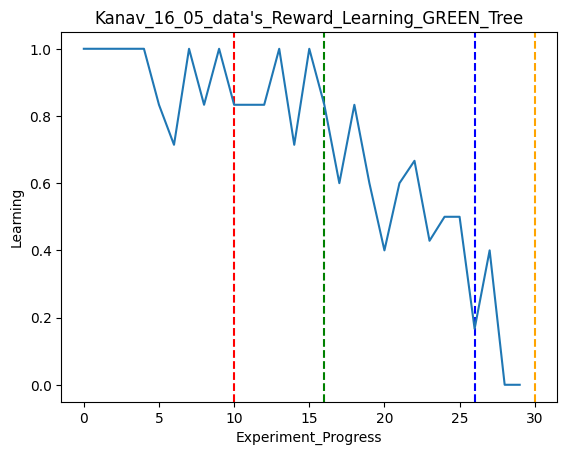

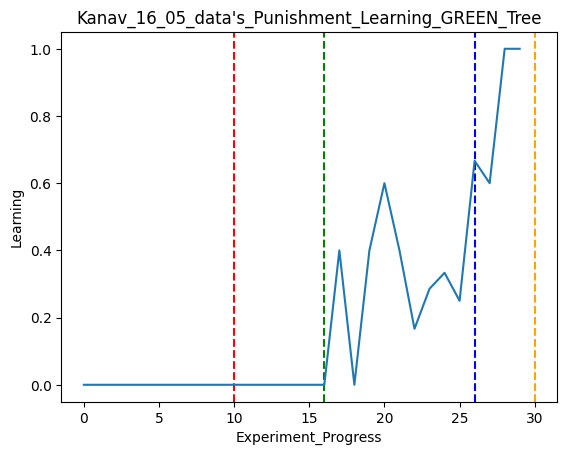

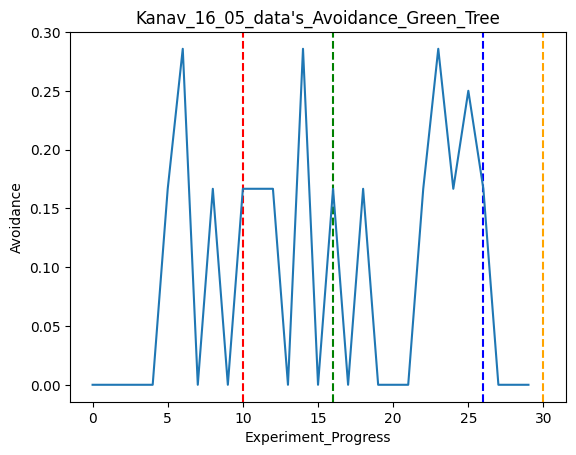

In [ ]:
k = participant -1
Reward_Learning_rate = []
Punishment_Learning_rate = []
Avoidance_rate = []
RL1_Red = []
PL1_Red = []
AV1_Red = []
RL1_Blue = []
PL1_Blue = []
AV1_Blue = []
RL1_Green = []
PL1_Green = []
AV1_Green = []
for j in lst1:
    out = dfz[k][(dfz[k]['Terrain'] == f"{j}")].reset_index()
    Reward_learning_Red = []
    avoidance_Red = []
    Punishment_learning_Red = []
    Reward_learning_Green = []
    avoidance_Green = []
    Punishment_learning_Green = []
    Reward_learning_Blue = []
    avoidance_Blue = []
    Punishment_learning_Blue = []
    for l in trees:
        out1 = out[(out ['Tree'] == f"{l}")].reset_index()
        out1['Reward'] = out1['Reward'].astype(float)
        out1 = out1.replace(np.NaN, 0)

        for i in range(0, len(out1['Reward']), step):


            if (out1['Tree'][i] == 'Red'):
                Rl = Rlearn(out1['Reward'][i:i+window],out1['Decision'][i:i+window])
                Reward_learning_Red.append(Rl)
                Pl = Plearn(out1['Reward'][i:i+window],out1['Decision'][i:i+window])
                Punishment_learning_Red.append(Pl)
                Av = Avoidance(out1['Reward'][i:i+window],out1['Decision'][i:i+window])
                avoidance_Red.append(Av)

            elif (out1['Tree'][i] == 'Green'):
                Rl = Rlearn(out1['Reward'][i:i+window],out1['Decision'][i:i+window])
                Reward_learning_Green.append(Rl)
                Pl = Plearn(out1['Reward'][i:i+window],out1['Decision'][i:i+window])
                Punishment_learning_Green.append(Pl)
                Av = Avoidance(out1['Reward'][i:i+window],out1['Decision'][i:i+window])
                avoidance_Green.append(Av)

            elif (out1['Tree'][i] == 'Blue'):
                Rl = Rlearn(out1['Reward'][i:i+window],out1['Decision'][i:i+window])
                Reward_learning_Blue.append(Rl)
                Pl = Plearn(out1['Reward'][i:i+window],out1['Decision'][i:i+window])
                Punishment_learning_Blue.append(Pl)
                Av = Avoidance(out1['Reward'][i:i+window],out1['Decision'][i:i+window])
                avoidance_Blue.append(Av)

    RL1_Red.append(Reward_learning_Red)
    PL1_Red.append(Punishment_learning_Red)
    AV1_Red.append(avoidance_Red)

    RL1_Green.append(Reward_learning_Green)
    PL1_Green.append(Punishment_learning_Green)
    AV1_Green.append(avoidance_Green)

    RL1_Blue.append(Reward_learning_Blue)
    PL1_Blue.append(Punishment_learning_Blue)
    AV1_Blue.append(avoidance_Blue)


                                            #Red_Tree-learning and avoidance
result_Red = []
T_values_Red_3 = []
for i in RL1_Red:
    result_Red.extend(i)
    try:
        T_values_Red_3.append(T_values_Red_3[-1] + len(i))
    except:
        T_values_Red_3.append(len(i))
result2_Red=[]
T_values_Red_4 = []
for i in PL1_Red:
    result2_Red.extend(i)
    try:
        T_values_Red_4.append(T_values_Red_4[-1] + len(i))
    except:
        T_values_Red_4.append(len(i))
result3_Red=[]
T_values_Red_5 = []
for i in AV1_Red:
    result3_Red.extend(i)
    try:
        T_values_Red_5.append(T_values_Red_5[-1] + len(i))
    except:
        T_values_Red_5.append(len(i))

                                            #Green_Tree-learning and avoidance

result_Green = []
T_values_Green_3 = []
for i in RL1_Green:
    result_Green.extend(i)
    try:
        T_values_Green_3.append(T_values_Green_3[-1] + len(i))
    except:
        T_values_Green_3.append(len(i))
result2_Green=[]
T_values_Green_4 = []
for i in PL1_Green:
    result2_Green.extend(i)
    try:
        T_values_Green_4.append(T_values_Green_4[-1] + len(i))
    except:
        T_values_Green_4.append(len(i))
result3_Green=[]
T_values_Green_5 = []
for i in AV1_Green:
    result3_Green.extend(i)
    try:
        T_values_Green_5.append(T_values_Green_5[-1] + len(i))
    except:
        T_values_Green_5.append(len(i))


                                                #Green_Tree-learning and avoidance
result_Blue = []
T_values_Blue_3 = []
for i in RL1_Blue:
    result_Blue.extend(i)
    try:
        T_values_Blue_3.append(T_values_Blue_3[-1] + len(i))
    except:
        T_values_Blue_3.append(len(i))
result2_Blue=[]
T_values_Blue_4 = []
for i in PL1_Blue:
    result2_Blue.extend(i)
    try:
        T_values_Blue_4.append(T_values_Blue_4[-1] + len(i))
    except:
        T_values_Blue_4.append(len(i))
result3_Blue=[]
T_values_Blue_5 = []
for i in AV1_Blue:
    result3_Blue.extend(i)
    try:
        T_values_Blue_5.append(T_values_Blue_5[-1] + len(i))
    except:
        T_values_Blue_5.append(len(i))


        ######################################### RED PLOTS  ###############################################


for point, color in zip(T_values_Red_3, colors):
    plt.axvline(x=point, color=color, linestyle='--')

Name = df['Subject Name'][k]
plt.xlabel('Experiment_Progress')
plt.ylabel('Learning')
plt.title(f"{Name}'s_Reward_Learning_RED_Tree")

x = range(len(result_Red))
plt.plot(x,result_Red)
plt.show()

for point, color in zip(T_values_Red_4, colors):
    plt.axvline(x=point, color=color, linestyle='--')

Name = df['Subject Name'][k]
plt.xlabel('Experiment_Progress')
plt.ylabel('Learning')
plt.title(f"{Name}'s_Punishment_Learning_RED_Tree")

x = range(len(result2_Red))
plt.plot(x,result2_Red)
plt.show()

for point, color in zip(T_values_Red_5, colors):
    plt.axvline(x=point, color=color, linestyle='--')

Name = df['Subject Name'][k]
plt.xlabel('Experiment_Progress')
plt.ylabel('Avoidance')
plt.title(f"{Name}'s_Avoidance_RED_Tree")

x = range(len(result3_Red))
plt.plot(x,result3_Red)
plt.show()

        ######################################### BLUE PLOTS  ###############################################


for point, color in zip(T_values_Blue_3, colors):
    plt.axvline(x=point, color=color, linestyle='--')

Name = df['Subject Name'][k]
plt.xlabel('Experiment_Progress')
plt.ylabel('Learning')
plt.title(f"{Name}'s_Reward_Learning_BLUE_Tree")

x = range(len(result_Blue))
plt.plot(x,result_Blue)
plt.show()

for point, color in zip(T_values_Blue_4, colors):
    plt.axvline(x=point, color=color, linestyle='--')

Name = df['Subject Name'][k]
plt.xlabel('Experiment_Progress')
plt.ylabel('Learning')
plt.title(f"{Name}'s_Punishment_Learning_BLUE_Tree")

x = range(len(result2_Blue))
plt.plot(x,result2_Blue)
plt.show()

for point, color in zip(T_values_Blue_5, colors):
    plt.axvline(x=point, color=color, linestyle='--')

Name = df['Subject Name'][k]
plt.xlabel('Experiment_Progress')
plt.ylabel('Avoidance')
plt.title(f"{Name}'s_Avoidance_Blue_Tree")

x = range(len(result3_Blue))
plt.plot(x,result3_Blue)
plt.show()


        ######################################### Green PLOTS  ###############################################


for point, color in zip(T_values_Green_3, colors):
    plt.axvline(x=point, color=color, linestyle='--')

Name = df['Subject Name'][k]
plt.xlabel('Experiment_Progress')
plt.ylabel('Learning')
plt.title(f"{Name}'s_Reward_Learning_GREEN_Tree")

x = range(len(result_Green))
plt.plot(x,result_Green)
plt.show()

for point, color in zip(T_values_Green_4, colors):
    plt.axvline(x=point, color=color, linestyle='--')

Name = df['Subject Name'][k]
plt.xlabel('Experiment_Progress')
plt.ylabel('Learning')
plt.title(f"{Name}'s_Punishment_Learning_GREEN_Tree")

x = range(len(result2_Green))
plt.plot(x,result2_Green)
plt.show()

for point, color in zip(T_values_Green_5, colors):
    plt.axvline(x=point, color=color, linestyle='--')

Name = df['Subject Name'][k]
plt.xlabel('Experiment_Progress')
plt.ylabel('Avoidance')
plt.title(f"{Name}'s_Avoidance_Green_Tree")

x = range(len(result3_Green))
plt.plot(x,result3_Green)
plt.show()


In [ ]:
#Add above code from second line and get all graphs at once
#for k in range(len(dfz)):


#***Reward-Punishment_Learning_and_its_Rates / Avoidanceand its Rate for every trial***

In [ ]:
def Rlearn (rew,dec):
    avoidance = 0
    positive_items = 0
    negative_items = 0
    if dec == 'Avoid':
        avoidance = 1
    if rew < 0:
        negative_items = 1
    else:
        positive_items = 1
    return positive_items


def Plearn (rew,dec):
    avoidance = 0
    positive_items = 0
    negative_items = 0
    if dec == 'Avoid':
        avoidance = 1
    if rew < 0:
        negative_items = 1
    else:
        positive_items = 1
    return negative_items


def Avoidance(rew,dec):
    avoidance = 0
    positive_items = 0
    negative_items = 0
    if dec == 'Avoid':
        avoidance = 1
    if rew < 0:
        negative_items = 1
    else:
        positive_items = 1
    return avoidance


def calculate_rate(data, previous_value):
    rates = []
    for value in data:
        if previous_value == 0:
            rates.append(value)  # For the first case, append None
        else:
            rate = value - previous_value
            rates.append(rate)

        previous_value = value

    return [rates, previous_value]


In [ ]:
# participant number
participant = 2  #@param {type: "number"}

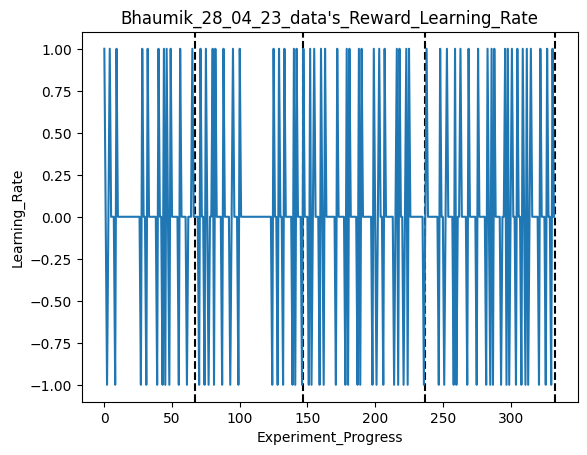

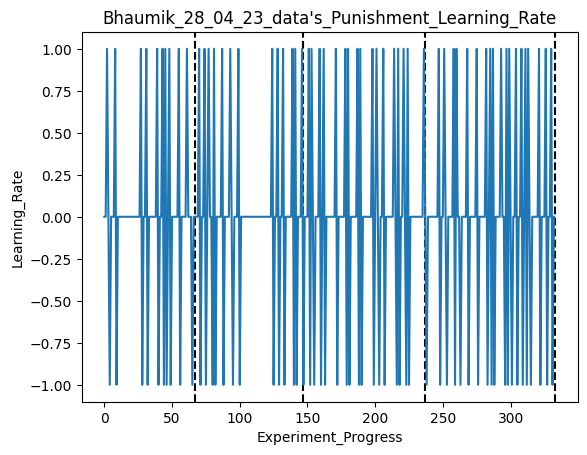

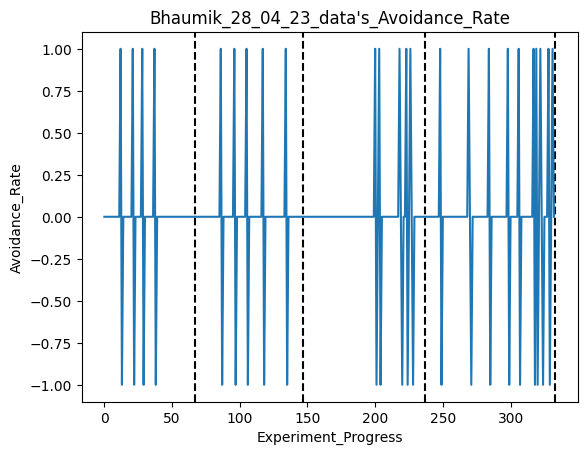

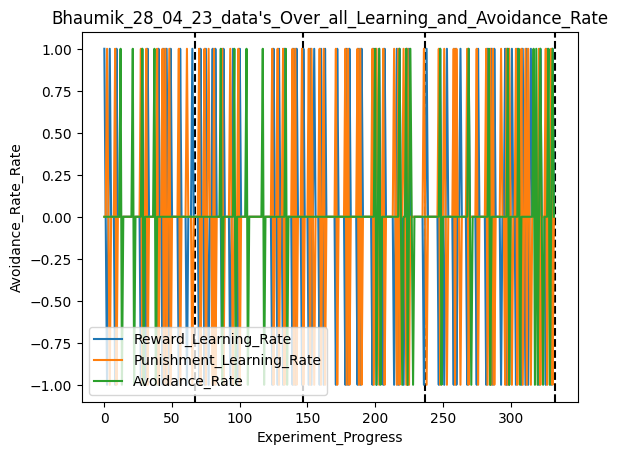

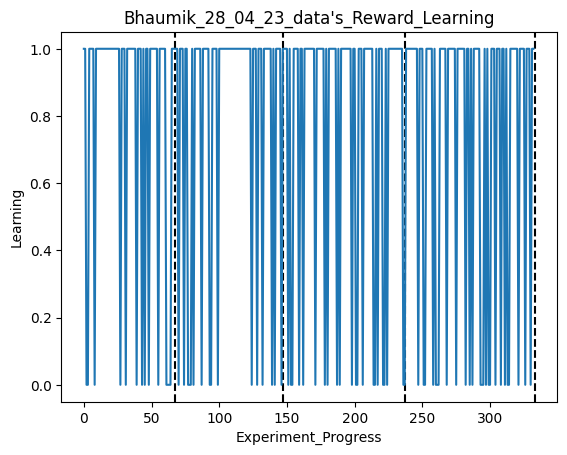

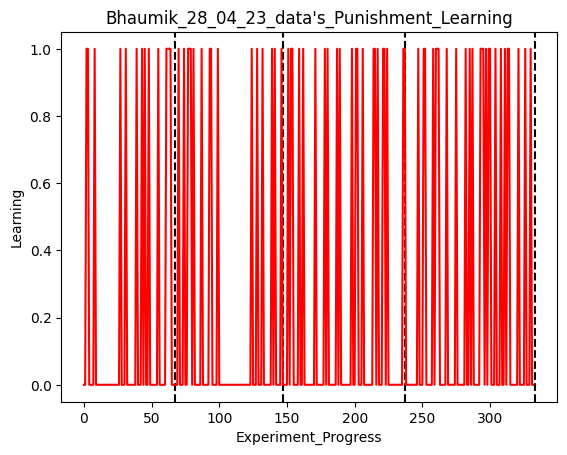

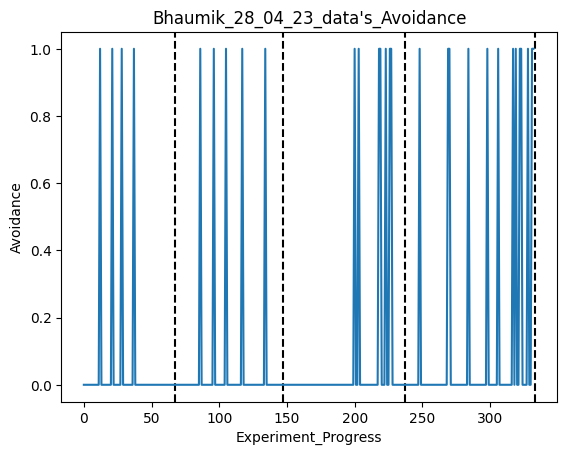

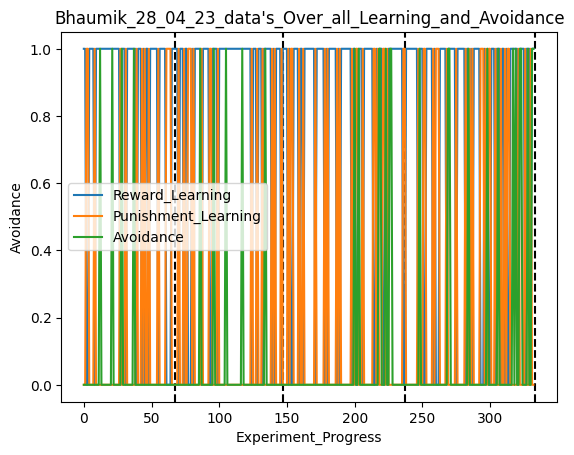

In [ ]:
# for k in range(len(dfz)):
k = participant -1
Reward_Learning_rate = []
Punishment_Learning_rate = []
Avoidance_rate = []
RL1 = []
PL1 = []
AV1 = []
for j in lst1:
    temp = dfz[k][(dfz[k]['Terrain'] == f"{j}")].reset_index()
    temp['Reward'] = temp['Reward'].astype(float)
    temp = temp.replace(np.NaN, 0)
    Reward_learning = []
    Punishment_learning = []
    avoidance = []
    for i in range(0, len(temp['Reward'])):
            Rl = Rlearn(temp['Reward'][i],temp['Decision'][i])
            Reward_learning.append(Rl)
            Pl = Plearn(temp['Reward'][i],temp['Decision'][i])
            Punishment_learning.append(Pl)
            Av = Avoidance(temp['Reward'][i],temp['Decision'][i])
            avoidance.append(Av)
    RL1.append(Reward_learning)
    PL1.append(Punishment_learning)
    AV1.append(avoidance)

previous_value = 0
for r in range(len(RL1)):
    tmp = calculate_rate(RL1[r], previous_value)
    previous_value = tmp[1]
    Reward_Learning_rate.append(tmp[0])
data1 = Reward_Learning_rate


previous_value = 0
for r in range(len(PL1)):
    tmp = calculate_rate(PL1[r], previous_value)
    previous_value = tmp[1]
    Punishment_Learning_rate.append(tmp[0])
data2 = Punishment_Learning_rate


previous_value = 0
for r in range(len(AV1)):
    tmp = calculate_rate(AV1[r], previous_value)
    previous_value = tmp[1]
    Avoidance_rate.append(tmp[0])
data3 = Avoidance_rate


res=[]
T_values = []
for i in data1:
    res.extend(i)
    try:
        T_values.append(T_values[-1] + len(i))
    except:
        T_values.append(len(i))
res1=[]
T_values1 = []
for i in data2:
    res1.extend(i)
    try:
        T_values1.append(T_values1[-1] + len(i))
    except:
        T_values1.append(len(i))
res2=[]
T_values2 = []
for i in data3:
    res2.extend(i)
    try:
        T_values2.append(T_values2[-1] + len(i))
    except:
        T_values2.append(len(i))

for point, color in zip(T_values, colors):
    plt.axvline(x=point, color='black', linestyle='--')

Name = df['Subject Name'][k]
plt.xlabel('Experiment_Progress')
plt.ylabel('Learning_Rate')
plt.title(f"{Name}'s_Reward_Learning_Rate")

x = range(len(res))
plt.plot(x,res)
plt.show()

for point, color in zip(T_values1, colors):
    plt.axvline(x=point, color='black', linestyle='--')

Name = df['Subject Name'][k]
plt.xlabel('Experiment_Progress')
plt.ylabel('Learning_Rate')
plt.title(f"{Name}'s_Punishment_Learning_Rate")

x = range(len(res1))
plt.plot(x,res1)
plt.show()

for point, color in zip(T_values2, colors):
    plt.axvline(x=point, color='black', linestyle='--')

Name = df['Subject Name'][k]
plt.xlabel('Experiment_Progress')
plt.ylabel('Avoidance_Rate')
plt.title(f"{Name}'s_Avoidance_Rate")

x = range(len(res2))
plt.plot(x,res2)
plt.show()

lists = [res, res1, res2]
for point, color in zip(T_values2, colors):
    plt.axvline(x=point, color='black', linestyle='--')

for i, j in zip(labels, lists):
    x = range(len(res))  # x-axis values
    y = j  # y-axis values

    plt.plot(x, y, label=f'{i}')
    plt.ylabel(f'{i}_Rate')

Name = df['Subject Name'][k]
plt.xlabel('Experiment_Progress')
plt.title(f"{Name}'s_Over_all_Learning_and_Avoidance_Rate")
plt.legend()
plt.show()

res3=[]
T_values3 = []
for i in RL1:
    res3.extend(i)
    try:
        T_values3.append(T_values3[-1] + len(i))
    except:
        T_values3.append(len(i))
res4=[]
T_values4 = []
for i in PL1:
    res4.extend(i)
    try:
        T_values4.append(T_values4[-1] + len(i))
    except:
        T_values4.append(len(i))
res5=[]
T_values5 = []
for i in AV1:
    res5.extend(i)
    try:
        T_values5.append(T_values5[-1] + len(i))
    except:
        T_values5.append(len(i))

for point, color in zip(T_values3, colors):
    plt.axvline(x=point, color='black', linestyle='--')

Name = df['Subject Name'][k]
plt.xlabel('Experiment_Progress')
plt.ylabel('Learning')
plt.title(f"{Name}'s_Reward_Learning")

x = range(len(res3))
plt.plot(x,res3)
plt.show()

for point, color in zip(T_values4, colors):
    plt.axvline(x=point, color='black', linestyle='--')

Name = df['Subject Name'][k]
plt.xlabel('Experiment_Progress')
plt.ylabel('Learning')
plt.title(f"{Name}'s_Punishment_Learning")

x = range(len(res4))
plt.plot(x,res4,color='red')
plt.show()

for point, color in zip(T_values5, colors):
    plt.axvline(x=point, color='black', linestyle='--')

Name = df['Subject Name'][k]
plt.xlabel('Experiment_Progress')
plt.ylabel('Avoidance')
plt.title(f"{Name}'s_Avoidance")

x = range(len(res5))
plt.plot(x,res5)
plt.show()

lists = [res3, res4, res5]
for point, color in zip(T_values5, colors):
    plt.axvline(x=point, color='black', linestyle='--')

for i, j in zip(labels1, lists):
    x = range(len(res3))  # x-axis values
    y = j  # y-axis values

    plt.plot(x, y, label=f'{i}')
    plt.ylabel(f'{i}')

Name = df['Subject Name'][k]
plt.xlabel('Experiment_Progress')
plt.title(f"{Name}'s_Over_all_Learning_and_Avoidance")
plt.legend()
plt.show()


### ***Reward-Punishment_Learning_and_its_Rates / Avoidanceand its Rate for every trial seperately for each terrain***

In [ ]:
# participant number
participant = 1  #@param {type: "number"}

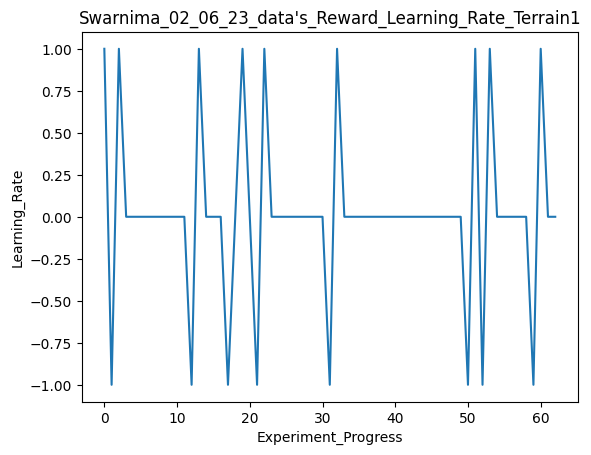

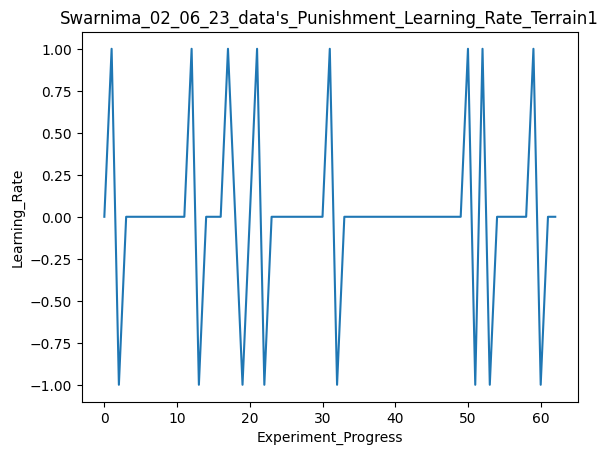

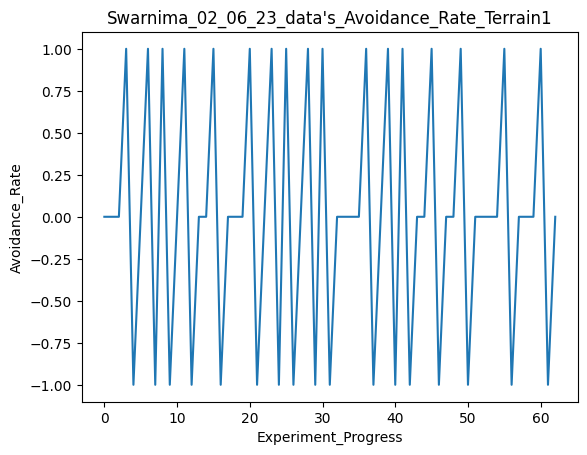

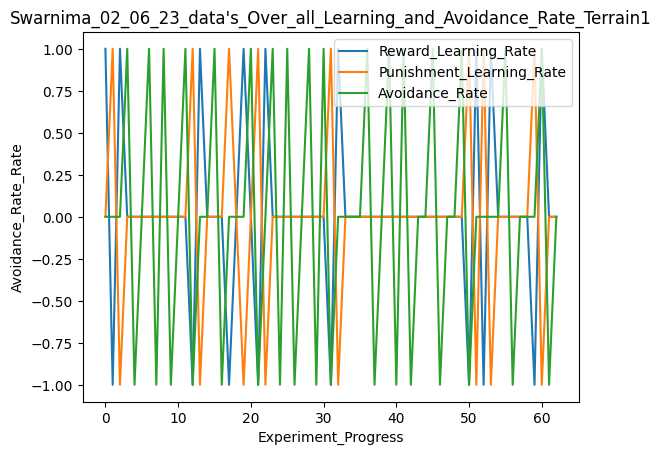

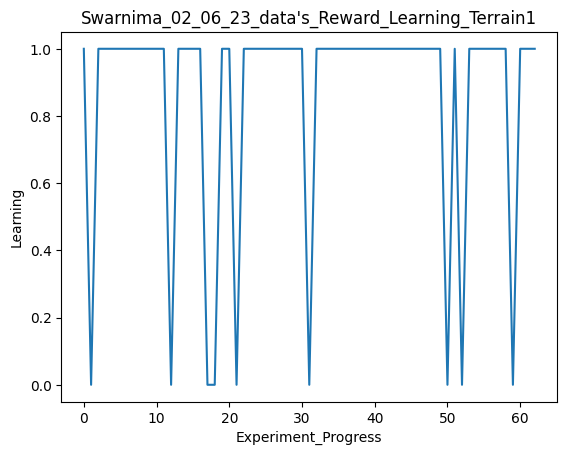

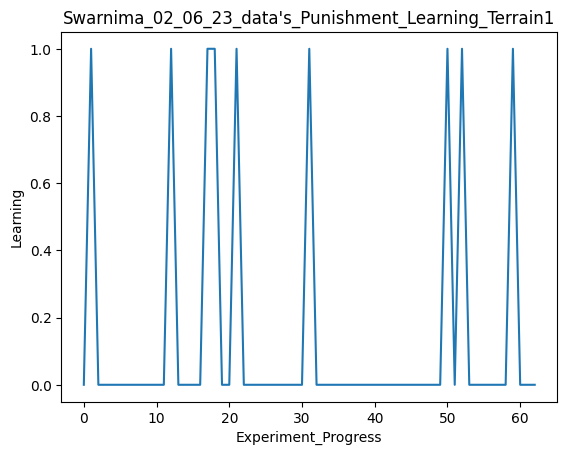

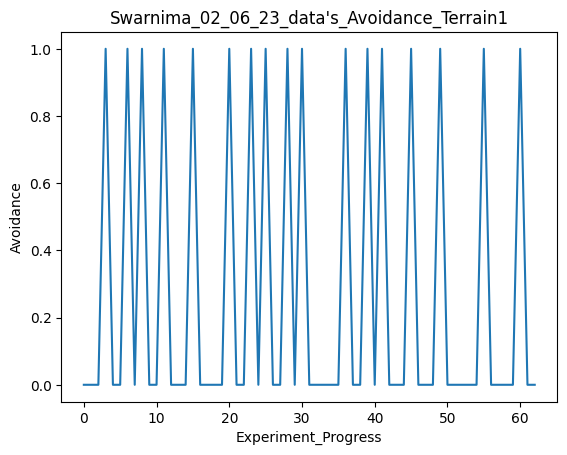

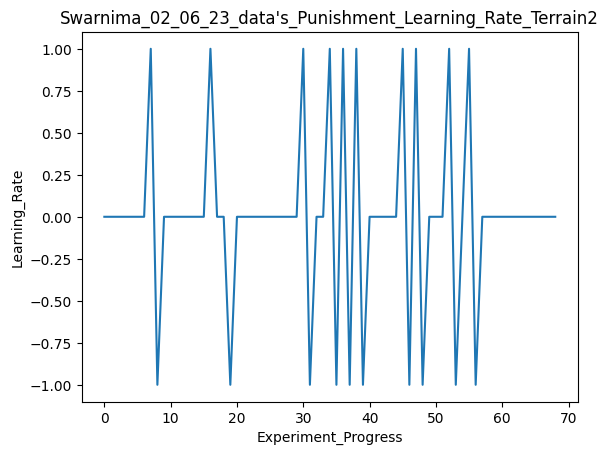

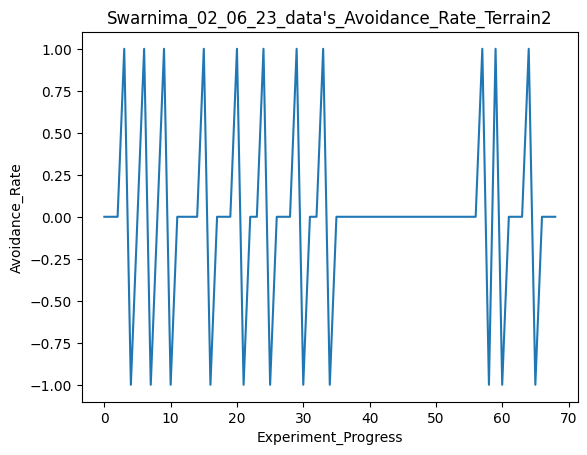

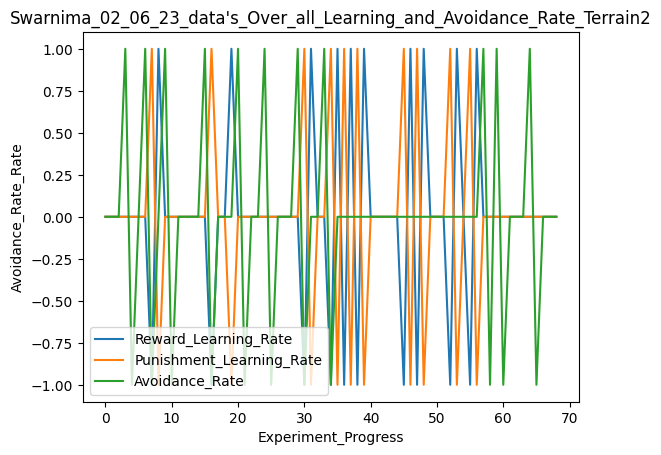

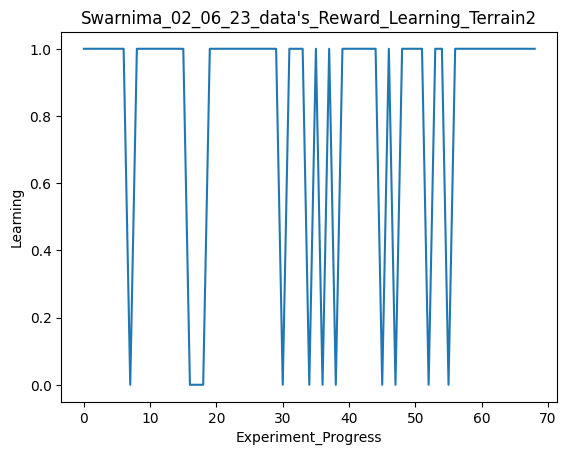

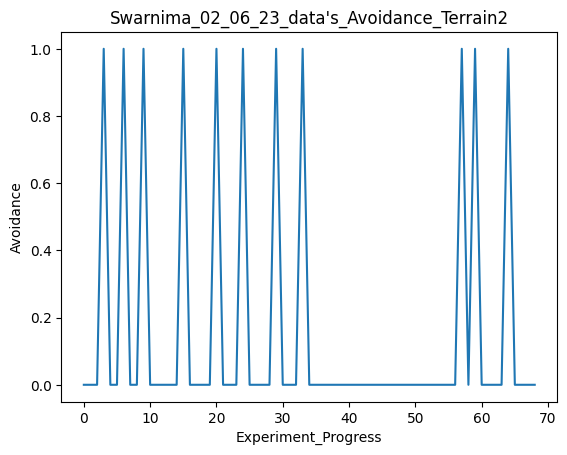

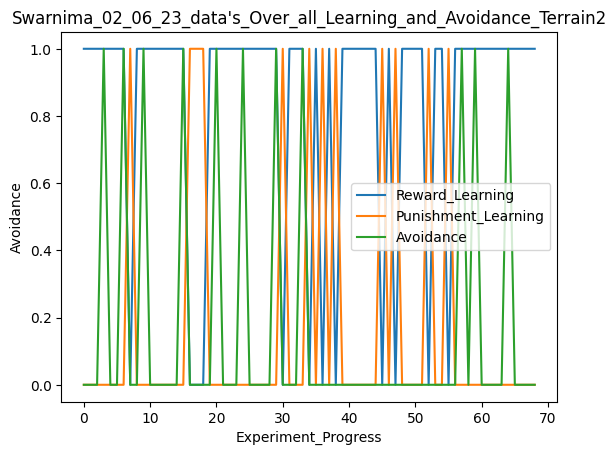

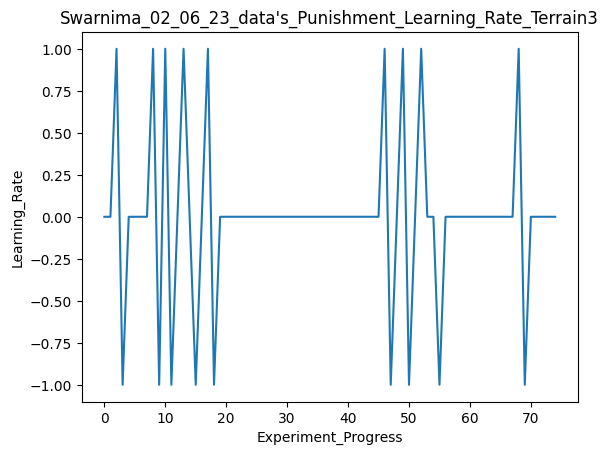

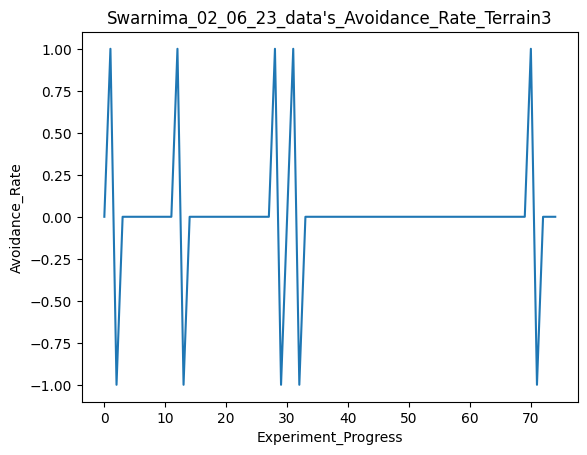

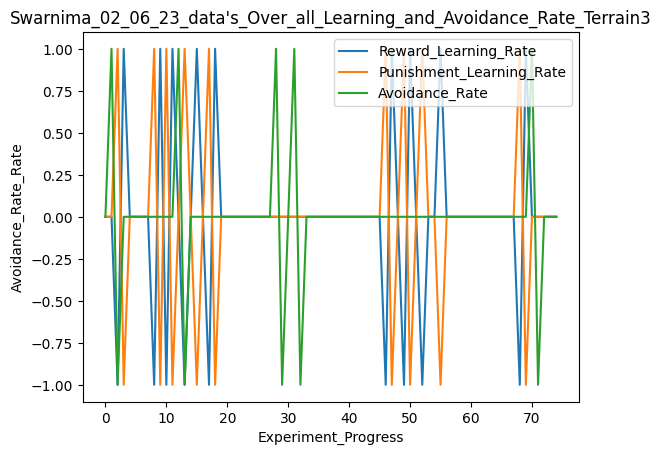

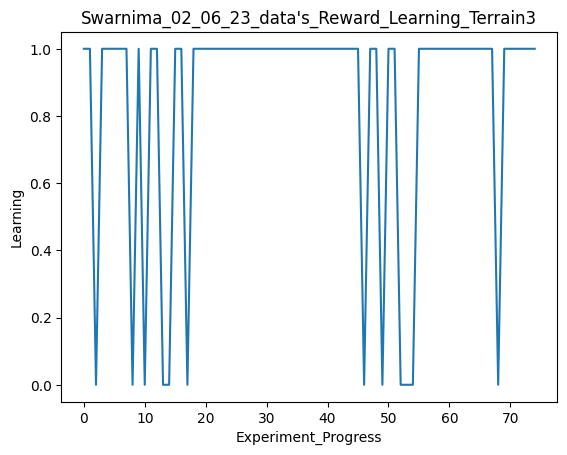

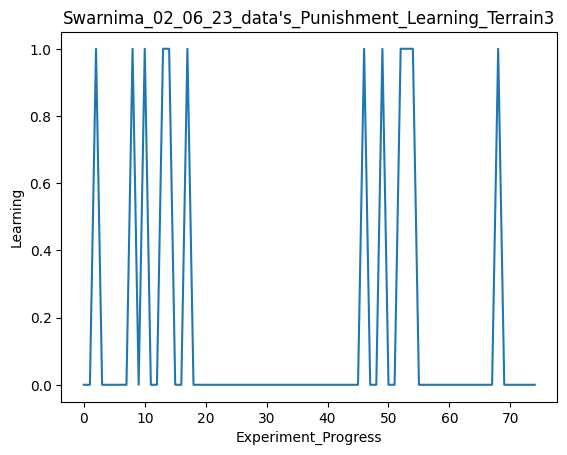

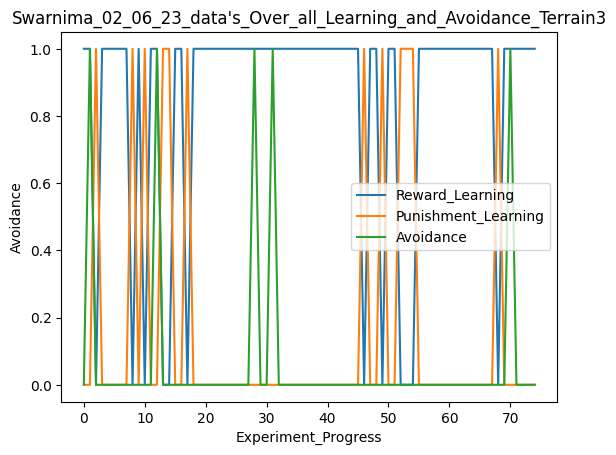

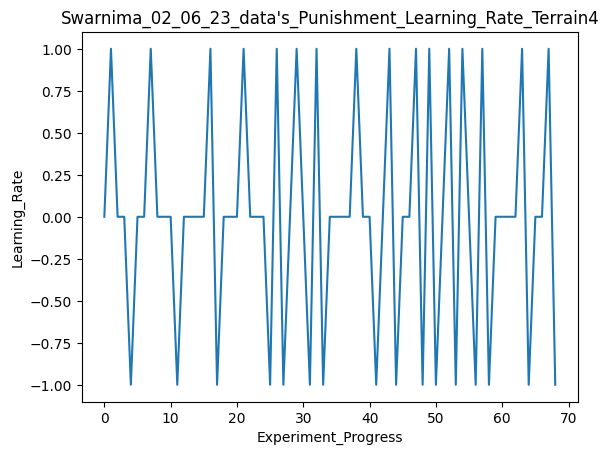

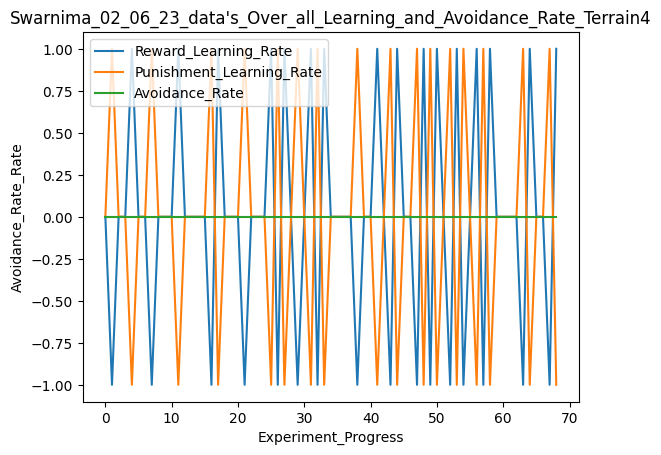

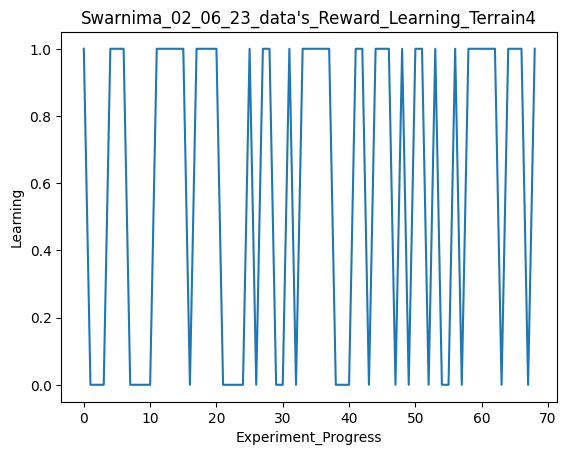

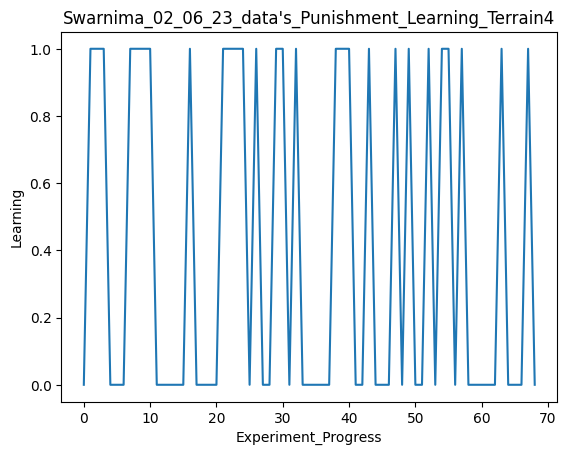

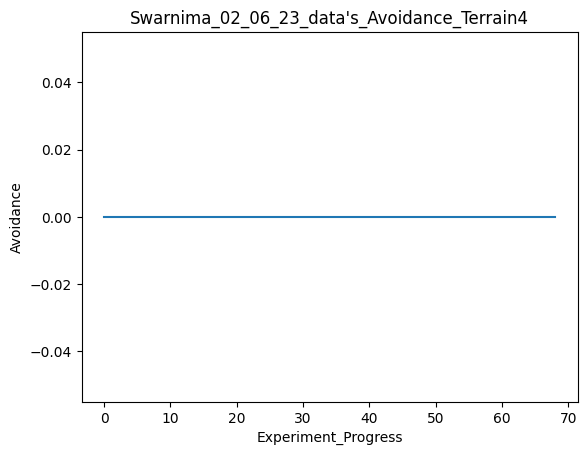

In [ ]:
# for k in range(len(dfz)):
k = participant -1
Reward_Learning_rate = []
Punishment_Learning_rate = []
Avoidance_rate = []
RL1 = []
PL1 = []
AV1 = []
for j in lst1:
    temp = dfz[k][(dfz[k]['Terrain'] == f"{j}")].reset_index()
    temp['Reward'] = temp['Reward'].astype(float)
    temp = temp.replace(np.NaN, 0)
    Reward_learning = []
    Punishment_learning = []
    avoidance = []
    for i in range(0, len(temp['Reward'])):
            Rl = Rlearn(temp['Reward'][i],temp['Decision'][i])
            Reward_learning.append(Rl)
            Pl = Plearn(temp['Reward'][i],temp['Decision'][i])
            Punishment_learning.append(Pl)
            Av = Avoidance(temp['Reward'][i],temp['Decision'][i])
            avoidance.append(Av)
    RL1.append(Reward_learning)
    PL1.append(Punishment_learning)
    AV1.append(avoidance)

previous_value = 0
for r in range(len(RL1)):
    tmp = calculate_rate(RL1[r], previous_value)
    previous_value = tmp[1]
    Reward_Learning_rate.append(tmp[0])
data1 = Reward_Learning_rate


previous_value = 0
for r in range(len(PL1)):
    tmp = calculate_rate(PL1[r], previous_value)
    previous_value = tmp[1]
    Punishment_Learning_rate.append(tmp[0])
data2 = Punishment_Learning_rate


previous_value = 0
for r in range(len(AV1)):
    tmp = calculate_rate(AV1[r], previous_value)
    previous_value = tmp[1]
    Avoidance_rate.append(tmp[0])
data3 = Avoidance_rate

for p in range(4):
    res = data1[p]

    res1 = data2[p]

    res2 = data3[p]

    Name = df['Subject Name'][k]
    plt.xlabel('Experiment_Progress')
    plt.ylabel('Learning_Rate')
    plt.title(f"{Name}'s_Reward_Learning_Rate_Terrain{p + 1}")

    x = range(len(res))
    plt.plot(x,res)
    plt.show()

    Name = df['Subject Name'][k]
    plt.xlabel('Experiment_Progress')
    plt.ylabel('Learning_Rate')
    plt.title(f"{Name}'s_Punishment_Learning_Rate_Terrain{p + 1}")

    x = range(len(res1))
    plt.plot(x,res1)
    plt.show()

    Name = df['Subject Name'][k]
    plt.xlabel('Experiment_Progress')
    plt.ylabel('Avoidance_Rate')
    plt.title(f"{Name}'s_Avoidance_Rate_Terrain{p + 1}")

    x = range(len(res2))
    plt.plot(x,res2)
    plt.show()
    lists = [res, res1, res2]
    for i, j in zip(labels, lists):
        x = range(len(res))  # x-axis values
        y = j  # y-axis values

        plt.plot(x, y, label=f'{i}')
        plt.ylabel(f'{i}_Rate')

    Name = df['Subject Name'][k]
    plt.xlabel('Experiment_Progress')
    plt.title(f"{Name}'s_Over_all_Learning_and_Avoidance_Rate_Terrain{p + 1}")
    plt.legend()
    plt.show()

    res3=RL1[p]
    res4=PL1[p]
    res5=AV1[p]

    Name = df['Subject Name'][k]
    plt.xlabel('Experiment_Progress')
    plt.ylabel('Learning')
    plt.title(f"{Name}'s_Reward_Learning_Terrain{p+1}")

    x = range(len(res3))
    plt.plot(x,res3)
    plt.show()

    Name = df['Subject Name'][k]
    plt.xlabel('Experiment_Progress')
    plt.ylabel('Learning')
    plt.title(f"{Name}'s_Punishment_Learning_Terrain{p+1}")

    x = range(len(res4))
    plt.plot(x,res4)
    plt.show()

    Name = df['Subject Name'][k]
    plt.xlabel('Experiment_Progress')
    plt.ylabel('Avoidance')
    plt.title(f"{Name}'s_Avoidance_Terrain{p+1}")

    x = range(len(res5))
    plt.plot(x,res5)
    plt.show()

    lists = [res3, res4, res5]

    for i, j in zip(labels1, lists):
        x = range(len(res3))  # x-axis values
        y = j  # y-axis values

        plt.plot(x, y, label=f'{i}')
        plt.ylabel(f'{i}')

    Name = df['Subject Name'][k]
    plt.xlabel('Experiment_Progress')
    plt.title(f"{Name}'s_Over_all_Learning_and_Avoidance_Terrain{p+1}")
    plt.legend()
    plt.show()


# ***PERCENTAGE APPROACH AND AVOID***

In [ ]:
percentages_ap = []
percentages_ap1 = []
percentages_ap2 = []
percentages_ap3 = []
percentages_av1 = []
percentages_av = []
percentages_av2 = []
percentages_av3 = []
index = [ 'Environment_1_Approach', 'Environment_1_Avoid','Environment_2_Approach','Environment_2_Avoid','Environment_3_Approach', 'Environment_3_Avoid', 'Environment_4_Approach', 'Environment_4_Avoid']

In [ ]:
for i in range(len(df['Approach1'])):
    for j in range(1, 5):
        if j == 1:
            percentage_ap = (df.loc[:,f'Approach{j}'][i] / df.loc[:,f'Total_{j}'][i])*100
            percentages_ap.append(percentage_ap)
            percentage_av = (df.loc[:,f'Avoid{j}'][i] / df.loc[:,f'Total_{j}'][i])*100
            percentages_av.append(percentage_av)

        elif j == 2:
            percentage_ap = (df.loc[:,f'Approach{j}'][i] / df.loc[:,f'Total_{j}'][i])*100
            percentages_ap1.append(percentage_ap)
            percentage_av = (df.loc[:,f'Avoid{j}'][i] / df.loc[:,f'Total_{j}'][i])*100
            percentages_av1.append(percentage_av)

        elif j == 3:
            percentage_ap = (df.loc[:,f'Approach{j}'][i] / df.loc[:,f'Total_{j}'][i])*100
            percentages_ap2.append(percentage_ap)
            percentage_av = (df.loc[:,f'Avoid{j}'][i] / df.loc[:,f'Total_{j}'][i])*100
            percentages_av2.append(percentage_av)

        elif j == 4:
            percentage_ap = (df.loc[:,f'Approach{j}'][i] / df.loc[:,f'Total_{j}'][i])*100
            percentages_ap3.append(percentage_ap)
            percentage_av = (df.loc[:,f'Avoid{j}'][i] / df.loc[:,f'Total_{j}'][i])*100
            percentages_av3.append(percentage_av)



In [ ]:
rows = []
rows.append(percentages_ap)
rows.append(percentages_av)
rows.append(percentages_ap1)
rows.append(percentages_av1)
rows.append(percentages_ap2)
rows.append(percentages_av2)
rows.append(percentages_ap3)
rows.append(percentages_av3)
percentages = pd.DataFrame(rows, columns=df['Subject Name'].tolist(), index = index)

In [ ]:
percentages

Swarnima_02_06_23_data  Bhaumik_28_04_23_data  \
Environment_1_Approach               73.015873              94.029851   
Environment_1_Avoid                  26.984127               5.970149   
Environment_2_Approach               84.057971              93.750000   
Environment_2_Avoid                  15.942029               6.250000   
Environment_3_Approach               93.333333              92.222222   
Environment_3_Avoid                   6.666667               7.777778   
Environment_4_Approach              100.000000              86.458333   
Environment_4_Avoid                   0.000000              13.541667   

                        Ritvik_03_06_23_data  Abhijeet_01_06_23_data  \
Environment_1_Approach             97.777778               95.505618   
Environment_1_Avoid                 2.222222                4.494382   
Environment_2_Approach             94.791667               92.222222   
Environment_2_Avoid                 5.208333                7.777778   
Environment_3_Approach             84.269663               92.783505   
Environment_3_Avoid                15.730337                7.216495   
Environment_4_Approach             80.555556               98.979592   
Environment_4_Avoid                19.444444                1.020408   

                        Naveen_02_06_23_data  Sahithi_12_05_data  \
Environment_1_Approach             91.836735           82.978723   
Environment_1_Avoid                 8.163265           17.021277   
Environment_2_Approach             68.817204           91.836735   
Environment_2_Avoid                31.182796            8.163265   
Environment_3_Approach             74.712644           82.051282   
Environment_3_Avoid                25.287356           17.948718   
Environment_4_Approach             76.470588           83.146067   
Environment_4_Avoid                23.529412           16.853933   

                        Rakesh_10_05_data  Saranya_10_05_data  \
Environment_1_Approach          81.818182           77.419355   
Environment_1_Avoid             18.181818           22.580645   
Environment_2_Approach          68.539326           80.000000   
Environment_2_Avoid             31.460674           20.000000   
Environment_3_Approach         100.000000           87.804878   
Environment_3_Avoid              0.000000           12.195122   
Environment_4_Approach          93.939394           71.084337   
Environment_4_Avoid              6.060606           28.915663   

                        Purbasha_01_06_23_data  Kanav_16_05_data  \
Environment_1_Approach               86.440678         92.500000   
Environment_1_Avoid                  13.559322          7.500000   
Environment_2_Approach               80.952381         79.310345   
Environment_2_Avoid                  19.047619         20.689655   
Environment_3_Approach               80.000000         84.883721   
Environment_3_Avoid                  20.000000         15.116279   
Environment_4_Approach               79.069767         94.059406   
Environment_4_Avoid                  20.930233          5.940594   

                        Sumouli_05_06_23_data  Kartikey_08_05_data  \
Environment_1_Approach              95.238095            92.134831   
Environment_1_Avoid                  4.761905             7.865169   
Environment_2_Approach              96.190476            89.285714   
Environment_2_Avoid                  3.809524            10.714286   
Environment_3_Approach              88.349515            94.318182   
Environment_3_Avoid                 11.650485             5.681818   
Environment_4_Approach              78.787879            91.358025   
Environment_4_Avoid                 21.212121             8.641975   

                        Aravind_20_05_data  Shashi_10_05_data  \
Environment_1_Approach           97.000000          78.409091   
Environment_1_Avoid               3.000000          21.590909   
Environment_2_Approach           95.833333          65.306122   
Environment_2_

In [ ]:
# percentages.to_csv('percentage_ap_av.csv')
# files.download('percentage_ap_av.csv')

# ***RT_DT_Cleaning***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def clean(my_list):
    filtered_list = [value for value in my_list if value is not None]
    mean = np.average(filtered_list)
    return mean


In [ ]:
dfx ={}
times = ["RevealTime", "DecisionTime"]
for i in range(len(dfs)):
    out = pd.DataFrame()
    LEN = len(dfs[i])
    ind = 0
    for j in lst:
        x1 = dfs[i][(dfs[i]['Terrain'] == f"{j}")]
        for k in times:
            mean = 0
            List = []
            for val in x1.loc[:, f"{k}"]:
                try:
                    List.append(float(val[1:-2]))
                except:
                    List.append(None)
            mean = clean(List)
            # print(mean)
            for index, row in x1.iterrows():
                try:
                    value = row[f'{k}']
                    new_value = value[1:-2]
                    x1.at[index, f'{k}'] = float(new_value)
                except:
                    x1.at[index, f'{k}'] = mean
        out = pd.concat([out, x1,], axis = 0)
    dfx[i] = out


# DT-RT Clean data frame end to end with id to track :)

In [ ]:
main = pd.DataFrame()
for i in range(len(dfx)):
    dfx[i]['Subject_id'] = df.loc[:,'Subject ID'][i]
    main = pd.concat([main, dfx[i]], axis = 0)
    main.set_index('Subject_id')

In [ ]:
main = main.replace(np.NaN, 0)
main

Tree Terrain  Decision  Reward RevealTime DecisionTime  Subject_id
0    Green       T  Approach     7.0   1.798691     2.512983        2050
1    Green       T     Avoid     0.0   1.335004     3.634035        2050
2    Green       T  Approach     7.0   1.152834     0.864514        2050
3      Red       T  Approach    20.0   0.550401     2.005611        2050
4     Blue       T  Approach    -7.0   0.834373      2.23919        2050
..     ...     ...       ...     ...        ...          ...         ...
350    Red       4     Avoid     0.0   0.216718     0.554951        1606
351    Red       4  Approach     2.0   0.100448     0.821949        1606
352    Red       4     Avoid     0.0   0.167498     1.710826        1606
353   Blue       4  Approach    11.0   0.235529     0.887963        1606
354    Red       4  Approach     3.0   0.201077      0.93894        1606

[8698 rows x 7 columns]

In [ ]:
#main.to_csv('final_clean_rawdata.csv')
#files.download('final_clean_rawdata.csv')

# ***Decision Time and Reveal Time Analysis***

# **Decision_Time**

###DT_wrt_**Terrains**_for_all_Subjects

In [ ]:
dx = df[df['Trait_score'] != 0]
dx = dx.sort_values('Trait_score').reset_index(drop=True)

In [ ]:
dp = pd.DataFrame()
for i in range(1,5):
    dp = pd.concat([dp, dx[f"Terrain_{i}_mean_DT"]], axis=1)
dp.plot(xlabel="Subjects wrt Trait Score", ylabel="Decision Time");
dp.plot(subplots=True, figsize=(10, 6));
dp.plot(subplots=True, layout=(1, 4), figsize=(20, 6), sharex=False)

array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

####DT_wrt_**Terrains**_for_all_Subjects arranged wrt to increasing DT

In [ ]:
dl = dx.sort_values('Terrain_1_mean_DT').reset_index(drop=True)

In [ ]:
dp = pd.DataFrame()
for i in range(1,5):
    dp = pd.concat([dp, dl[f"Terrain_{i}_mean_DT"]], axis=1)
dp.plot(xlabel="Subjects wrt inctr", ylabel="Decision Time");
dp.plot(subplots=True, figsize=(10, 6));
dp.plot(subplots=True, layout=(1, 4), figsize=(20, 6), sharex=False)

array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

##**DT_WRT_Trees_and_Terrain**

In [ ]:
dl = dx.sort_values('Terrain_1_Red_mean_DT').reset_index(drop=True)  # DATA FRAME FOR ARRANGEMENT WRT INCTEASING ORDER OF RD MEAN DECISION TIME

###DT_wrt_**Trees_and_Terrain1**_for_all_Subjects

In [ ]:
dp1 = pd.DataFrame()
tre = ['Red', 'Green', 'Blue']
for i in tre:
    dp1 = pd.concat([dp1, dx[f"Terrain_1_{i}_mean_DT"]], axis=1)
dp1.plot(xlabel="Subjects wrt Trait Score", ylabel="Decision Time");
dp1.plot(subplots=True, figsize=(10, 6));
dp1.plot(subplots=True, layout=(1, 4), figsize=(20, 6), sharex=False)

array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

###DT_wrt_*Trees_and_Terrain2*_for_all_Subjects

array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

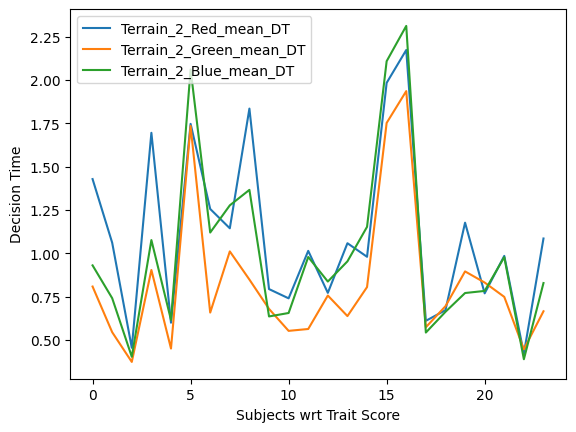

In [ ]:
dp2 = pd.DataFrame()
tre = ['Red', 'Green', 'Blue']
for i in tre:
    dp2 = pd.concat([dp2, dx[f"Terrain_2_{i}_mean_DT"]], axis=1)
dp2.plot(xlabel="Subjects wrt Trait Score", ylabel="Decision Time");
dp2.plot(subplots=True, figsize=(10, 6));
dp2.plot(subplots=True, layout=(1, 4), figsize=(20, 6), sharex=False)

###DT_wrt_*Trees_and_Terrain3*_for_all_Subjects

array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

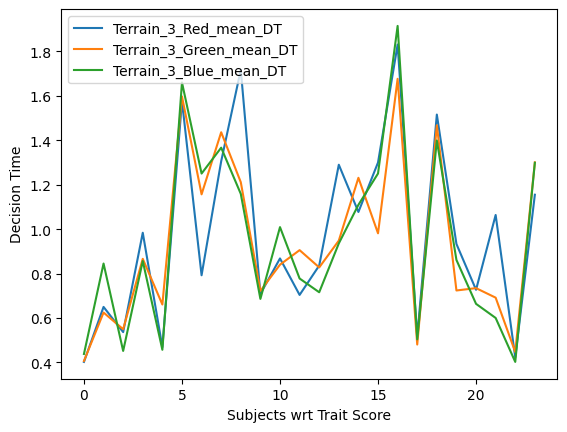

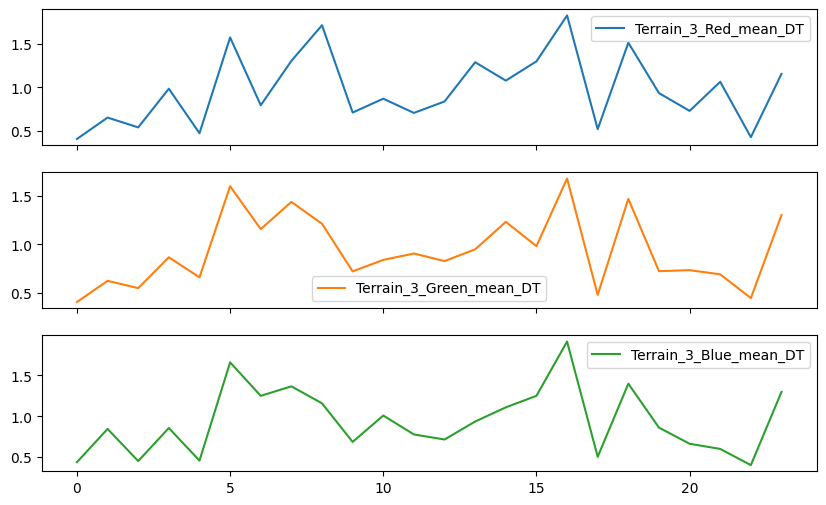

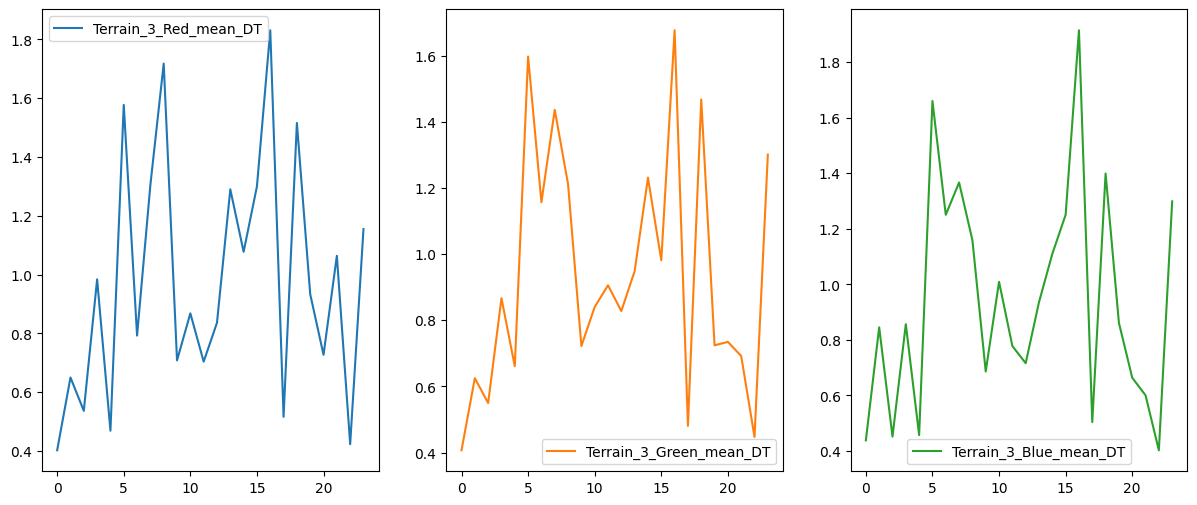

In [ ]:
dp3 = pd.DataFrame()
tre = ['Red', 'Green', 'Blue']
for i in tre:
    dp3 = pd.concat([dp3, dx[f"Terrain_3_{i}_mean_DT"]], axis=1)
dp3.plot(xlabel="Subjects wrt Trait Score", ylabel="Decision Time");
dp3.plot(subplots=True, figsize=(10, 6));
dp3.plot(subplots=True, layout=(1, 4), figsize=(20, 6), sharex=False)

###DT_wrt_**Trees_and_Terrain4**_for_all_Subjects

array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

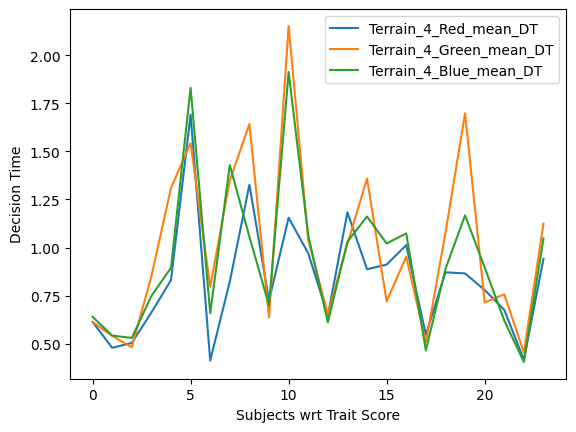

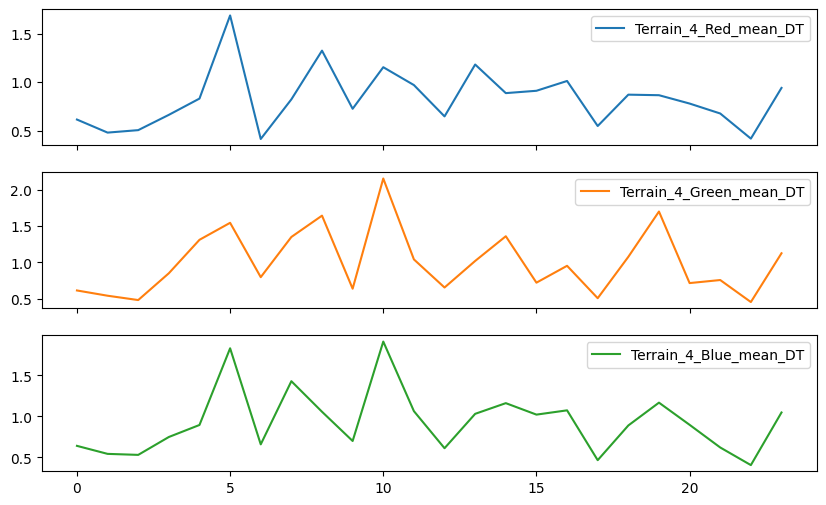

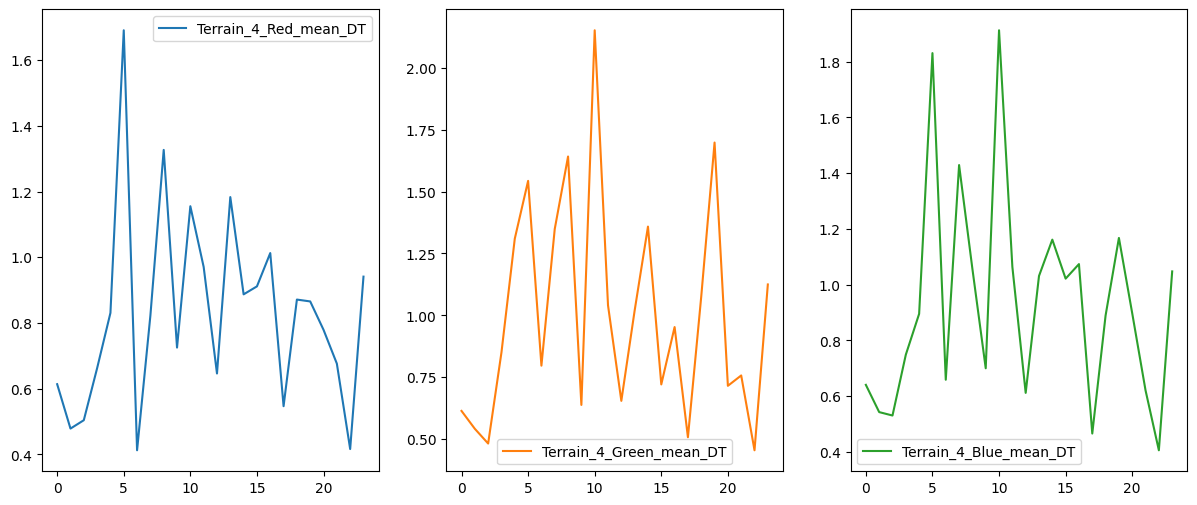

In [ ]:
dp4 = pd.DataFrame()
tre = ['Red', 'Green', 'Blue']
for i in tre:
    dp4 = pd.concat([dp4, dx[f"Terrain_4_{i}_mean_DT"]], axis=1)
dp4.plot(xlabel="Subjects wrt Trait Score", ylabel="Decision Time");
dp4.plot(subplots=True, figsize=(10, 6));
dp4.plot(subplots=True, layout=(1, 4), figsize=(20, 6), sharex=False)

####DT_wrt_**Trees_and_Terrain4**_for_all_Subjects - ARRANGEMENT WRT INCTEASING ORDER OF RD MEAN DECISION TIME

array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

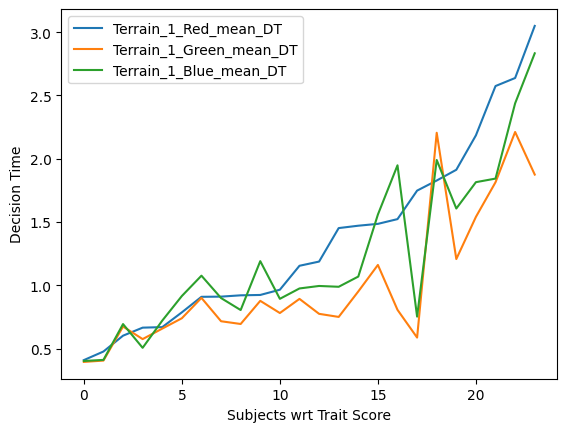

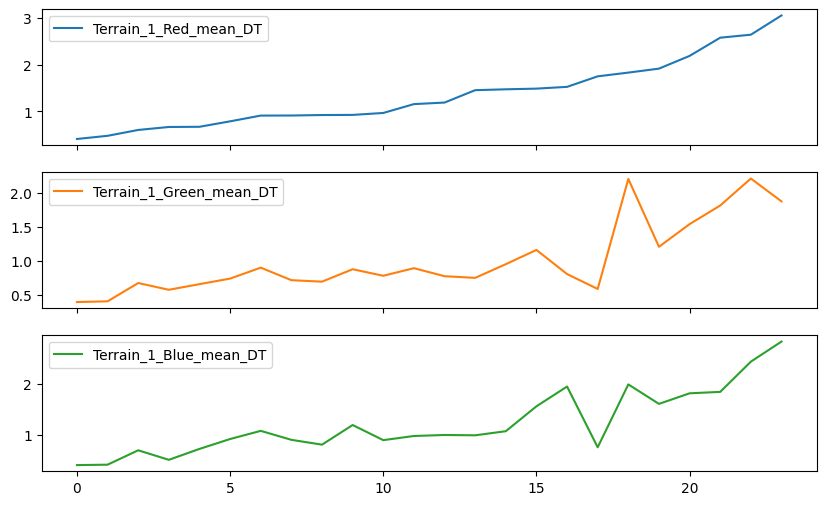

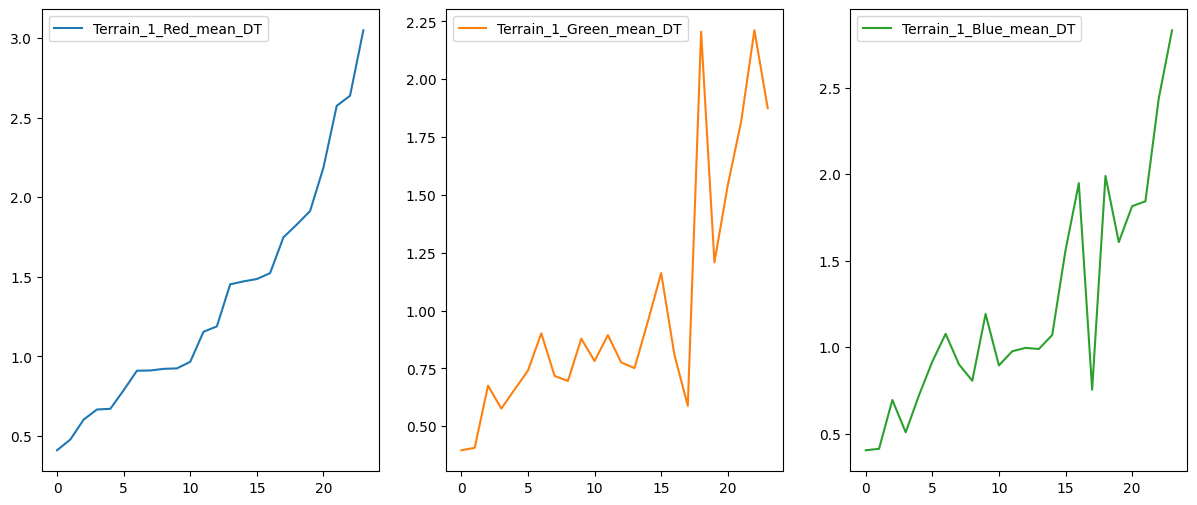

In [ ]:
dp1 = pd.DataFrame()
tre = ['Red', 'Green', 'Blue']
for i in tre:
    dp1 = pd.concat([dp1, dl[f"Terrain_1_{i}_mean_DT"]], axis=1)
dp1.plot(xlabel="Subjects wrt Trait Score", ylabel="Decision Time");
dp1.plot(subplots=True, figsize=(10, 6));
dp1.plot(subplots=True, layout=(1, 4), figsize=(20, 6), sharex=False)

In [ ]:
dp2 = pd.DataFrame()
tre = ['Red', 'Green', 'Blue']
for i in tre:
    dp2 = pd.concat([dp2, dl[f"Terrain_2_{i}_mean_DT"]], axis=1)
dp2.plot(xlabel="Subjects wrt Trait Score", ylabel="Decision Time");
dp2.plot(subplots=True, figsize=(10, 6));
dp2.plot(subplots=True, layout=(1, 4), figsize=(20, 6), sharex=False)

array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

In [ ]:
dp3 = pd.DataFrame()
tre = ['Red', 'Green', 'Blue']
for i in tre:
    dp3 = pd.concat([dp3, dl[f"Terrain_3_{i}_mean_DT"]], axis=1)
dp3.plot(xlabel="Subjects wrt Trait Score", ylabel="Decision Time");
dp3.plot(subplots=True, figsize=(10, 6));
dp3.plot(subplots=True, layout=(1, 4), figsize=(20, 6), sharex=False)

array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

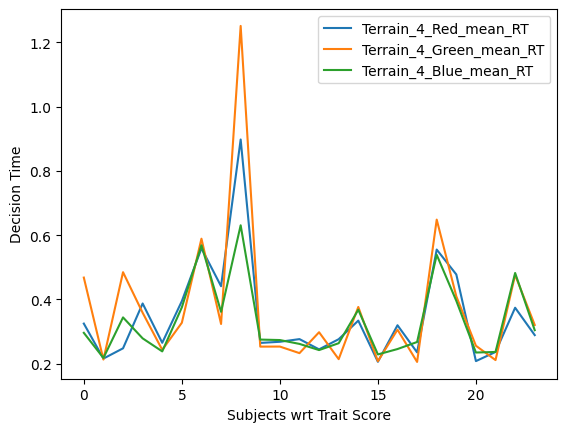

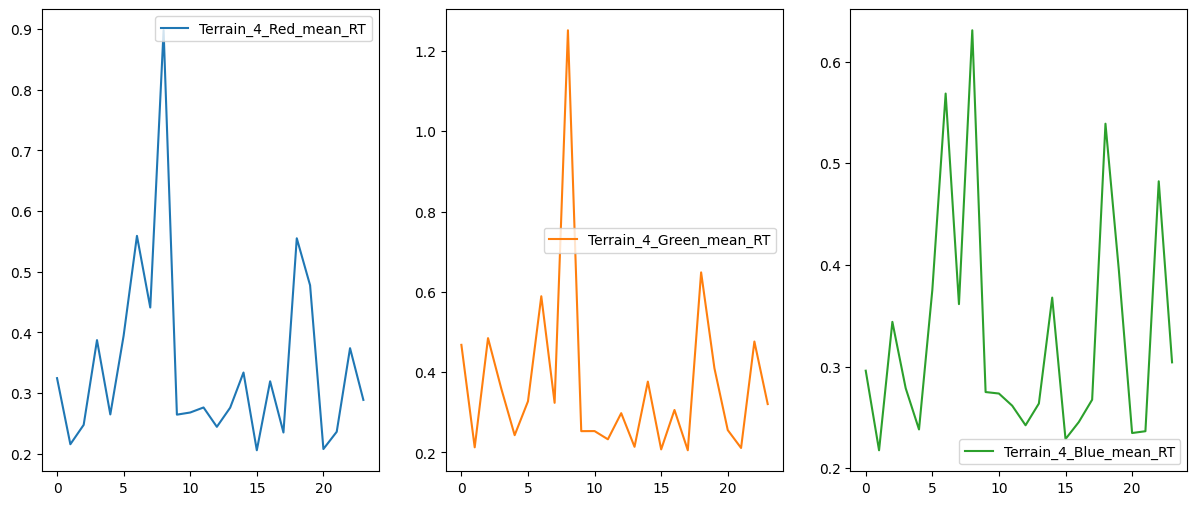

In [ ]:
dp4 = pd.DataFrame()
tre = ['Red', 'Green', 'Blue']
for i in tre:
    dp4 = pd.concat([dp4, dl[f"Terrain_4_{i}_mean_RT"]], axis=1)
dp4.plot(xlabel="Subjects wrt Trait Score", ylabel="Decision Time");
dp4.plot(subplots=True, figsize=(10, 6));
dp4.plot(subplots=True, layout=(1, 4), figsize=(20, 6), sharex=False)

#**Approach-Avoidance_Decision_Time(Mean-STD)_WRT_Terrain_BAR_PLOTS**

In [ ]:
dec = ['Approach', 'Avoid']
lst = ['1', '2', '3', '4']

In [ ]:
app_std1 = []
app_mean1 = []
avo_std1 = []
avo_mean1 = []

app_std2 = []
app_mean2 = []
avo_std2 = []
avo_mean2 = []

app_std3 = []
app_mean3 = []
avo_std3 = []
avo_mean3 = []

app_std4 = []
app_mean4 = []
avo_std4 = []
avo_mean4 = []

for i in range(len(dfx)):
    out1 = dfx[i]
    out1 = out1.groupby(['Terrain', 'Decision', 'DecisionTime']).agg(Decision_count=('Decision', 'count')).reset_index()
    out1 = out1.drop('Decision_count', axis = 1)
    for j in dec:
        out2 = out1[(out1['Decision'] == f"{j}")]
        for k in lst:
            f1 = out2[(out2['Terrain'] == f"{k}")]
            mean = f1['DecisionTime'].mean()
            std = f1['DecisionTime'].std()
            if k == '1':
                if j == 'Approach':
                    app_std1.append(std)
                    app_mean1.append(mean)
                if j == 'Avoid':
                    avo_std1.append(std)
                    avo_mean1.append(mean)
            if k == '2':
                if j == 'Approach':
                    app_std2.append(std)
                    app_mean2.append(mean)
                if j == 'Avoid':
                    avo_std2.append(std)
                    avo_mean2.append(mean)
            if k == '3':
                if j == 'Approach':
                    app_std3.append(std)
                    app_mean3.append(mean)
                if j == 'Avoid':
                    avo_std3.append(std)
                    avo_mean3.append(mean)
            if k == '4':
                if j == 'Approach':
                    app_std4.append(std)
                    app_mean4.append(mean)
                if j == 'Avoid':
                    avo_std4.append(std)
                    avo_mean4.append(mean)
subj = {}
output1 = pd.DataFrame({"Approach" : app_mean1, "Avoid" : avo_mean1}, index = df['Subject ID'])
output2 = pd.DataFrame({"Approach" : app_mean2, "Avoid" : avo_mean2}, index = df['Subject ID'])
output3 = pd.DataFrame({"Approach" : app_mean3, "Avoid" : avo_mean3}, index = df['Subject ID'])
output4 = pd.DataFrame({"Approach" : app_mean4, "Avoid" : avo_mean4}, index = df['Subject ID'])

subj['output1'] = output1
subj['output2'] = output2
subj['output3'] = output3
subj['output4'] = output4

output5 = pd.DataFrame({"Approach" : app_std1, "Avoid" : avo_std1}, index = df['Subject ID'])
output6 = pd.DataFrame({"Approach" : app_std2, "Avoid" : avo_std2}, index = df['Subject ID'])
output7 = pd.DataFrame({"Approach" : app_std3, "Avoid" : avo_std3}, index = df['Subject ID'])
output8 = pd.DataFrame({"Approach" : app_std4, "Avoid" : avo_std4}, index = df['Subject ID'])

subj['output5'] = output5
subj['output6'] = output6
subj['output7'] = output7
subj['output8'] = output8



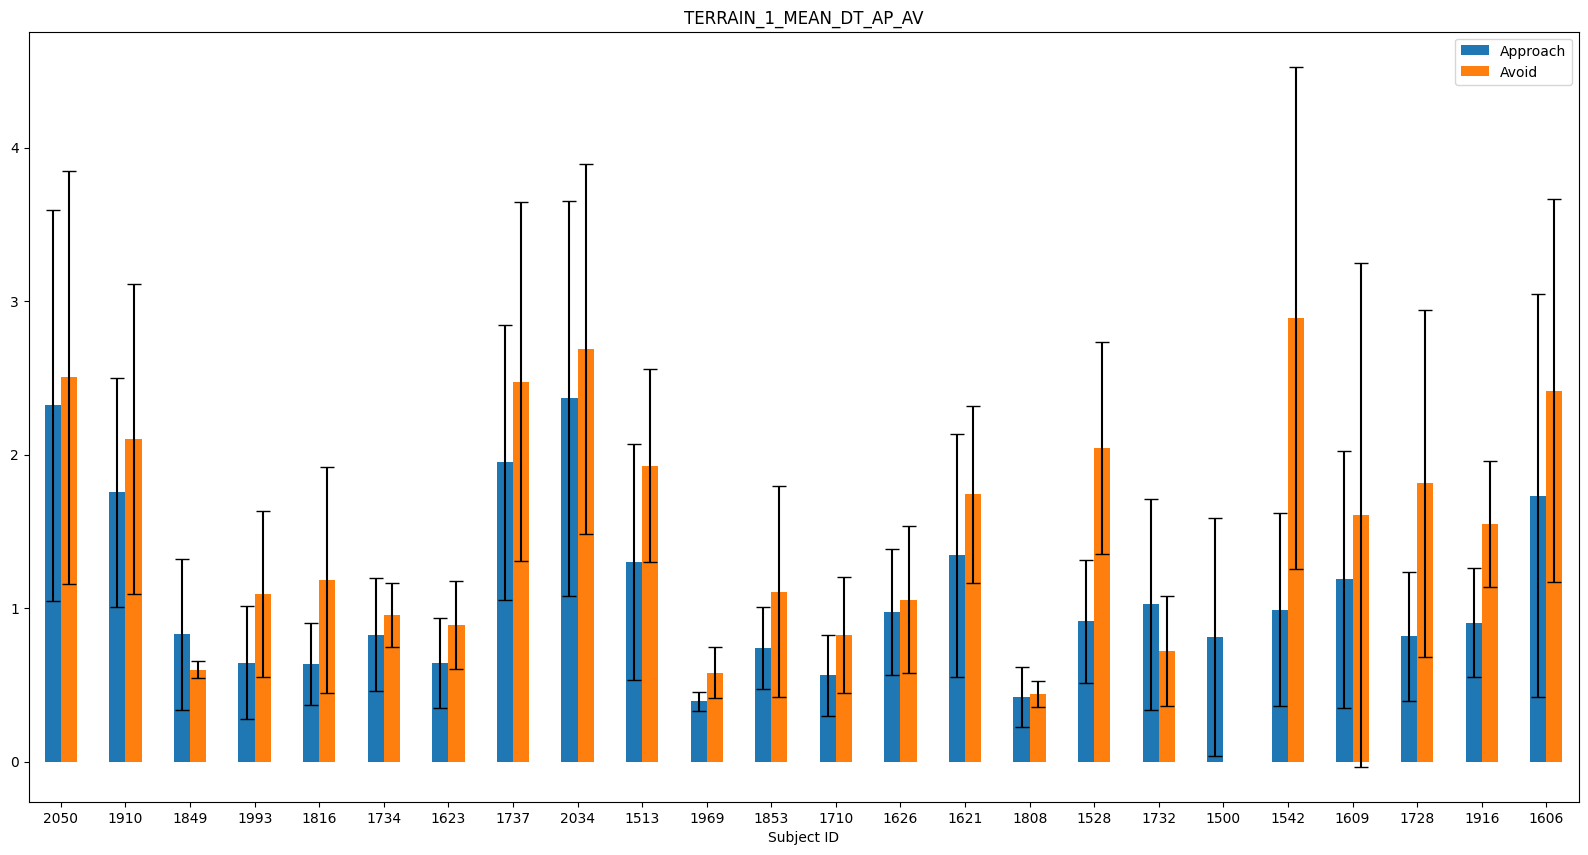

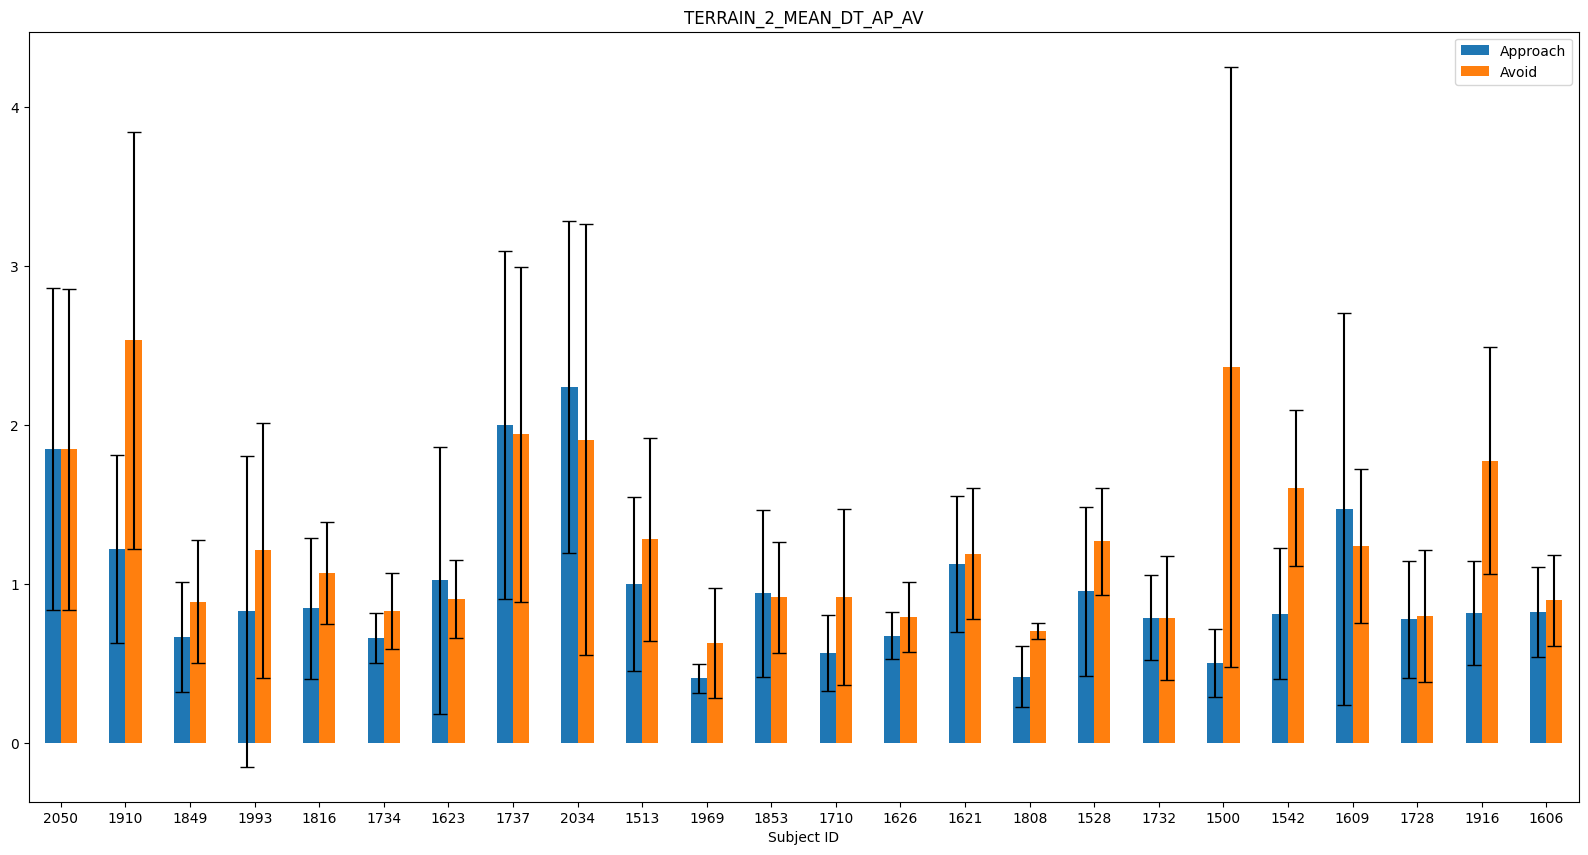

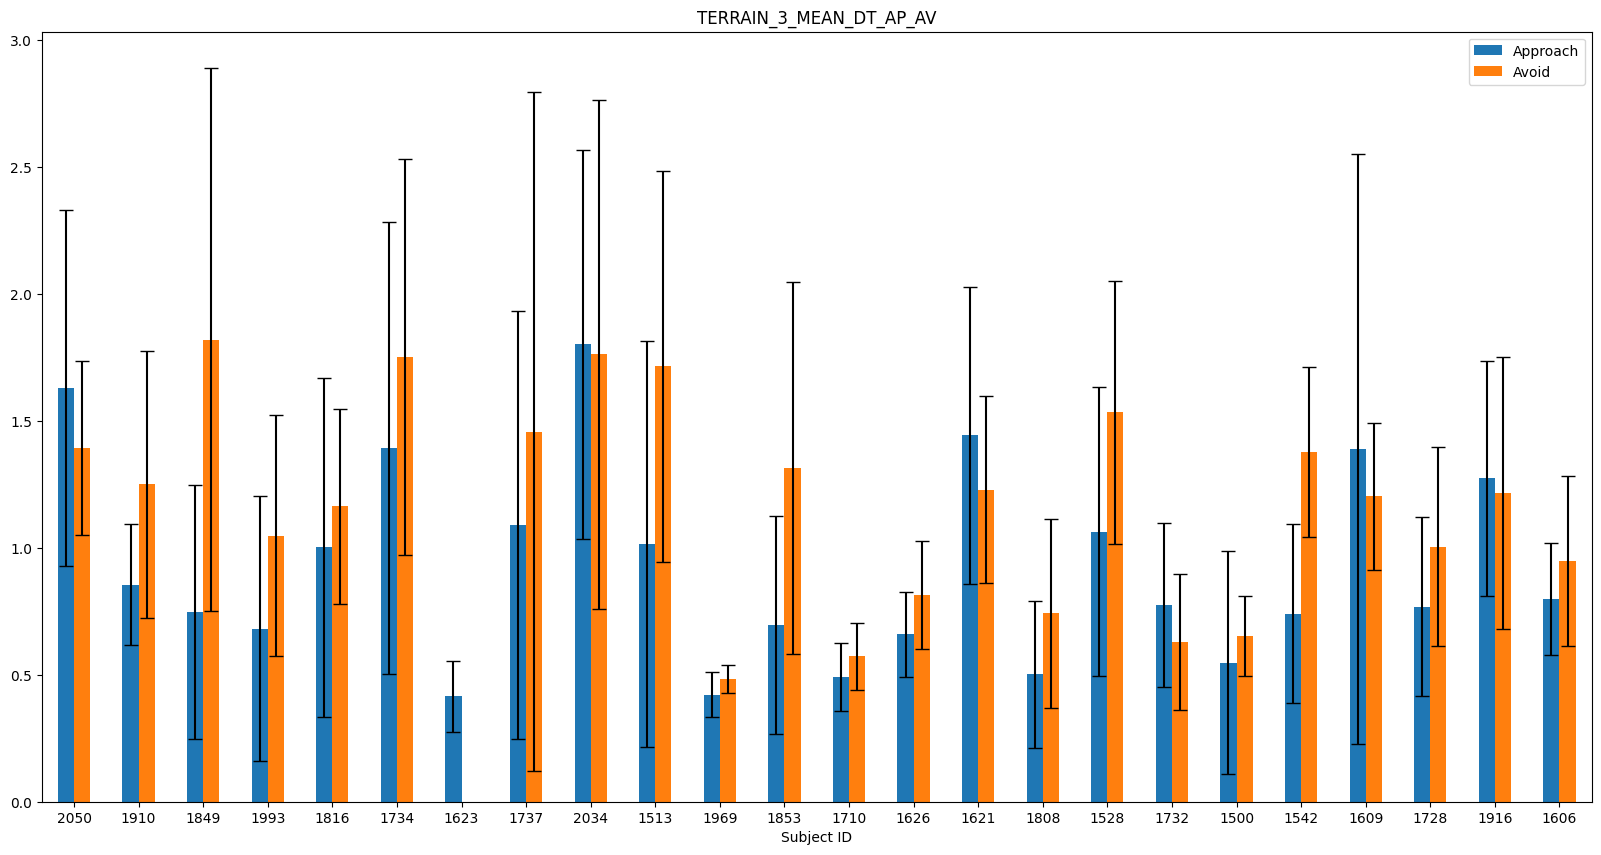

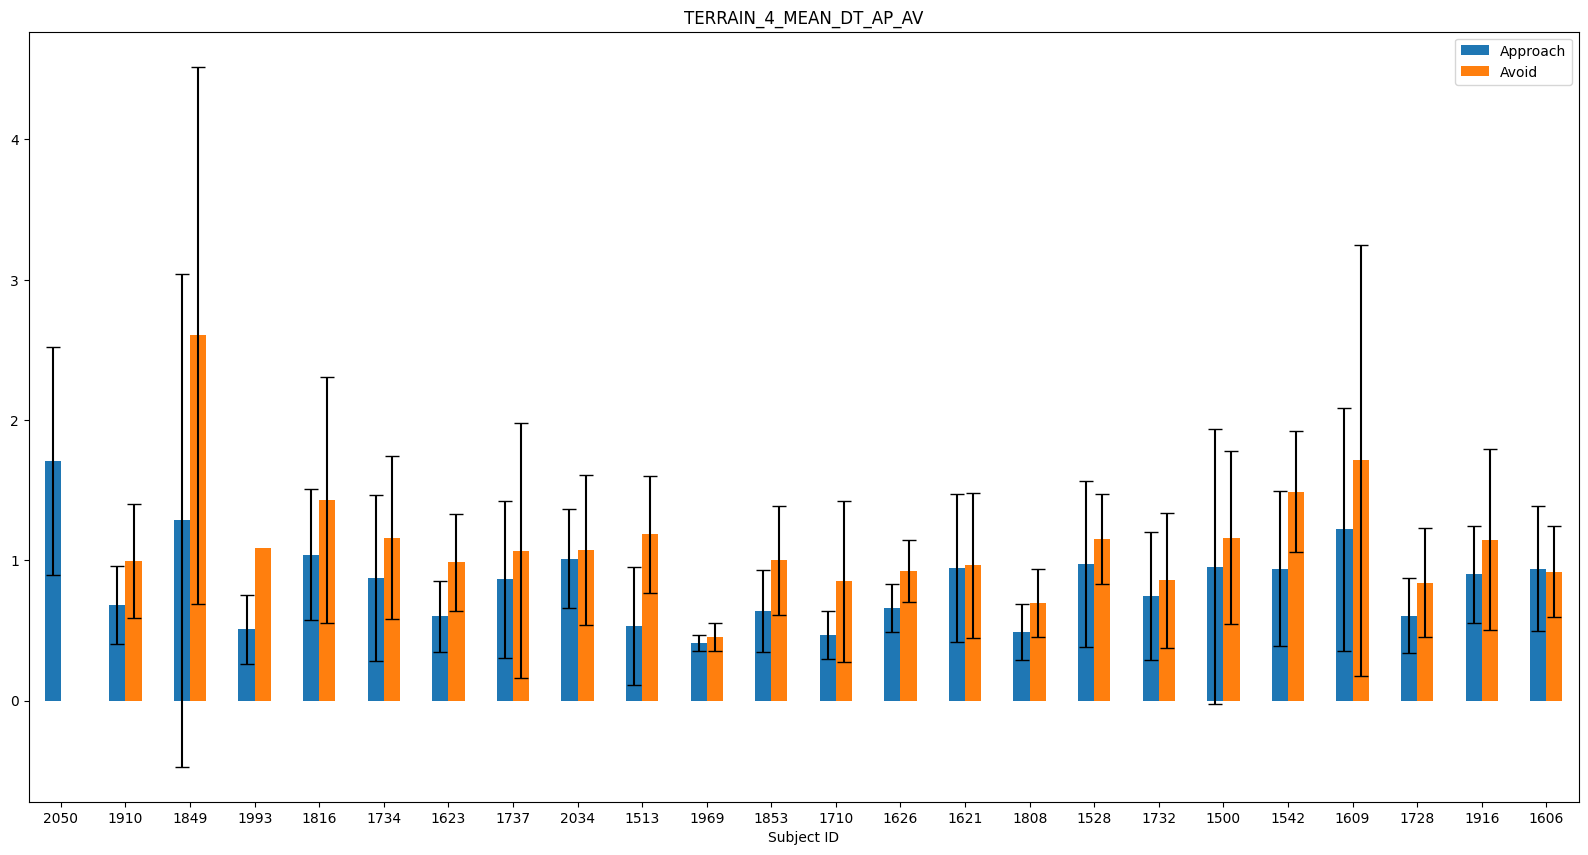

In [ ]:
fig1, ax = plt.subplots()
output1.plot.bar(yerr=output5, ax=ax, capsize=5, rot=0 ,figsize=(20,10), title ='TERRAIN_1_MEAN_DT_AP_AV');

fig2, ax = plt.subplots()
output2.plot.bar(yerr=output6, ax=ax, capsize=5, rot=0,figsize=(20,10), title ='TERRAIN_2_MEAN_DT_AP_AV');

fig3, ax = plt.subplots()
output3.plot.bar(yerr=output7, ax=ax, capsize=5, rot=0,figsize=(20,10), title ='TERRAIN_3_MEAN_DT_AP_AV');

fig4, ax = plt.subplots()
output4.plot.bar(yerr=output8, ax=ax, capsize=5, rot=0,figsize=(20,10), title ='TERRAIN_4_MEAN_DT_AP_AV');

##**Approach-Avoidance_Decision_Time(Mean-STD)_WRT_Terrain_BAR_PLOTS (Arranged with respect to Trait scores)**

In [ ]:
for i in range(1, 9):
    output_temp = pd.concat([subj[f"output{i}"].reset_index(),df['Trait_score']], axis = 1)
    # print(subj[f"output{i}"])
    output_temp = output_temp[output_temp['Trait_score'] != 0]
    output_temp = output_temp.sort_values('Trait_score').reset_index(drop=True)
    output_temp = output_temp.drop('Trait_score', axis=1)
    subj[f"output{i}"] = output_temp.set_index('Subject ID')
    # print(subj[f"output{i}"])

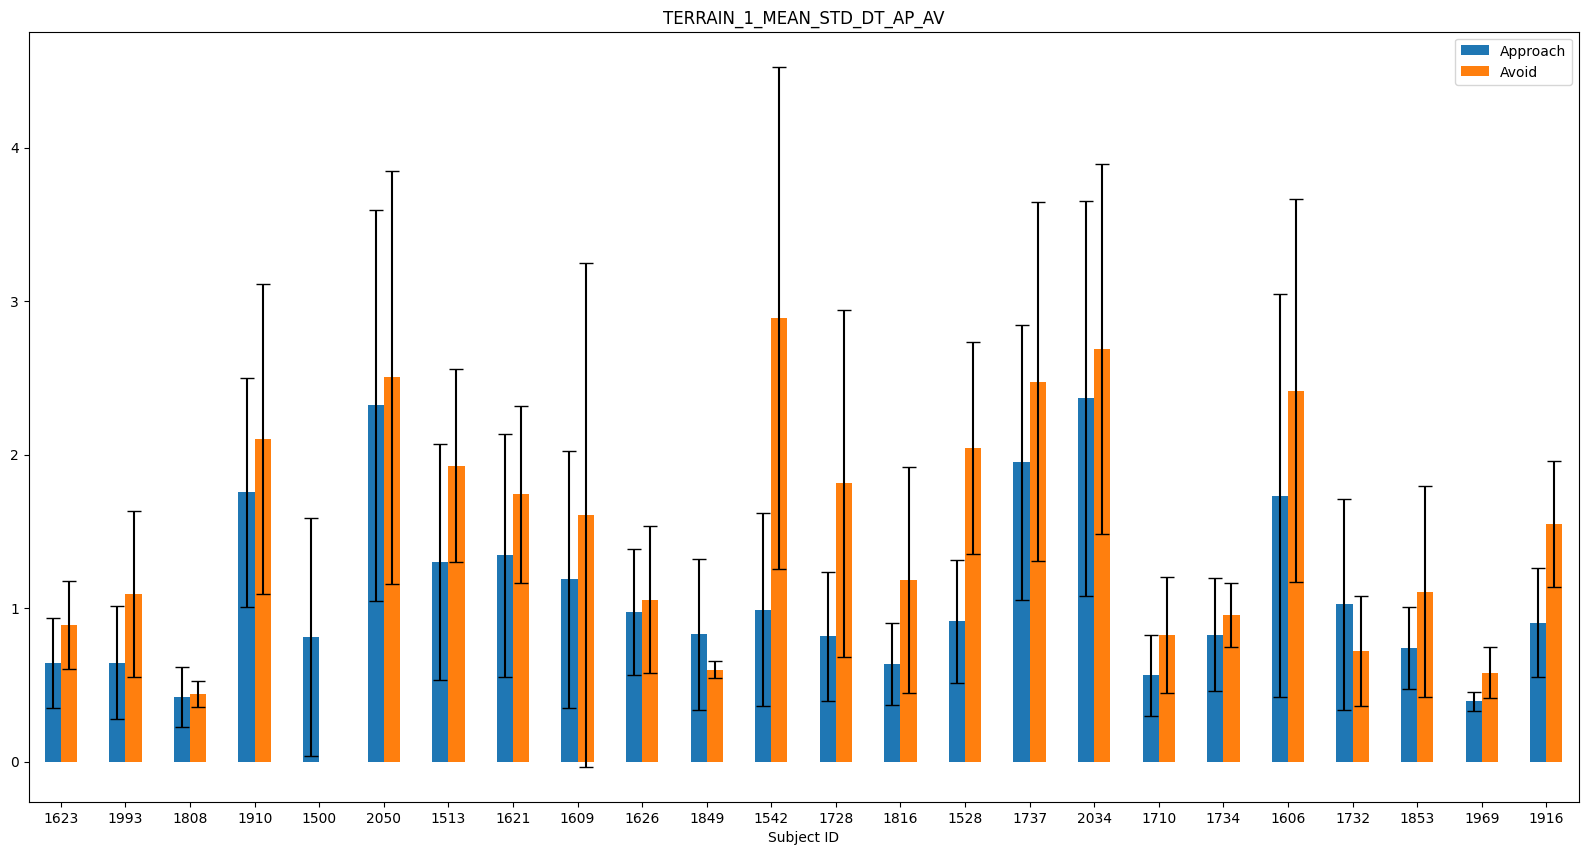

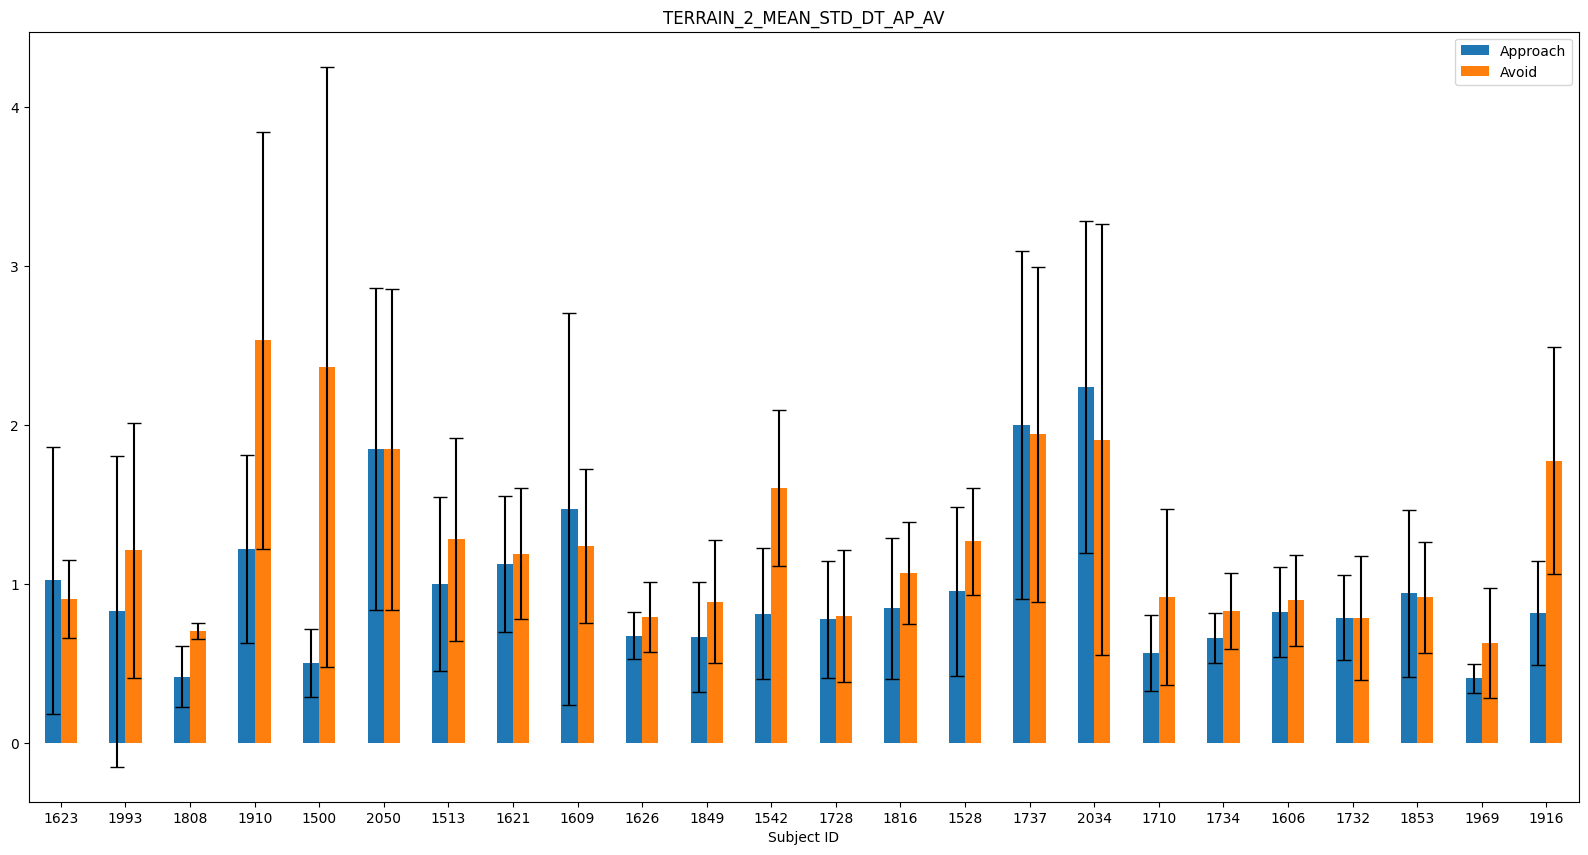

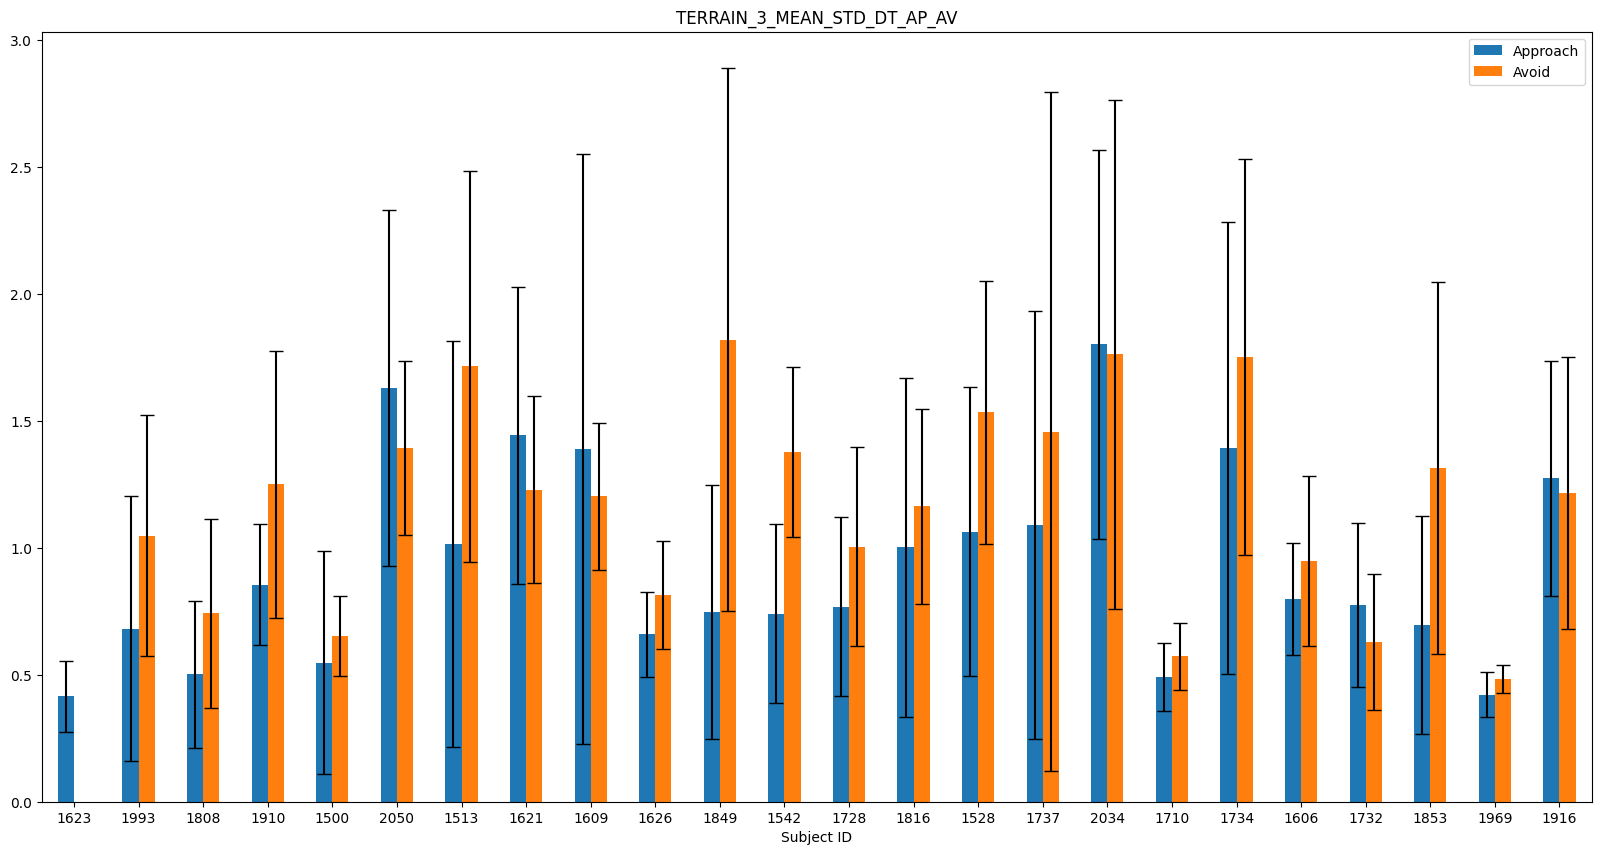

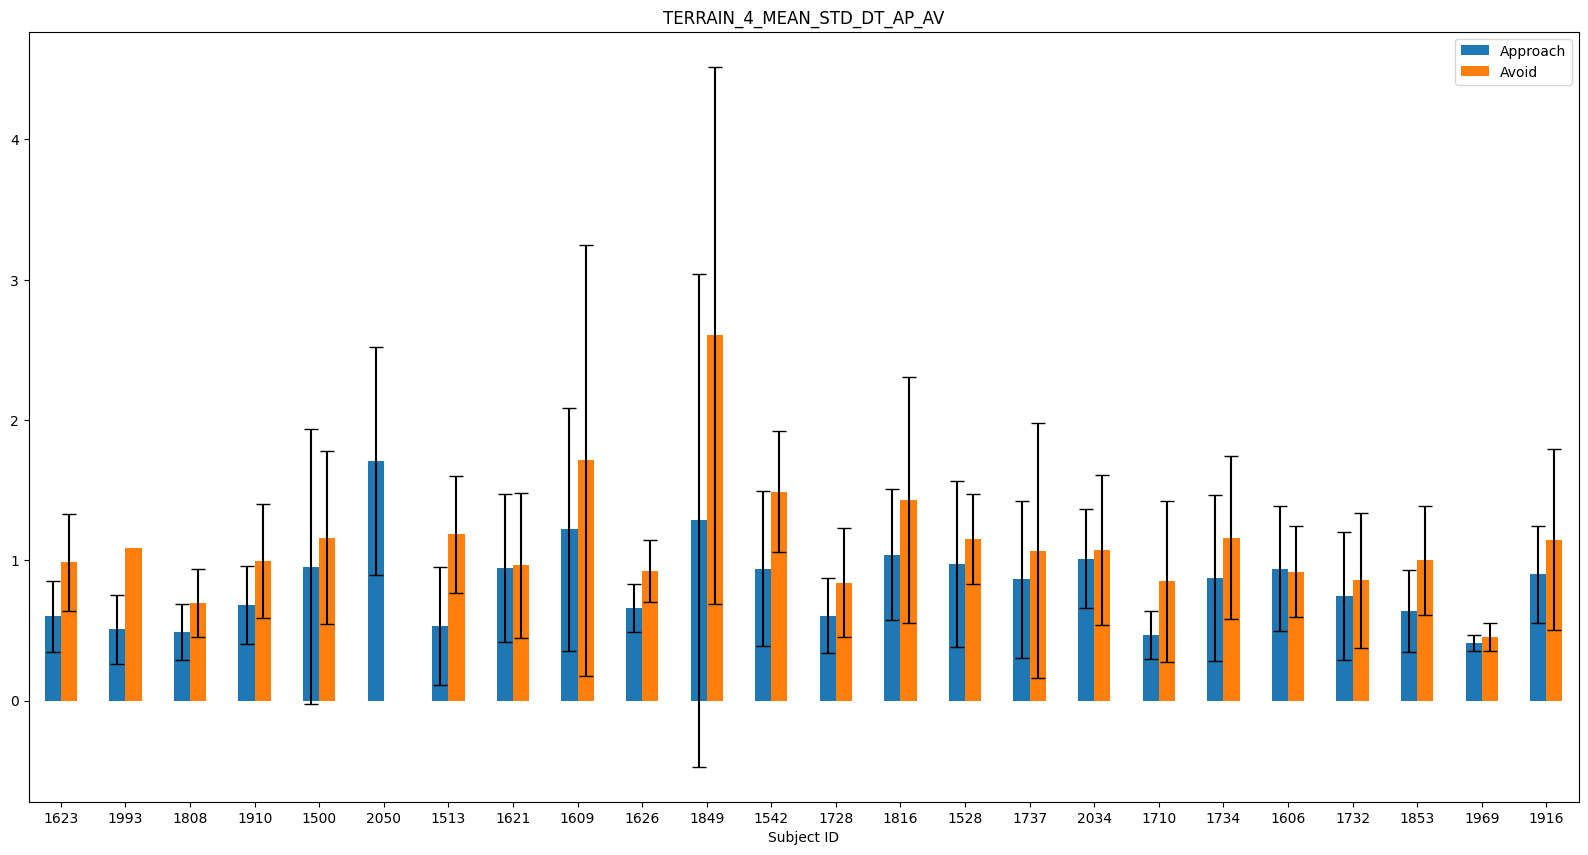

In [ ]:
fig1, ax = plt.subplots()
subj['output1'].plot.bar(yerr=subj['output5'], ax=ax, capsize=5, rot=0 ,figsize=(20,10), title ='TERRAIN_1_MEAN_STD_DT_AP_AV');

fig2, ax = plt.subplots()
subj['output2'].plot.bar(yerr=subj['output6'], ax=ax, capsize=5, rot=0,figsize=(20,10), title ='TERRAIN_2_MEAN_STD_DT_AP_AV');

fig3, ax = plt.subplots()
subj['output3'].plot.bar(yerr=subj['output7'], ax=ax, capsize=5, rot=0,figsize=(20,10), title ='TERRAIN_3_MEAN_STD_DT_AP_AV');

fig4, ax = plt.subplots()
subj['output4'].plot.bar(yerr=subj['output8'], ax=ax, capsize=5, rot=0,figsize=(20,10), title ='TERRAIN_4_MEAN_STD_DT_AP_AV');

##*Approach-Avoidance_Decision_Time**(Mean-Standard error)**_WRT_Terrain_BAR_PLOTS (Arranged with respect to Trait scores)*  

In [ ]:
app_std1 = []
app_mean1 = []
avo_std1 = []
avo_mean1 = []

app_std2 = []
app_mean2 = []
avo_std2 = []
avo_mean2 = []

app_std3 = []
app_mean3 = []
avo_std3 = []
avo_mean3 = []

app_std4 = []
app_mean4 = []
avo_std4 = []
avo_mean4 = []

for i in range(len(dfx)):
    out1 = dfx[i]
    out1 = out1.groupby(['Terrain', 'Decision', 'DecisionTime']).agg(Decision_count=('Decision', 'count')).reset_index()
    out1 = out1.drop('Decision_count', axis = 1)
    for j in dec:
        out2 = out1[(out1['Decision'] == f"{j}")]
        for k in lst:
            f1 = out2[(out2['Terrain'] == f"{k}")]
            mean = f1['DecisionTime'].mean()
            std = f1['DecisionTime'].std()
            Len = len(f1['DecisionTime'])

            if Len != 0:
                std_err = std / Len
            else:
                std_err = None
            if k == '1':
                if j == 'Approach':
                    app_std1.append(std_err)
                    app_mean1.append(mean)
                if j == 'Avoid':
                    avo_std1.append(std_err)
                    avo_mean1.append(mean)
            if k == '2':
                if j == 'Approach':
                    app_std2.append(std_err)
                    app_mean2.append(mean)
                if j == 'Avoid':
                    avo_std2.append(std_err)
                    avo_mean2.append(mean)
            if k == '3':
                if j == 'Approach':
                    app_std3.append(std_err)
                    app_mean3.append(mean)
                if j == 'Avoid':
                    avo_std3.append(std_err)
                    avo_mean3.append(mean)
            if k == '4':
                if j == 'Approach':
                    app_std4.append(std_err)
                    app_mean4.append(mean)
                if j == 'Avoid':
                    avo_std4.append(std_err)
                    avo_mean4.append(mean)
subj = {}
output1 = pd.DataFrame({"Approach" : app_mean1, "Avoid" : avo_mean1}, index = df['Subject ID'])
output2 = pd.DataFrame({"Approach" : app_mean2, "Avoid" : avo_mean2}, index = df['Subject ID'])
output3 = pd.DataFrame({"Approach" : app_mean3, "Avoid" : avo_mean3}, index = df['Subject ID'])
output4 = pd.DataFrame({"Approach" : app_mean4, "Avoid" : avo_mean4}, index = df['Subject ID'])

subj['output1'] = output1
subj['output2'] = output2
subj['output3'] = output3
subj['output4'] = output4

output5 = pd.DataFrame({"Approach" : app_std1, "Avoid" : avo_std1}, index = df['Subject ID'])
output6 = pd.DataFrame({"Approach" : app_std2, "Avoid" : avo_std2}, index = df['Subject ID'])
output7 = pd.DataFrame({"Approach" : app_std3, "Avoid" : avo_std3}, index = df['Subject ID'])
output8 = pd.DataFrame({"Approach" : app_std4, "Avoid" : avo_std4}, index = df['Subject ID'])

subj['output5'] = output5
subj['output6'] = output6
subj['output7'] = output7
subj['output8'] = output8


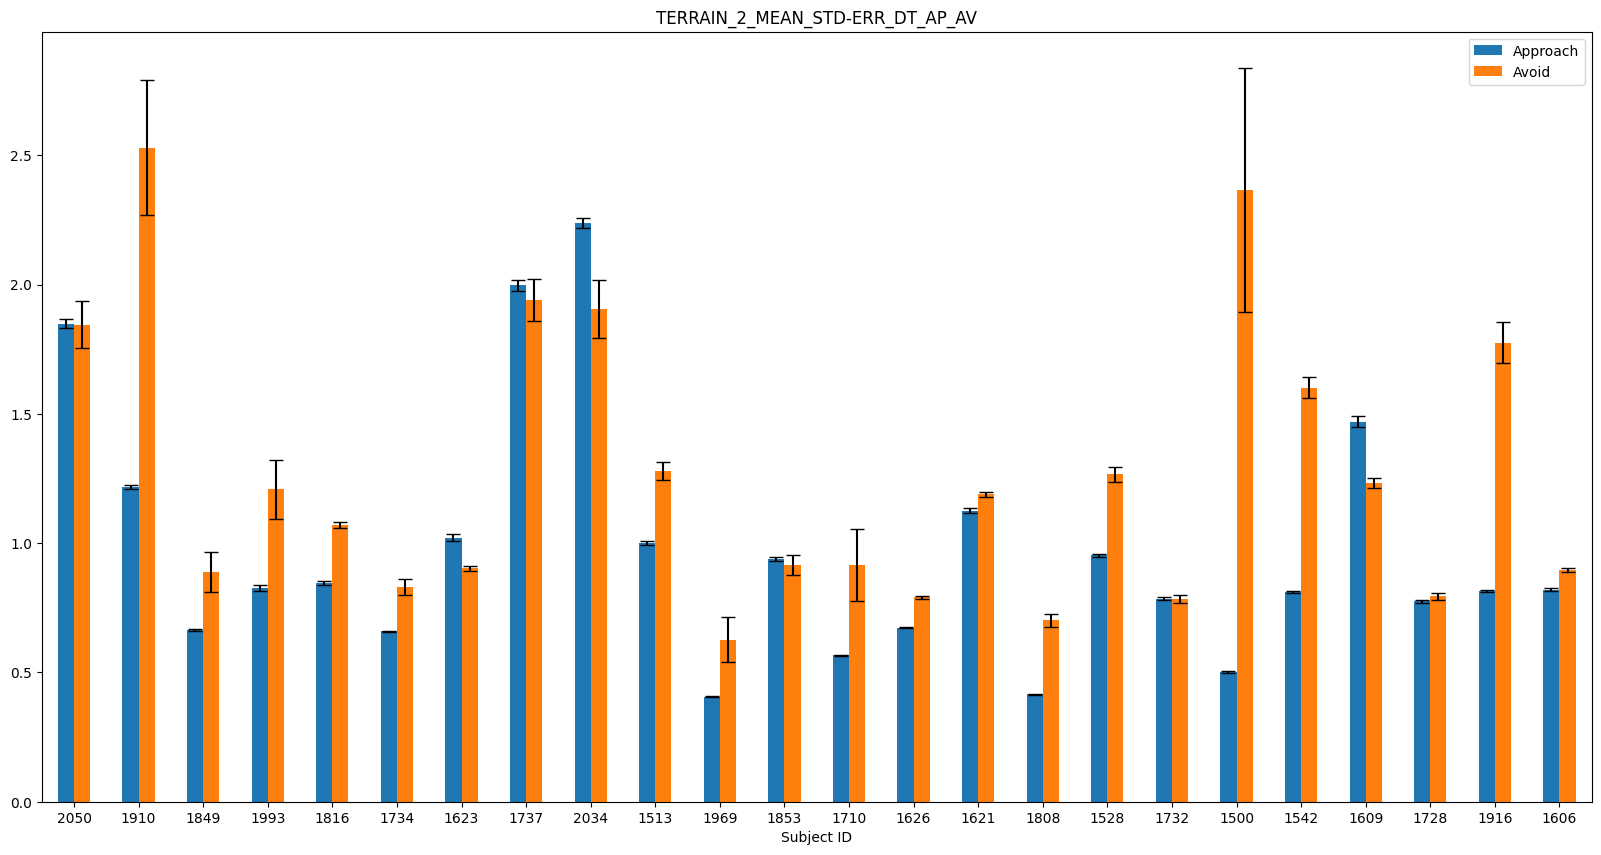

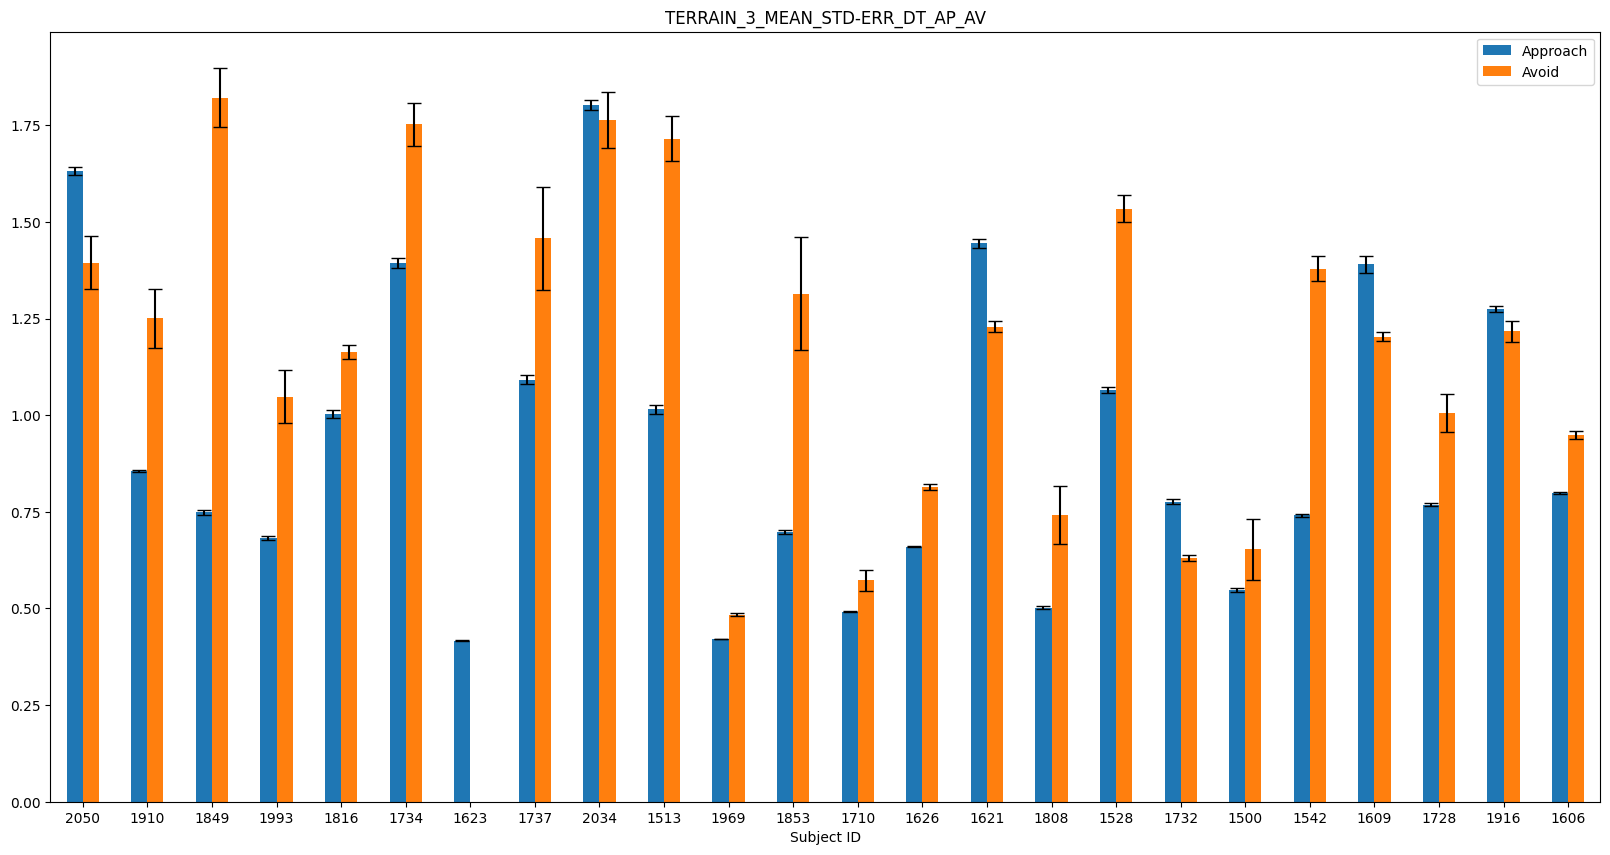

In [ ]:
fig1, ax = plt.subplots()
output1.plot.bar(yerr=output5, ax=ax, capsize=5, rot=0 ,figsize=(20,10), title ='TERRAIN_1_MEAN_STD-ERR_DT_AP_AV');

fig2, ax = plt.subplots()
output2.plot.bar(yerr=output6, ax=ax, capsize=5, rot=0,figsize=(20,10), title ='TERRAIN_2_MEAN_STD-ERR_DT_AP_AV');

fig3, ax = plt.subplots()
output3.plot.bar(yerr=output7, ax=ax, capsize=5, rot=0,figsize=(20,10), title ='TERRAIN_3_MEAN_STD-ERR_DT_AP_AV');

fig4, ax = plt.subplots()
output4.plot.bar(yerr=output8, ax=ax, capsize=5, rot=0,figsize=(20,10), title ='TERRAIN_4_MEAN_STD-ERR_DT_AP_AV');

#**Approach-Avoidance_Decision_Time(Mean-STD_ERR)_WRT_Trees_BAR_PLOTS**

In [ ]:
app_Red_std1 = []
app_Red_mean1 = []
avo_Red_std1 = []
avo_Red_mean1 = []

app_Red_std2 = []
app_Red_mean2 = []
avo_Red_std2 = []
avo_Red_mean2 = []

app_Red_std3 = []
app_Red_mean3 = []
avo_Red_std3 = []
avo_Red_mean3 = []

app_Red_std4 = []
app_Red_mean4 = []
avo_Red_std4 = []
avo_Red_mean4 = []

app_Green_std1 = []
app_Green_mean1 = []
avo_Green_std1 = []
avo_Green_mean1 = []

app_Green_std2 = []
app_Green_mean2 = []
avo_Green_std2 = []
avo_Green_mean2 = []

app_Green_std3 = []
app_Green_mean3 = []
avo_Green_std3 = []
avo_Green_mean3 = []

app_Green_std4 = []
app_Green_mean4 = []
avo_Green_std4 = []
avo_Green_mean4 = []

app_Blue_std1 = []
app_Blue_mean1 = []
avo_Blue_std1 = []
avo_Blue_mean1 = []

app_Blue_std2 = []
app_Blue_mean2 = []
avo_Blue_std2 = []
avo_Blue_mean2 = []

app_Blue_std3 = []
app_Blue_mean3 = []
avo_Blue_std3 = []
avo_Blue_mean3 = []

app_Blue_std4 = []
app_Blue_mean4 = []
avo_Blue_std4 = []
avo_Blue_mean4 = []

for i in range(len(dfx)):
    out1 = dfx[i]
    out1 = out1.drop(columns=['RevealTime'])
    out1 = out1.drop(columns=['Reward'])
    for j in dec:
        out2 = out1[(out1['Decision'] == f"{j}")]
        for k in lst:
            f1 = out2[(out2['Terrain'] == f"{k}")]
            for l in tre:
                f2 = f1[(f1['Tree'] == f"{l}")]
                mean = f1['DecisionTime'].mean()
                std = f1['DecisionTime'].std()
                Len = len(f2['DecisionTime'])
                if Len != 0:
                    std = std / Len
                else:
                    std = None
                if k == '1':
                    if j == 'Approach':
                        if l == 'Red':
                            app_Red_std1.append(std)
                            app_Red_mean1.append(mean)
                        elif l == 'Green':
                            app_Green_std1.append(std)
                            app_Green_mean1.append(mean)
                        else:
                            app_Blue_std1.append(std)
                            app_Blue_mean1.append(mean)
                    if j == 'Avoid':
                        if l == 'Red':
                            avo_Red_std1.append(std)
                            avo_Red_mean1.append(mean)
                        elif l == 'Green':
                            avo_Green_std1.append(std)
                            avo_Green_mean1.append(mean)
                        else:
                            avo_Blue_std1.append(std)
                            avo_Blue_mean1.append(mean)
                if k == '2':
                    if j == 'Approach':
                        if l == 'Red':
                            app_Red_std2.append(std)
                            app_Red_mean2.append(mean)
                        elif l == 'Green':
                            app_Green_std2.append(std)
                            app_Green_mean2.append(mean)
                        else:
                            app_Blue_std2.append(std)
                            app_Blue_mean2.append(mean)
                    if j == 'Avoid':
                        if l == 'Red':
                            avo_Red_std2.append(std)
                            avo_Red_mean2.append(mean)
                        elif l == 'Green':
                            avo_Green_std2.append(std)
                            avo_Green_mean2.append(mean)
                        else:
                            avo_Blue_std2.append(std)
                            avo_Blue_mean2.append(mean)
                if k == '3':
                    if j == 'Approach':
                        if l == 'Red':
                            app_Red_std3.append(std)
                            app_Red_mean3.append(mean)
                        elif l == 'Green':
                            app_Green_std3.append(std)
                            app_Green_mean3.append(mean)
                        else:
                            app_Blue_std3.append(std)
                            app_Blue_mean3.append(mean)
                    if j == 'Avoid':
                        if l == 'Red':
                            avo_Red_std3.append(std)
                            avo_Red_mean3.append(mean)
                        elif l == 'Green':
                            avo_Green_std3.append(std)
                            avo_Green_mean3.append(mean)
                        else:
                            avo_Blue_std3.append(std)
                            avo_Blue_mean3.append(mean)
                if k == '4':
                    if j == 'Approach':
                        if l == 'Red':
                            app_Red_std4.append(std)
                            app_Red_mean4.append(mean)
                        elif l == 'Green':
                            app_Green_std4.append(std)
                            app_Green_mean4.append(mean)
                        else:
                            app_Blue_std4.append(std)
                            app_Blue_mean4.append(mean)
                    if j == 'Avoid':
                        if l == 'Red':
                            avo_Red_std4.append(std)
                            avo_Red_mean4.append(mean)
                        elif l == 'Green':
                            avo_Green_std4.append(std)
                            avo_Green_mean4.append(mean)
                        else:
                            avo_Blue_std4.append(std)
                            avo_Blue_mean4.append(mean)
subj = {}

#red
output1 = pd.DataFrame({"Approach" : app_Red_mean1, "Avoid" : avo_Red_mean1}, index = df['Subject ID'])
output2 = pd.DataFrame({"Approach" : app_Red_mean2, "Avoid" : avo_Red_mean2}, index = df['Subject ID'])
output3 = pd.DataFrame({"Approach" : app_Red_mean3, "Avoid" : avo_Red_mean3}, index = df['Subject ID'])
output4 = pd.DataFrame({"Approach" : app_Red_mean4, "Avoid" : avo_Red_mean4}, index = df['Subject ID'])

#green
output5 = pd.DataFrame({"Approach" : app_Green_mean1, "Avoid" : avo_Green_mean1}, index = df['Subject ID'])
output6 = pd.DataFrame({"Approach" : app_Green_mean2, "Avoid" : avo_Green_mean2}, index = df['Subject ID'])
output7 = pd.DataFrame({"Approach" : app_Green_mean3, "Avoid" : avo_Green_mean3}, index = df['Subject ID'])
output8 = pd.DataFrame({"Approach" : app_Green_mean4, "Avoid" : avo_Green_mean4}, index = df['Subject ID'])

#blue
output9 = pd.DataFrame({"Approach" : app_Blue_mean1, "Avoid" : avo_Blue_mean1}, index = df['Subject ID'])
output10 = pd.DataFrame({"Approach" : app_Blue_mean2, "Avoid" : avo_Blue_mean2}, index = df['Subject ID'])
output11 = pd.DataFrame({"Approach" : app_Blue_mean3, "Avoid" : avo_Blue_mean3}, index = df['Subject ID'])
output12 = pd.DataFrame({"Approach" : app_Blue_mean4, "Avoid" : avo_Blue_mean4}, index = df['Subject ID'])

subj['output1'] = output1
subj['output2'] = output2
subj['output3'] = output3
subj['output4'] = output4
subj['output5'] = output5
subj['output6'] = output6
subj['output7'] = output7
subj['output8'] = output8
subj['output9'] = output9
subj['output10'] = output10
subj['output11'] = output11
subj['output12'] = output12

#red
output13 = pd.DataFrame({"Approach" : app_Red_std1, "Avoid" : avo_Red_std1}, index = df['Subject ID'])
output14 = pd.DataFrame({"Approach" : app_Red_std2, "Avoid" : avo_Red_std2}, index = df['Subject ID'])
output15 = pd.DataFrame({"Approach" : app_Red_std3, "Avoid" : avo_Red_std3}, index = df['Subject ID'])
output16 = pd.DataFrame({"Approach" : app_Red_std4, "Avoid" : avo_Red_std4}, index = df['Subject ID'])

#green
output17 = pd.DataFrame({"Approach" : app_Green_std1, "Avoid" : avo_Green_std1}, index = df['Subject ID'])
output18 = pd.DataFrame({"Approach" : app_Green_std2, "Avoid" : avo_Green_std2}, index = df['Subject ID'])
output19 = pd.DataFrame({"Approach" : app_Green_std3, "Avoid" : avo_Green_std3}, index = df['Subject ID'])
output20 = pd.DataFrame({"Approach" : app_Green_std4, "Avoid" : avo_Green_std4}, index = df['Subject ID'])

#blue
output21 = pd.DataFrame({"Approach" : app_Blue_std1, "Avoid" : avo_Blue_std1}, index = df['Subject ID'])
output22 = pd.DataFrame({"Approach" : app_Blue_std2, "Avoid" : avo_Blue_std2}, index = df['Subject ID'])
output23 = pd.DataFrame({"Approach" : app_Blue_std3, "Avoid" : avo_Blue_std3}, index = df['Subject ID'])
output24 = pd.DataFrame({"Approach" : app_Blue_std4, "Avoid" : avo_Blue_std4}, index = df['Subject ID'])

subj['output13'] = output13
subj['output14'] = output14
subj['output15'] = output15
subj['output16'] = output16
subj['output17'] = output17
subj['output18'] = output18
subj['output19'] = output19
subj['output20'] = output20
subj['output21'] = output21
subj['output22'] = output22
subj['output23'] = output23
subj['output24'] = output24

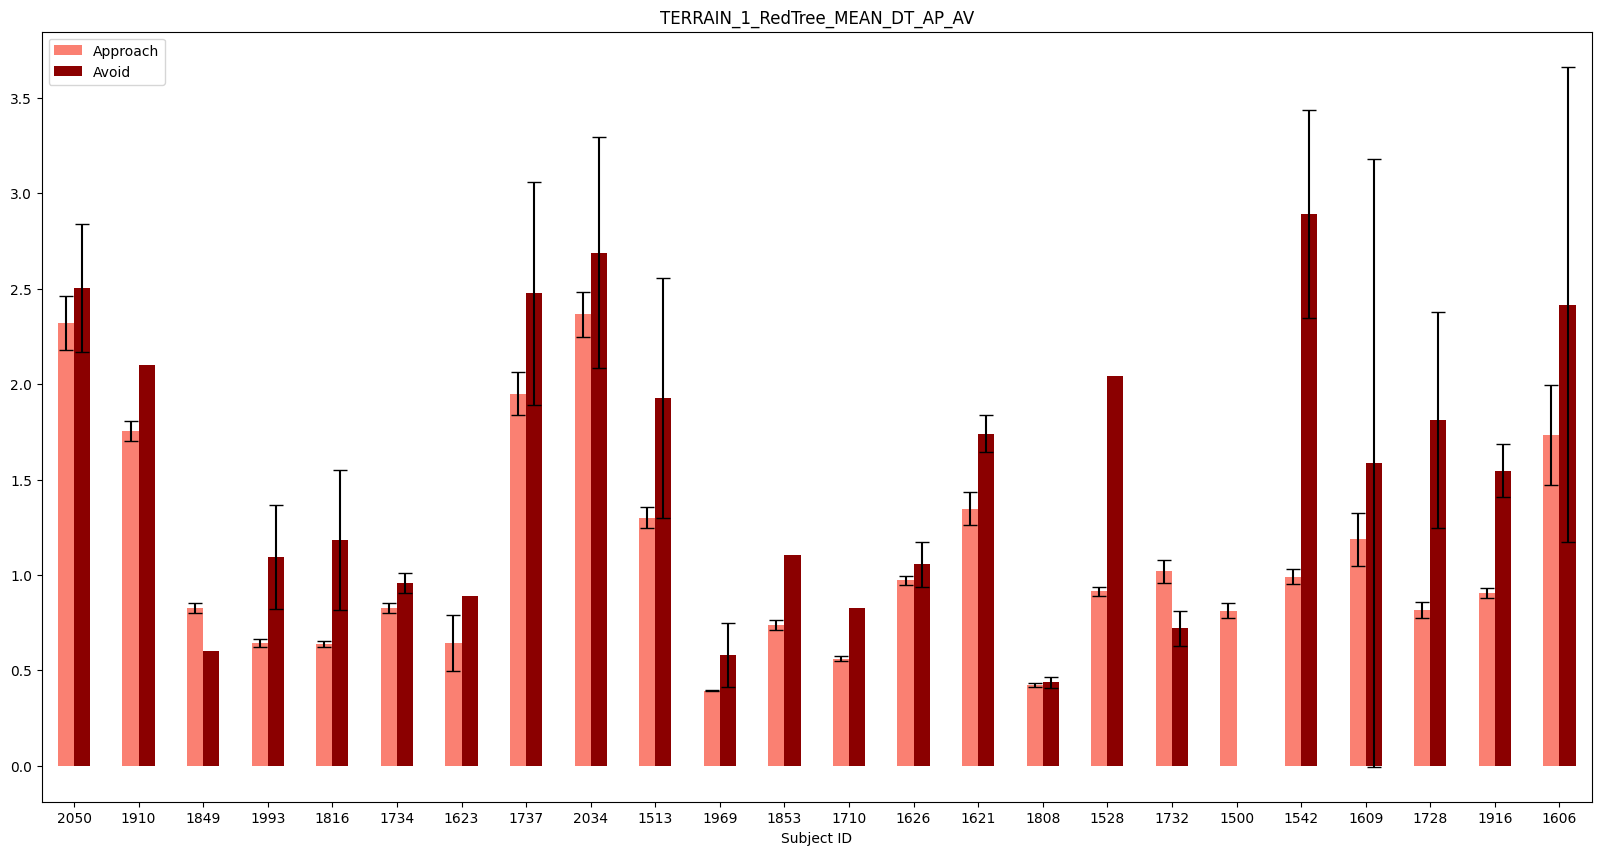

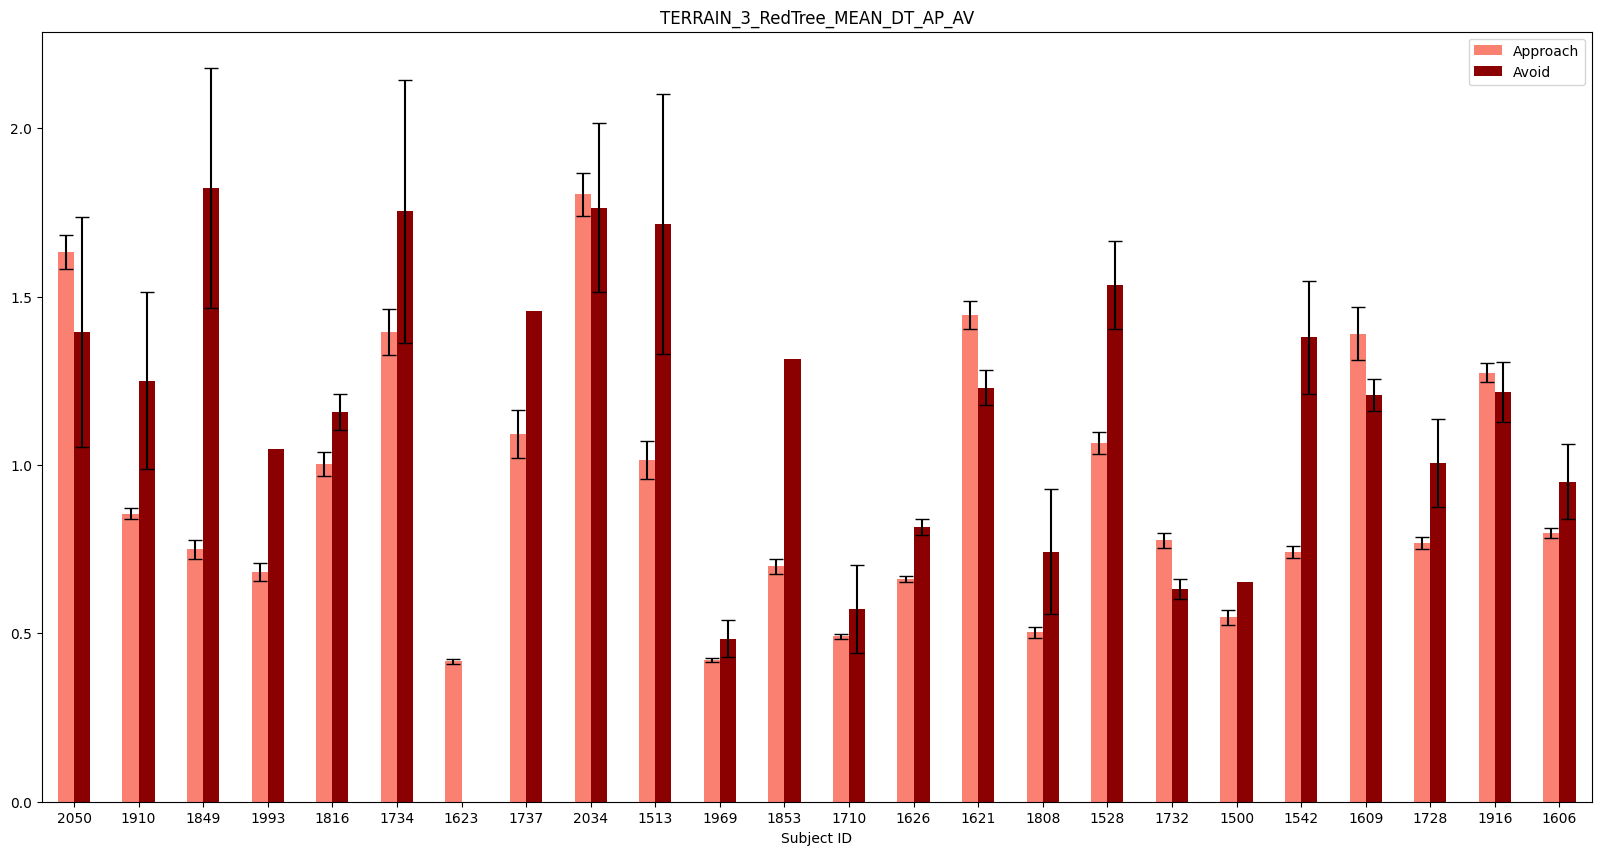

In [ ]:
# Red

fig1, ax = plt.subplots()
subj['output1'].plot.bar(yerr=subj['output13'], ax=ax, capsize=5, rot=0, color = ['salmon','darkred'], figsize=(20,10), title ='TERRAIN_1_RedTree_MEAN_DT_AP_AV');

fig2, ax = plt.subplots()
subj['output2'].plot.bar(yerr=subj['output14'], ax=ax, capsize=5, rot=0, color = ['salmon','darkred'], figsize=(20,10), title ='TERRAIN_2_RedTree_MEAN_DT_AP_AV');

fig3, ax = plt.subplots()
subj['output3'].plot.bar(yerr=subj['output15'], ax=ax, capsize=5, rot=0,  color = ['salmon','darkred'], figsize=(20,10), title ='TERRAIN_3_RedTree_MEAN_DT_AP_AV');

fig4, ax = plt.subplots()
subj['output4'].plot.bar(yerr=subj['output16'], ax=ax, capsize=5, rot=0, color = ['salmon','darkred'], figsize=(20,10), title ='TERRAIN_4_RedTree_MEAN_DT_AP_AV');

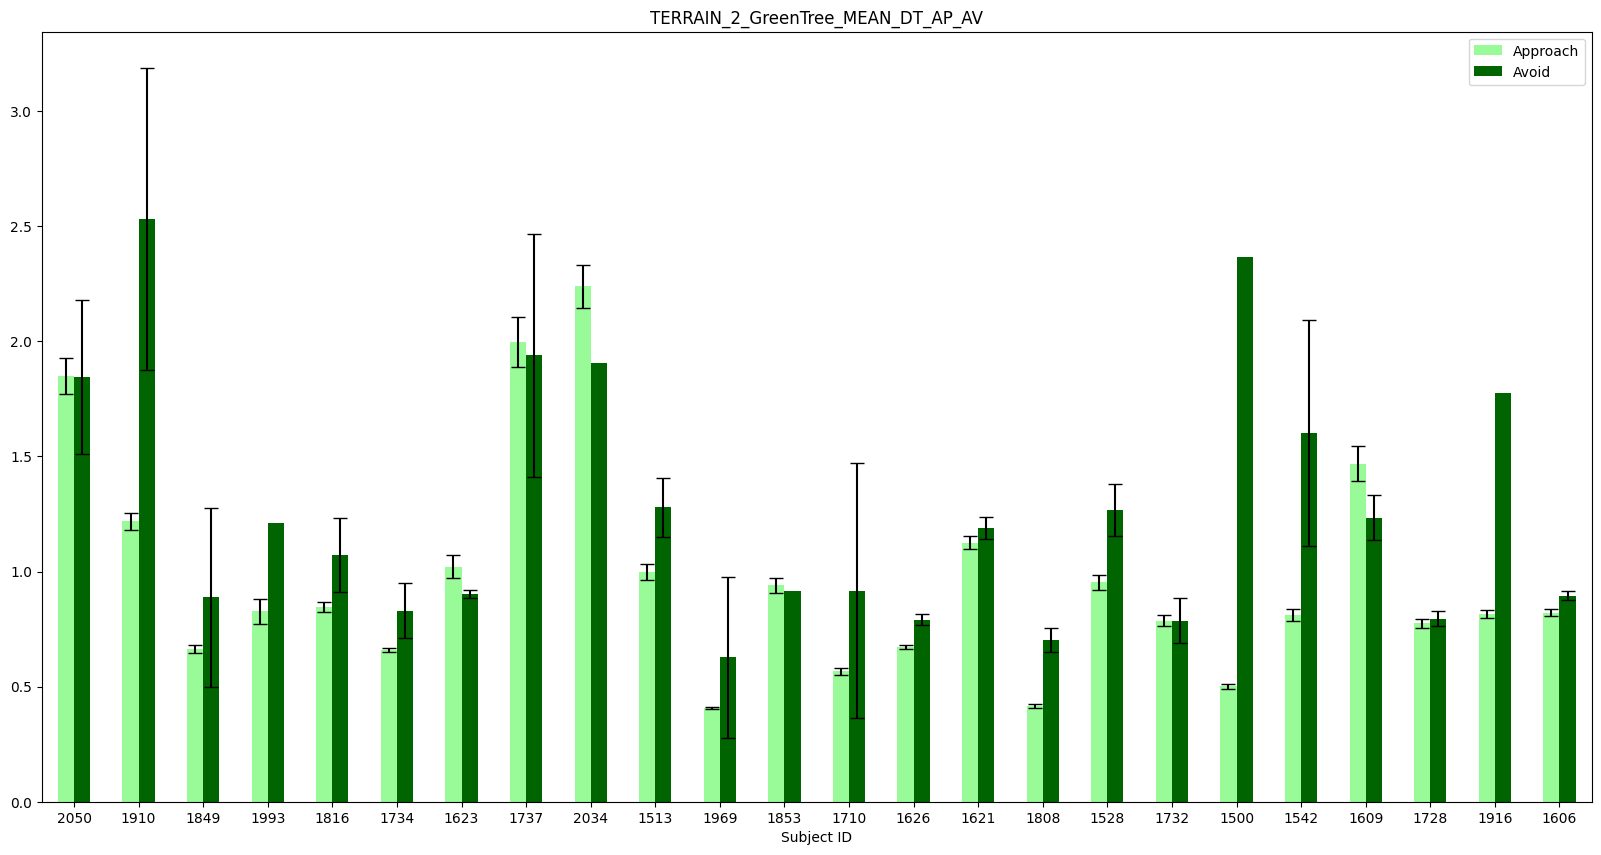

In [ ]:
#Green

fig1, ax = plt.subplots()
subj['output5'].plot.bar(yerr=subj['output17'], ax=ax, capsize=5, rot=0, color = ['palegreen','darkgreen'], figsize=(20,10), title ='TERRAIN_1_GreenTree_MEAN_DT_AP_AV');

fig2, ax = plt.subplots()
subj['output6'].plot.bar(yerr=subj['output18'], ax=ax, capsize=5, rot=0,color = ['palegreen','darkgreen'], figsize=(20,10), title ='TERRAIN_2_GreenTree_MEAN_DT_AP_AV');

fig3, ax = plt.subplots()
subj['output7'].plot.bar(yerr=subj['output19'], ax=ax, capsize=5, rot=0,color = ['palegreen','darkgreen'], figsize=(20,10), title ='TERRAIN_3_GreenTree_MEAN_DT_AP_AV');

fig4, ax = plt.subplots()
subj['output8'].plot.bar(yerr=subj['output20'], ax=ax, capsize=5, rot=0, color = ['palegreen','darkgreen'], figsize=(20,10), title ='TERRAIN_4_GreenTree_MEAN_DT_AP_AV');

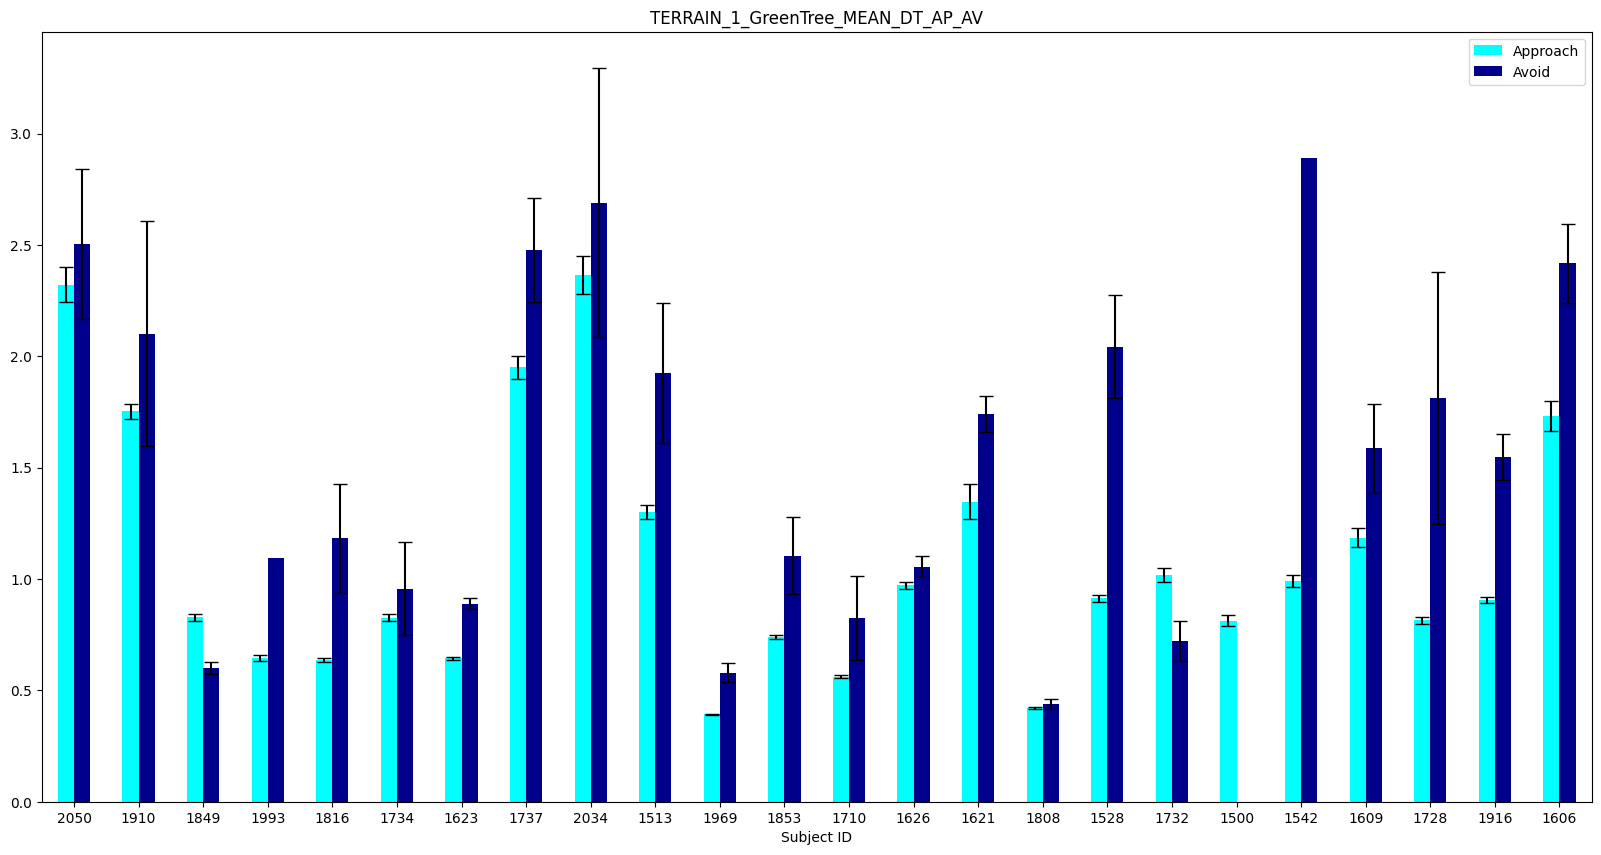

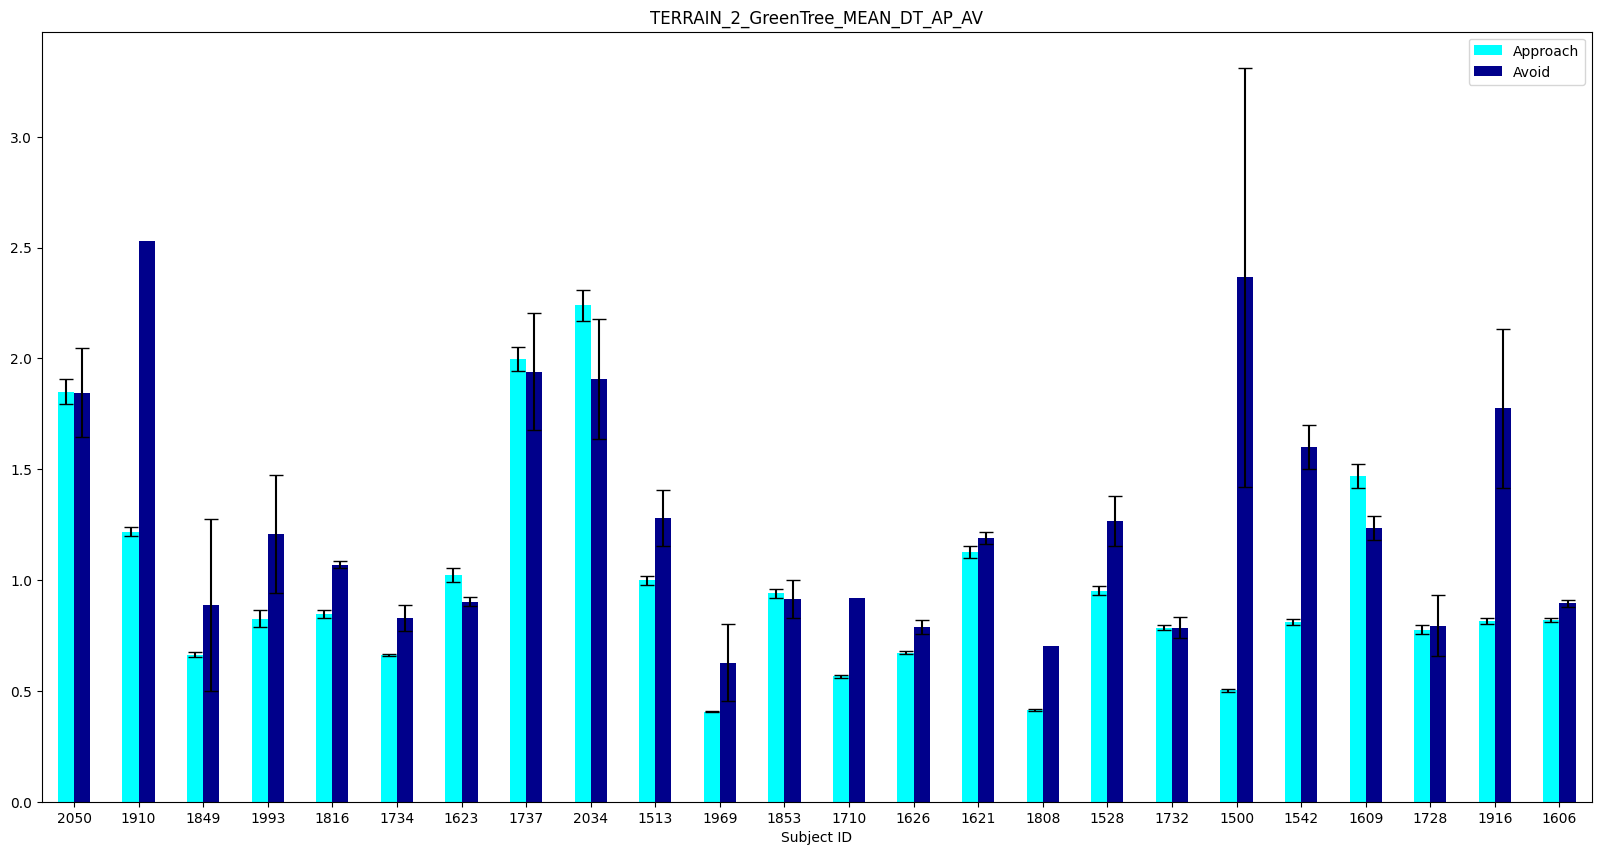

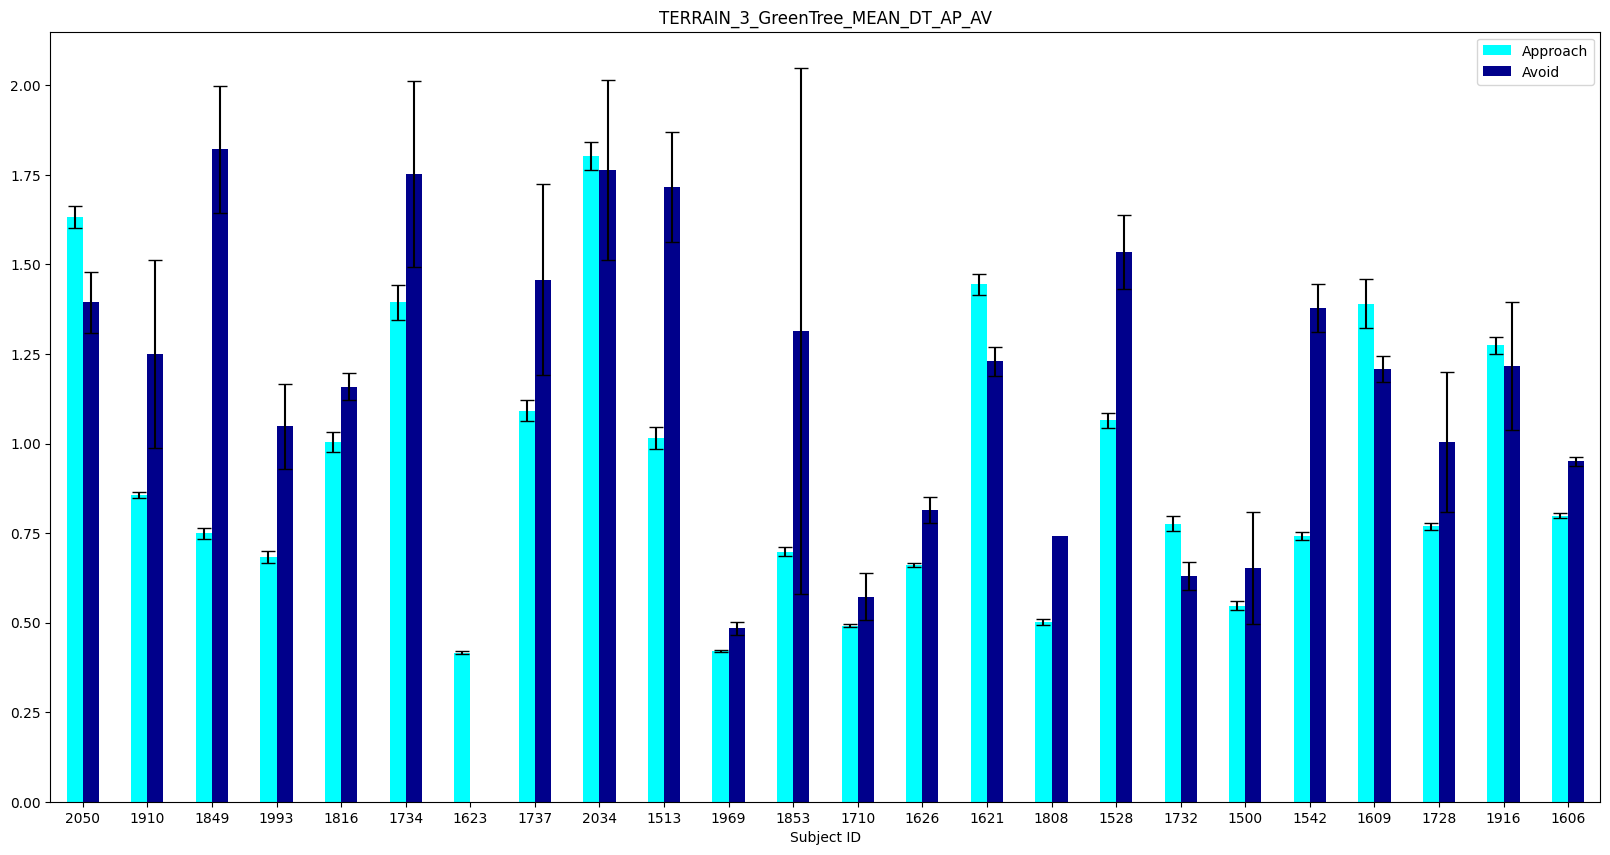

In [ ]:
#Blue

fig1, ax = plt.subplots()
subj['output9'].plot.bar(yerr=subj['output21'], ax=ax, capsize=5, rot=0 , color = ['cyan','darkblue'], figsize=(20,10), title ='TERRAIN_1_GreenTree_MEAN_DT_AP_AV');

fig2, ax = plt.subplots()
subj['output10'].plot.bar(yerr=subj['output22'], ax=ax, capsize=5, rot=0, color = ['cyan','darkblue'], figsize=(20,10), title ='TERRAIN_2_GreenTree_MEAN_DT_AP_AV');

fig3, ax = plt.subplots()
subj['output11'].plot.bar(yerr=subj['output23'], ax=ax, capsize=5, rot=0, color = ['cyan','darkblue'], figsize=(20,10), title ='TERRAIN_3_GreenTree_MEAN_DT_AP_AV');

fig4, ax = plt.subplots()
subj['output12'].plot.bar(yerr=subj['output24'], ax=ax, capsize=5, rot=0, color = ['cyan','darkblue'], figsize=(20,10), title ='TERRAIN_4_GreenTree_MEAN_DT_AP_AV');

##*Approach-Avoidance_Decision_Time**(Mean-Standard error)**_WRT_TREES_BAR_PLOTS (Arranged with respect to Trait scores)*  

In [ ]:
for i in range(1, 25):
    output_temp = pd.concat([subj[f"output{i}"].reset_index(),df['Trait_score']], axis = 1)
    print(subj[f"output{i}"])
    output_temp = output_temp[output_temp['Trait_score'] != 0]
    output_temp = output_temp.sort_values('Trait_score').reset_index(drop=True)
    output_temp = output_temp.drop('Trait_score', axis=1)
    subj[f"output{i}"] = output_temp.set_index('Subject ID')
    print(subj[f"output{i}"])

            Approach     Avoid
Subject ID                    
2050        2.321213  2.503541
1910        1.753204  2.101750
1849        0.828255  0.599129
1993        0.645074  1.093060
1816        0.638098  1.181845
1734        0.825987  0.956126
1623        0.643626  0.889621
1737        1.949601  2.475387
2034        2.366057  2.689454
1513        1.300434  1.926746
1969        0.392310  0.578897
1853        0.737707  1.105098
1710        0.561941  0.825674
1626        0.971791  1.054638
1621        1.347462  1.740250
1808        0.421122  0.438018
1528        0.913448  2.043551
1732        1.018936  0.719853
1500        0.813369       NaN
1542        0.990144  2.890354
1609        1.185980  1.587092
1728        0.814673  1.812004
1916        0.905148  1.547006
1606        1.732126  2.416904
            Approach     Avoid
Subject ID                    
1623        0.643626  0.889621
1993        0.645074  1.093060
1808        0.421122  0.438018
1910        1.753204  2.101750
1500    

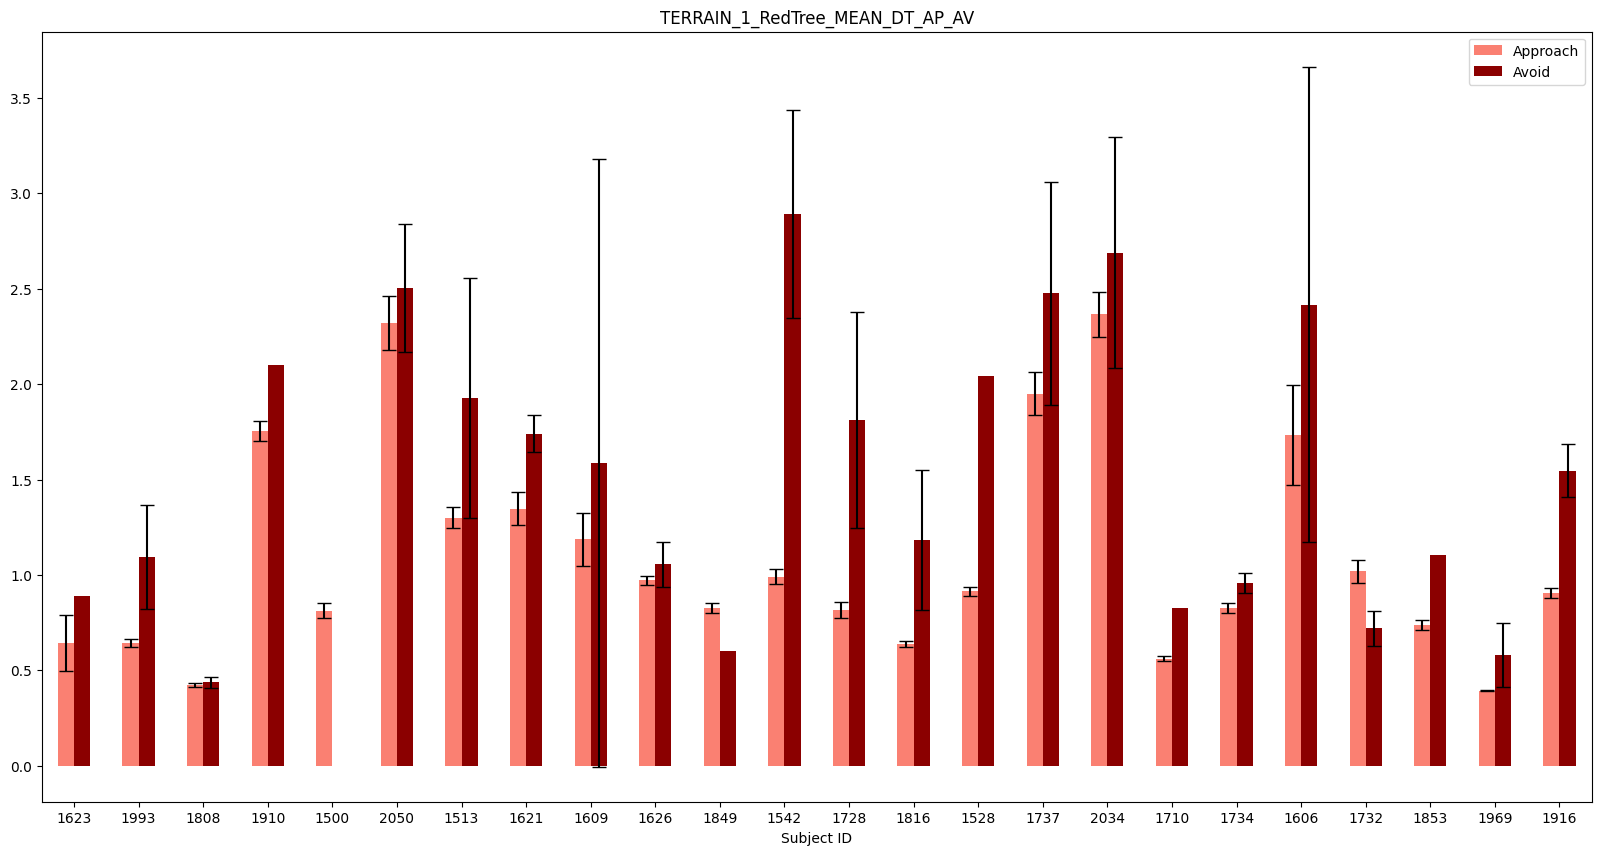

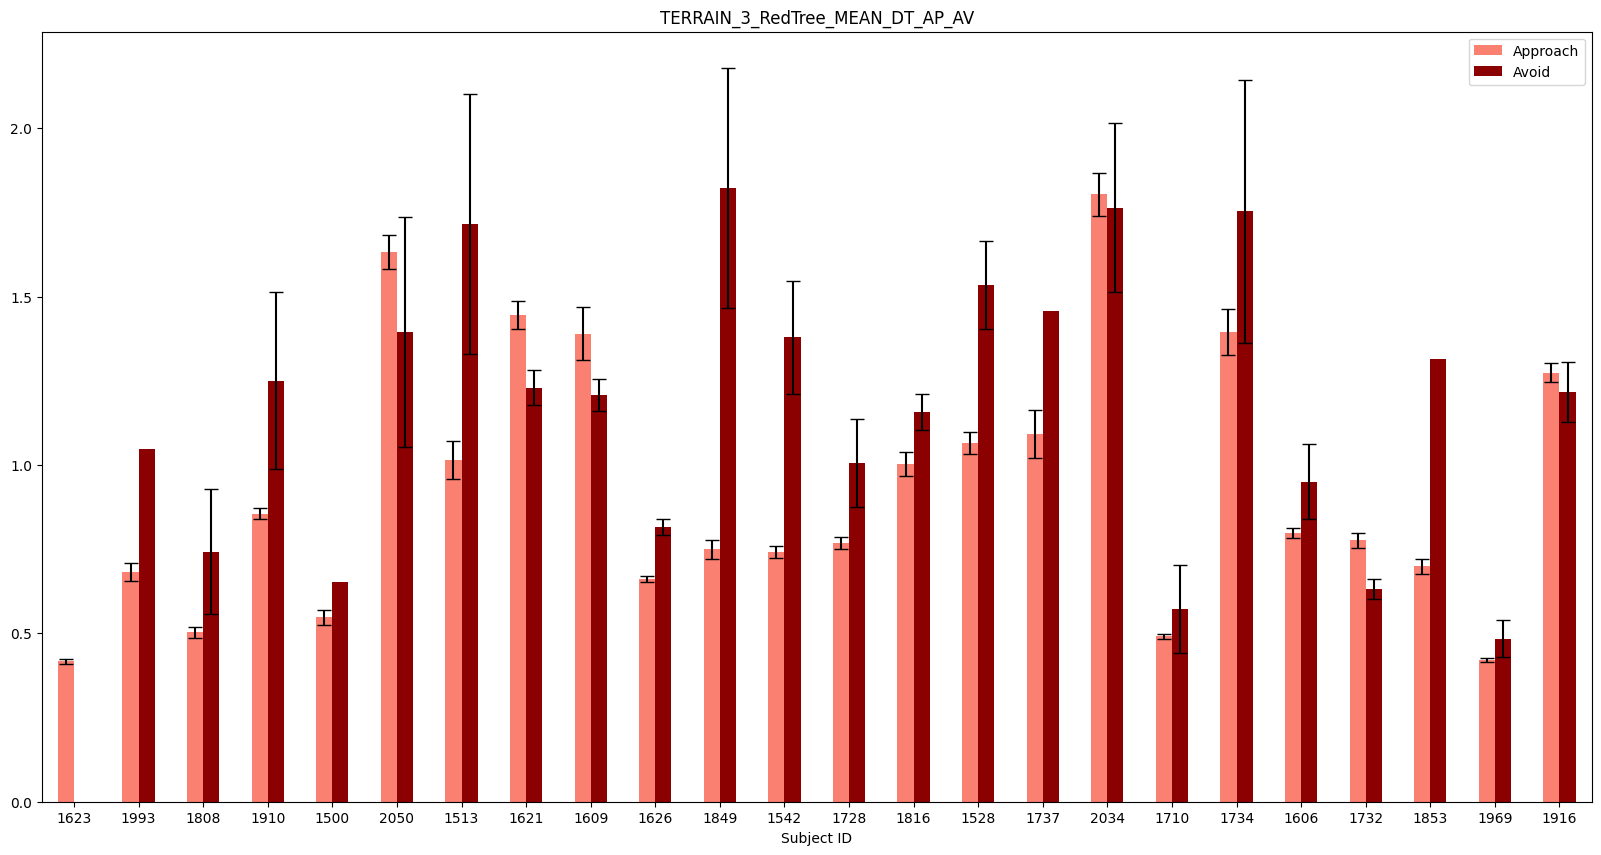

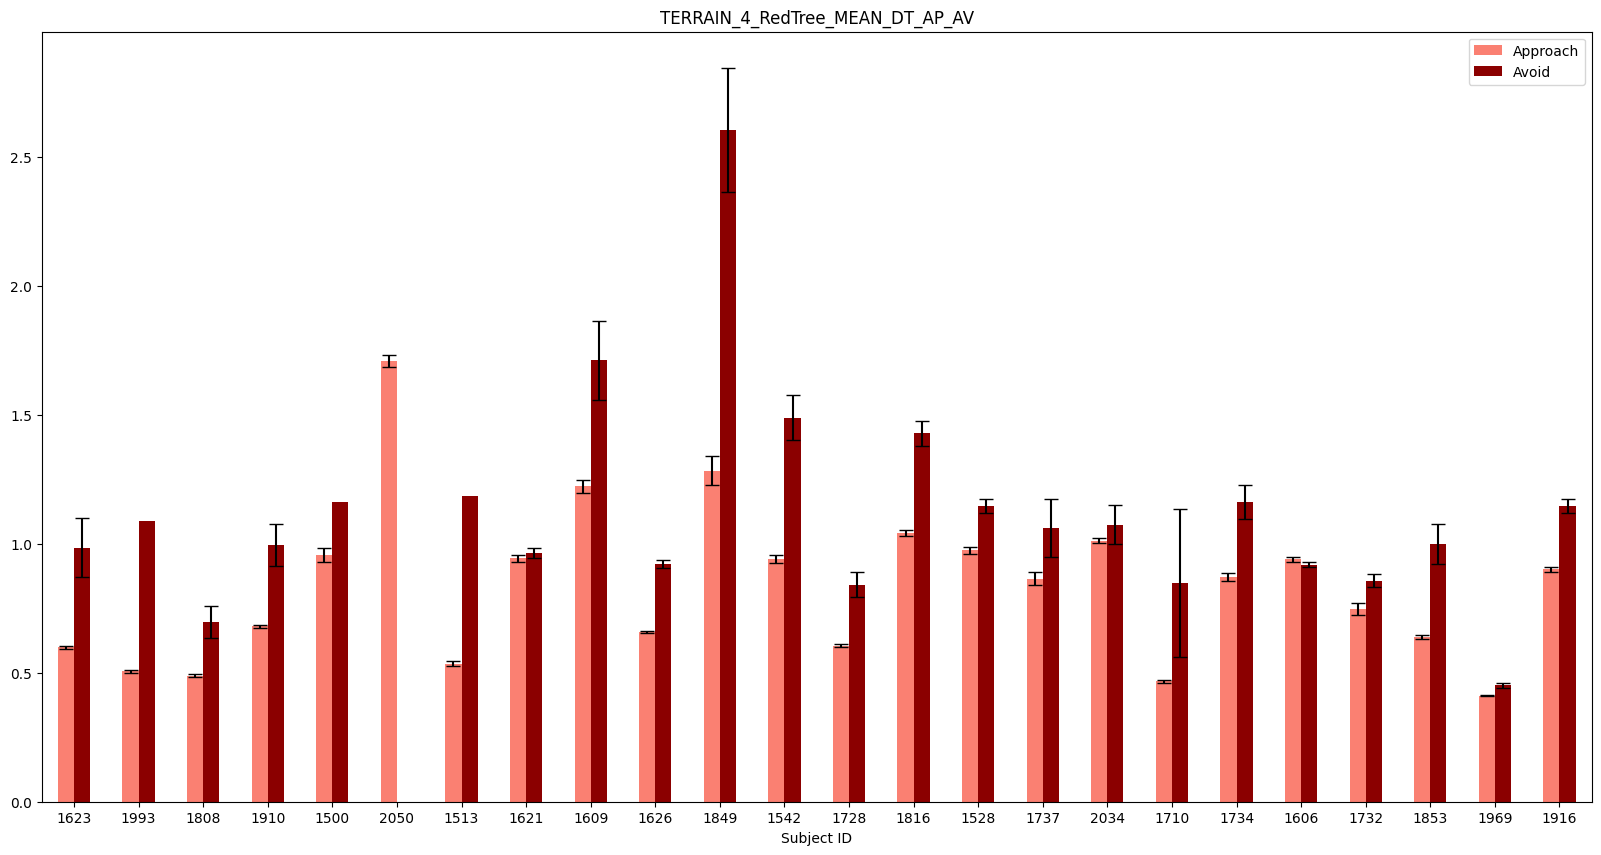

In [ ]:
#red

fig1, ax = plt.subplots()
subj['output1'].plot.bar(yerr=subj['output13'], ax=ax, capsize=5, rot=0, color = ['salmon','darkred'], figsize=(20,10), title ='TERRAIN_1_RedTree_MEAN_DT_AP_AV');

fig2, ax = plt.subplots()
subj['output2'].plot.bar(yerr=subj['output14'], ax=ax, capsize=5, rot=0, color = ['salmon','darkred'], figsize=(20,10), title ='TERRAIN_2_RedTree_MEAN_DT_AP_AV');

fig3, ax = plt.subplots()
subj['output3'].plot.bar(yerr=subj['output15'], ax=ax, capsize=5, rot=0,  color = ['salmon','darkred'], figsize=(20,10), title ='TERRAIN_3_RedTree_MEAN_DT_AP_AV');

fig4, ax = plt.subplots()
subj['output4'].plot.bar(yerr=subj['output16'], ax=ax, capsize=5, rot=0, color = ['salmon','darkred'], figsize=(20,10), title ='TERRAIN_4_RedTree_MEAN_DT_AP_AV');

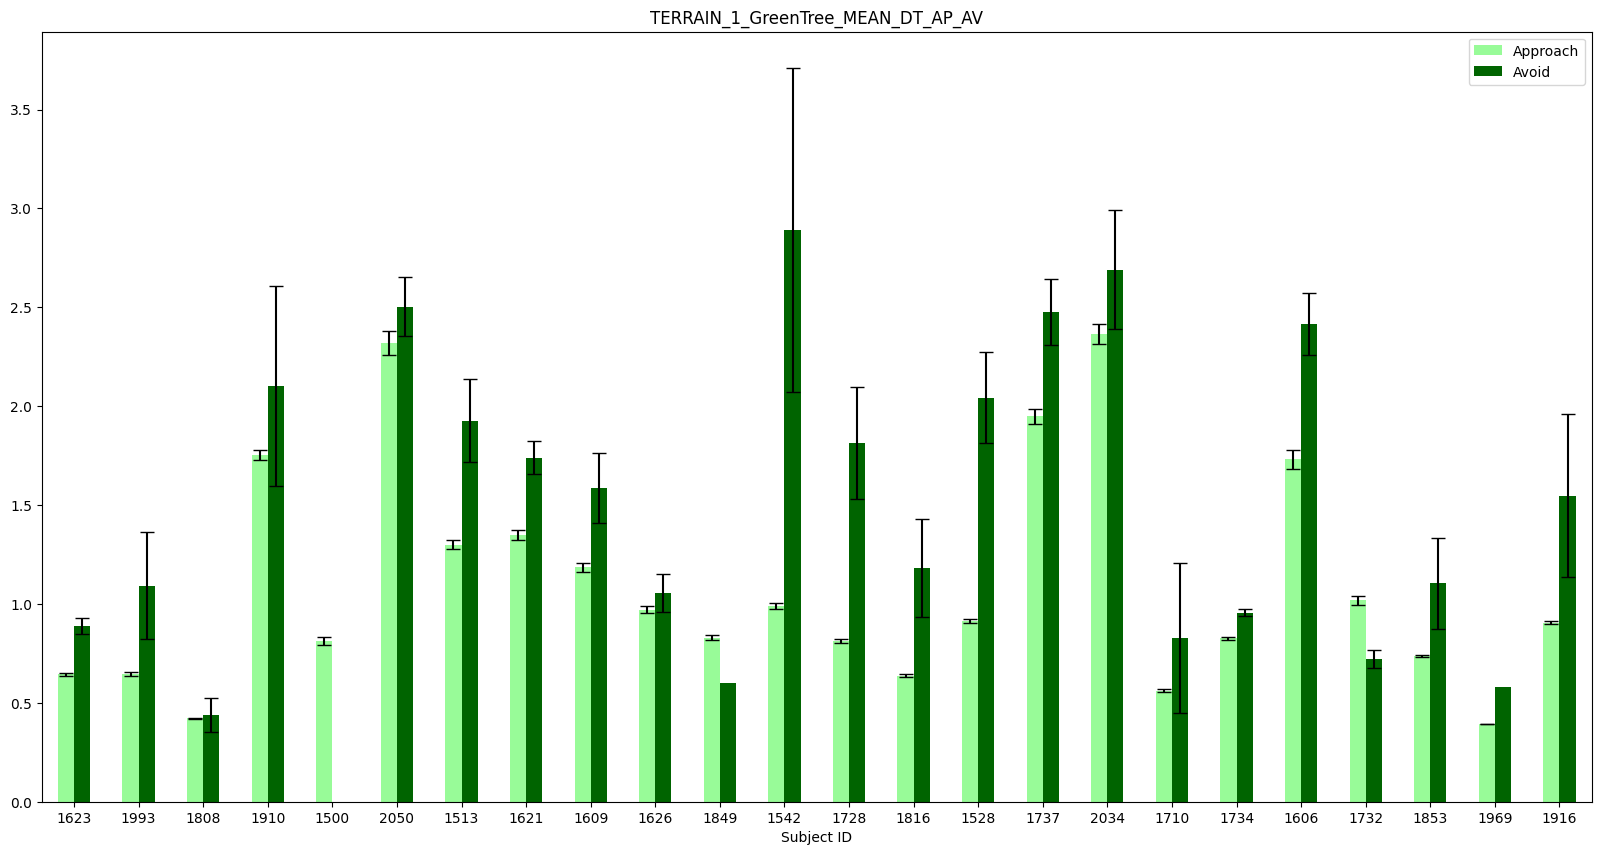

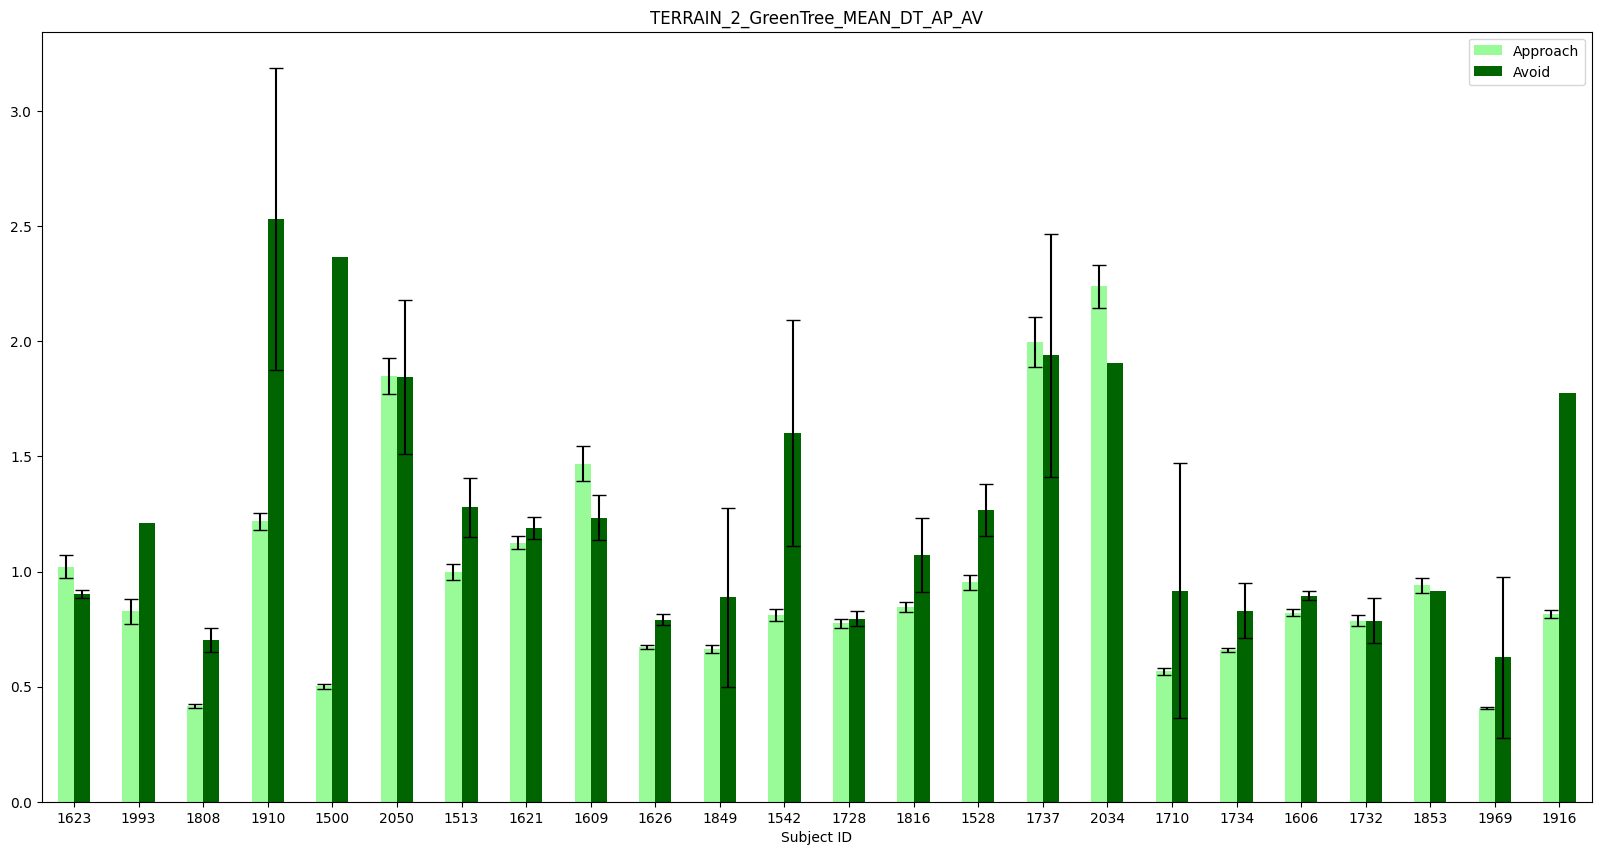

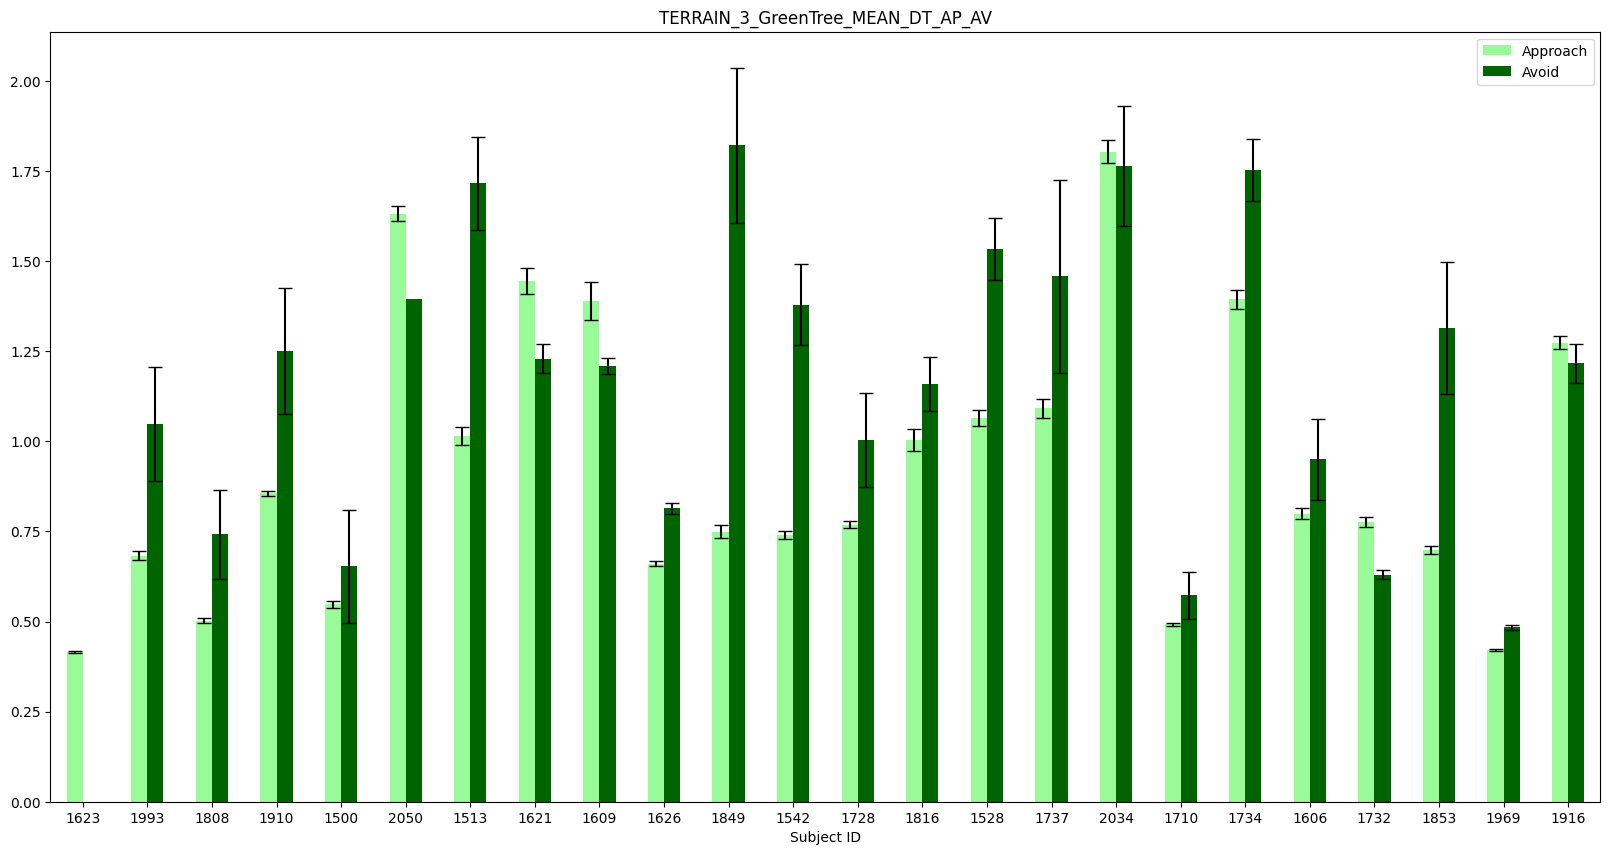

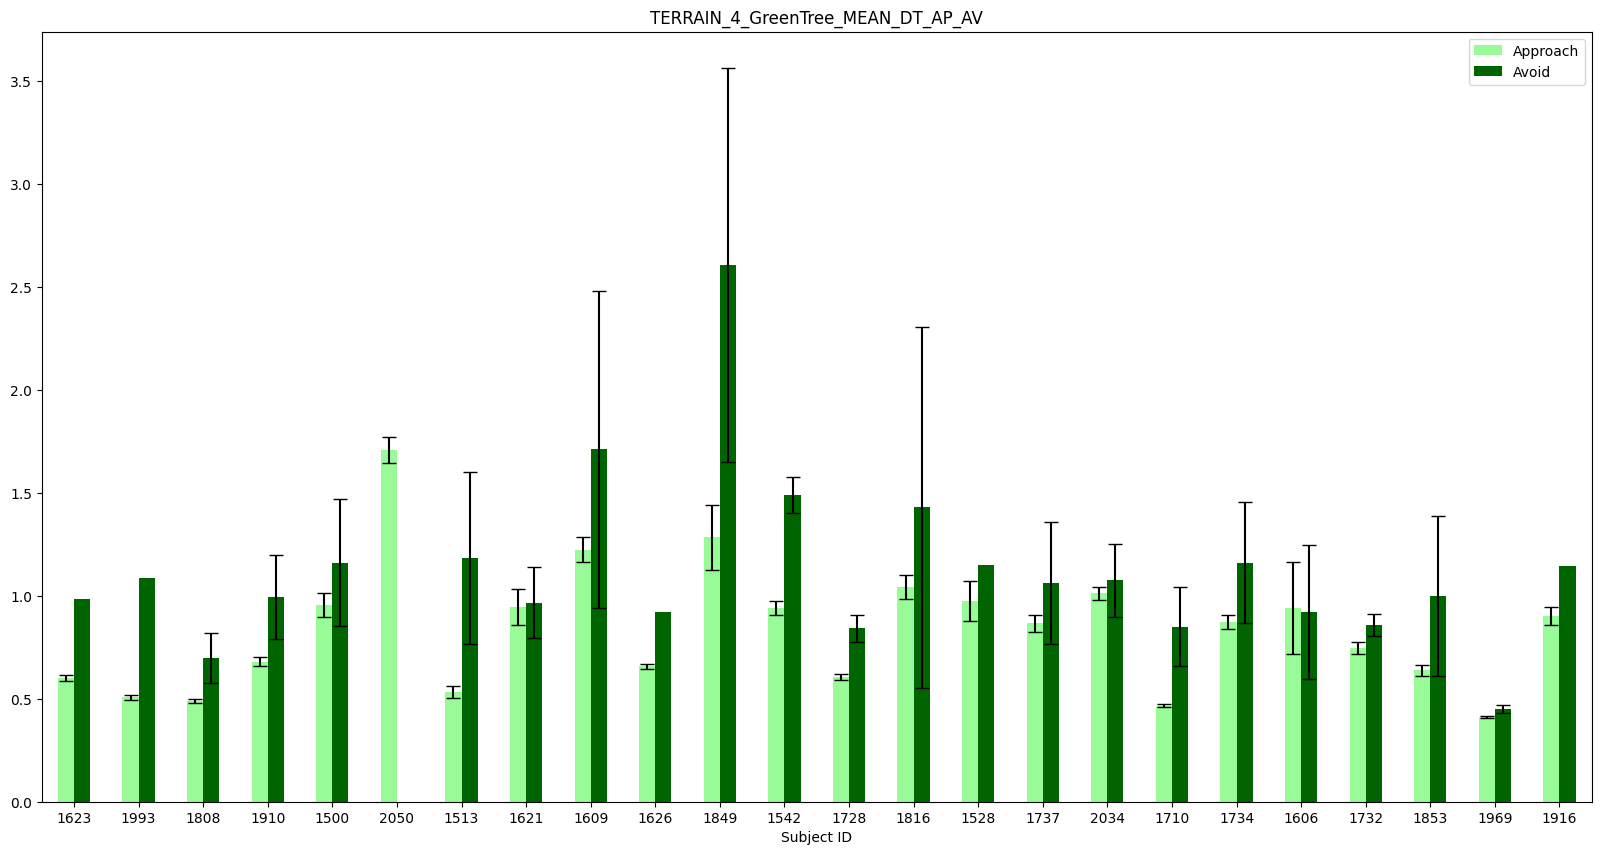

In [ ]:
#Green

fig1, ax = plt.subplots()
subj['output5'].plot.bar(yerr=subj['output17'], ax=ax, capsize=5, rot=0, color = ['palegreen','darkgreen'], figsize=(20,10), title ='TERRAIN_1_GreenTree_MEAN_DT_AP_AV');

fig2, ax = plt.subplots()
subj['output6'].plot.bar(yerr=subj['output18'], ax=ax, capsize=5, rot=0,color = ['palegreen','darkgreen'], figsize=(20,10), title ='TERRAIN_2_GreenTree_MEAN_DT_AP_AV');

fig3, ax = plt.subplots()
subj['output7'].plot.bar(yerr=subj['output19'], ax=ax, capsize=5, rot=0,color = ['palegreen','darkgreen'], figsize=(20,10), title ='TERRAIN_3_GreenTree_MEAN_DT_AP_AV');

fig4, ax = plt.subplots()
subj['output8'].plot.bar(yerr=subj['output20'], ax=ax, capsize=5, rot=0, color = ['palegreen','darkgreen'], figsize=(20,10), title ='TERRAIN_4_GreenTree_MEAN_DT_AP_AV');

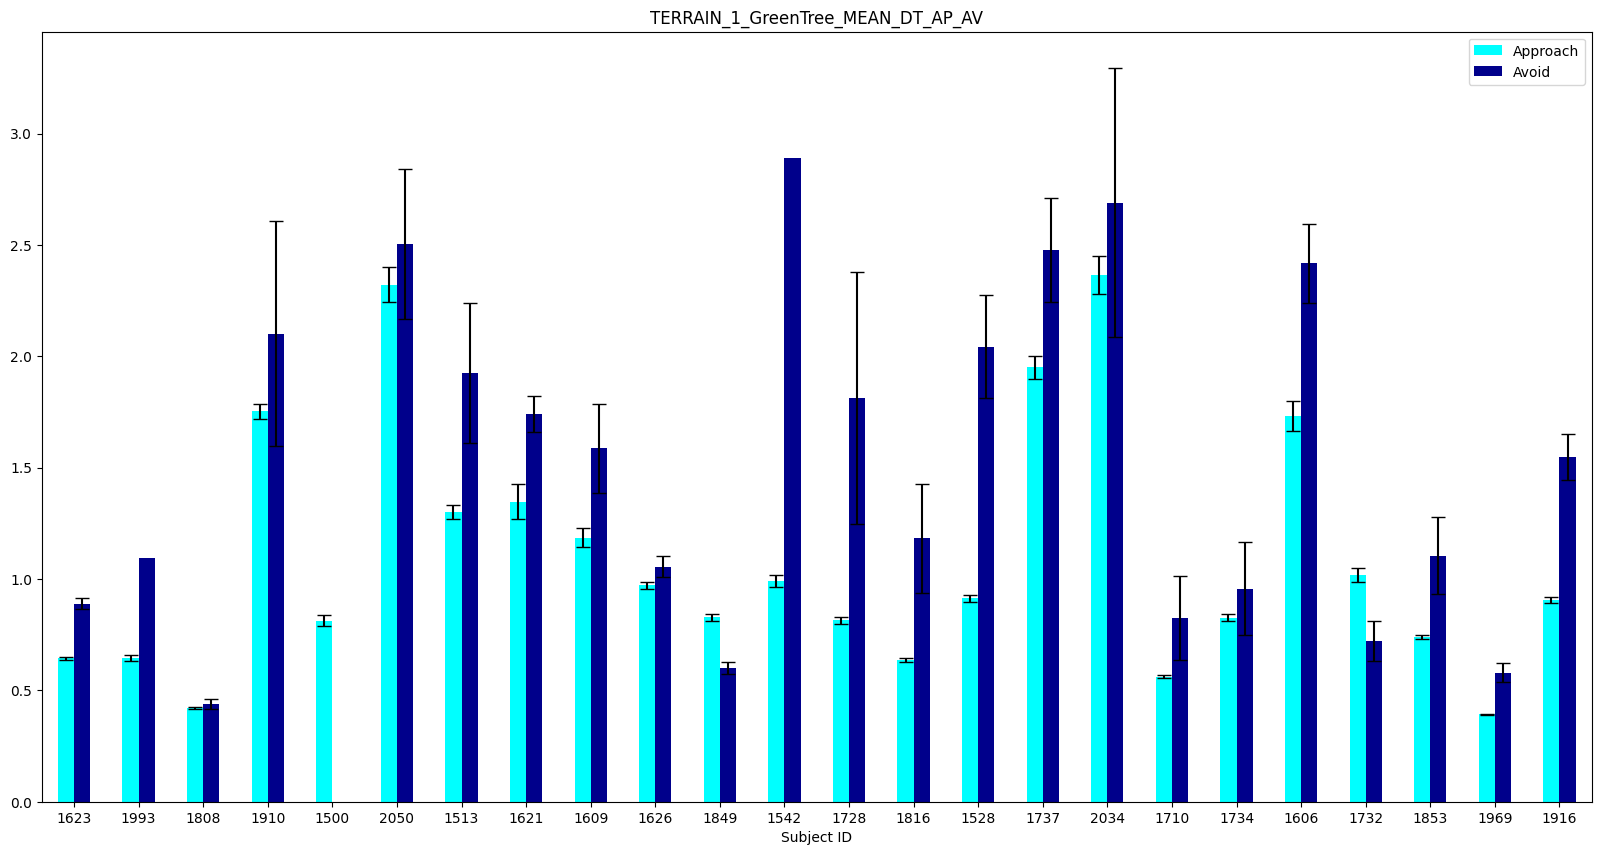

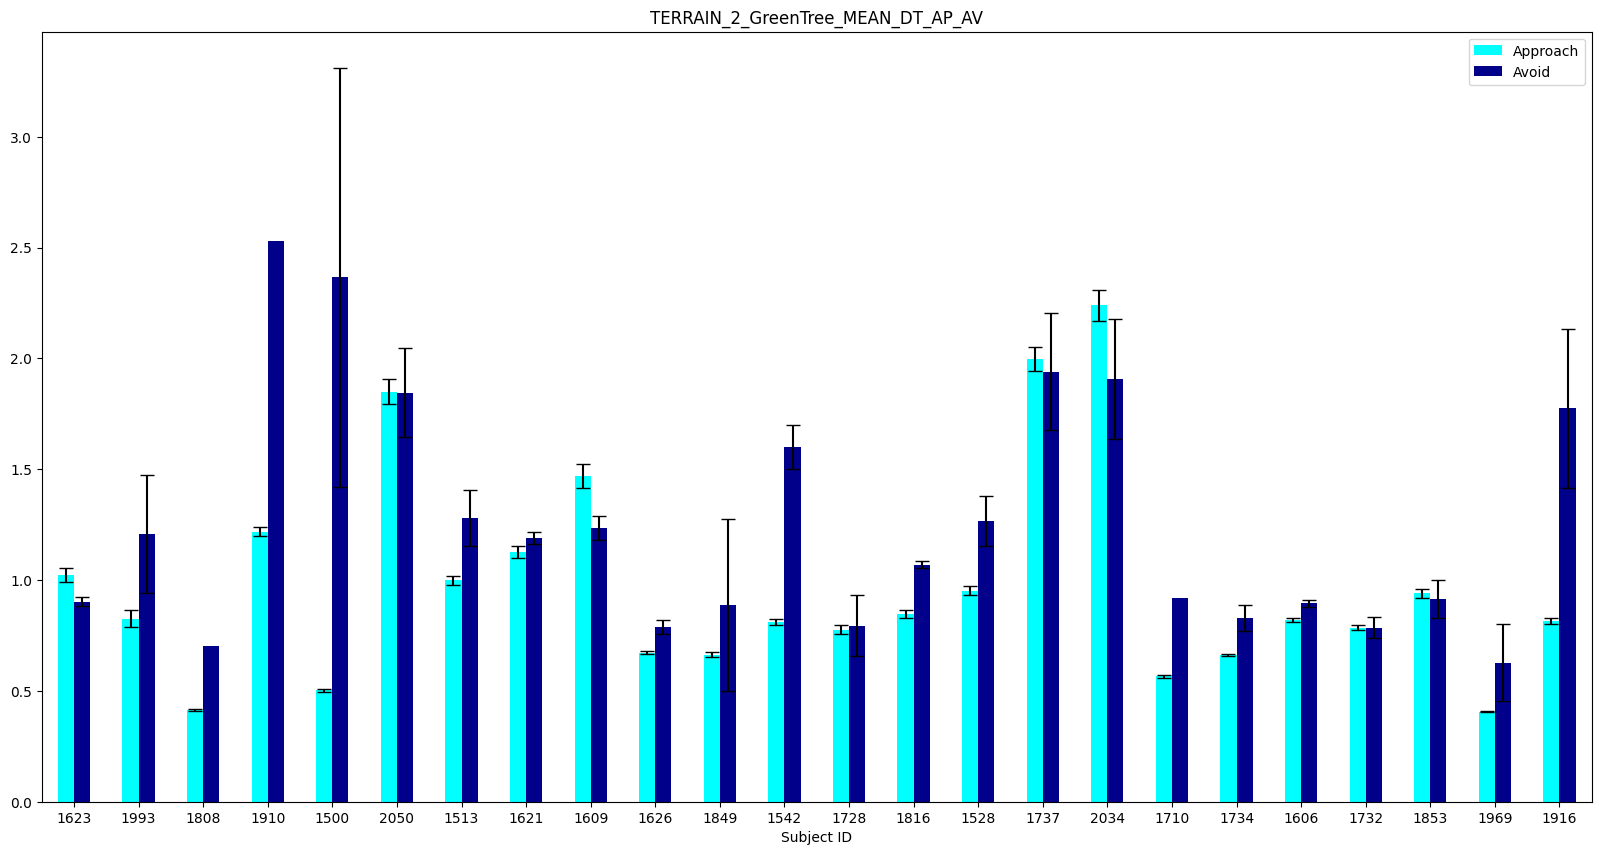

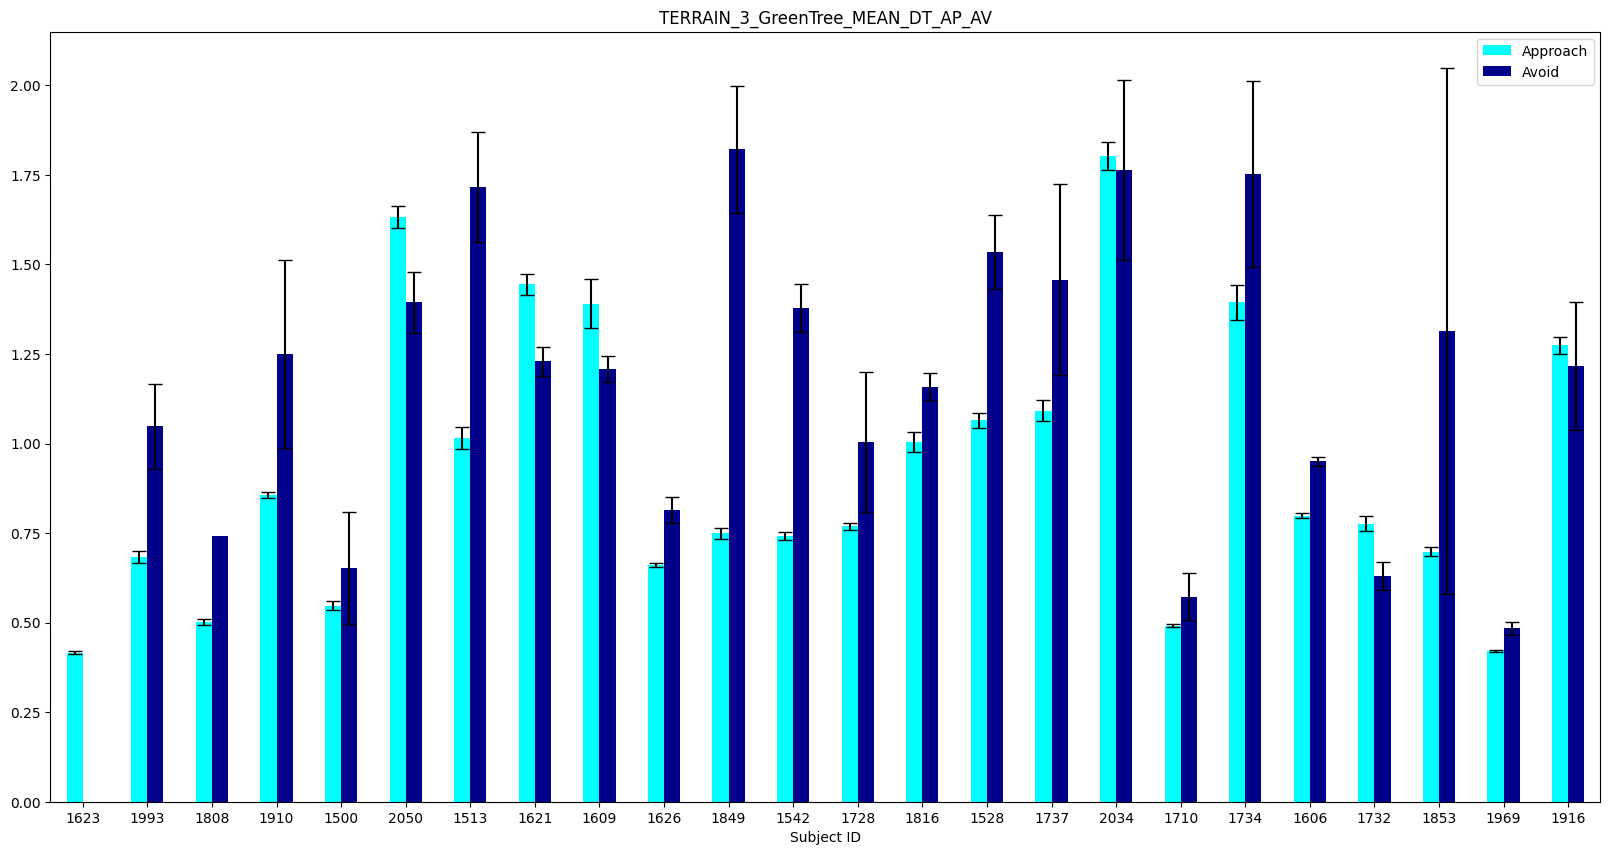

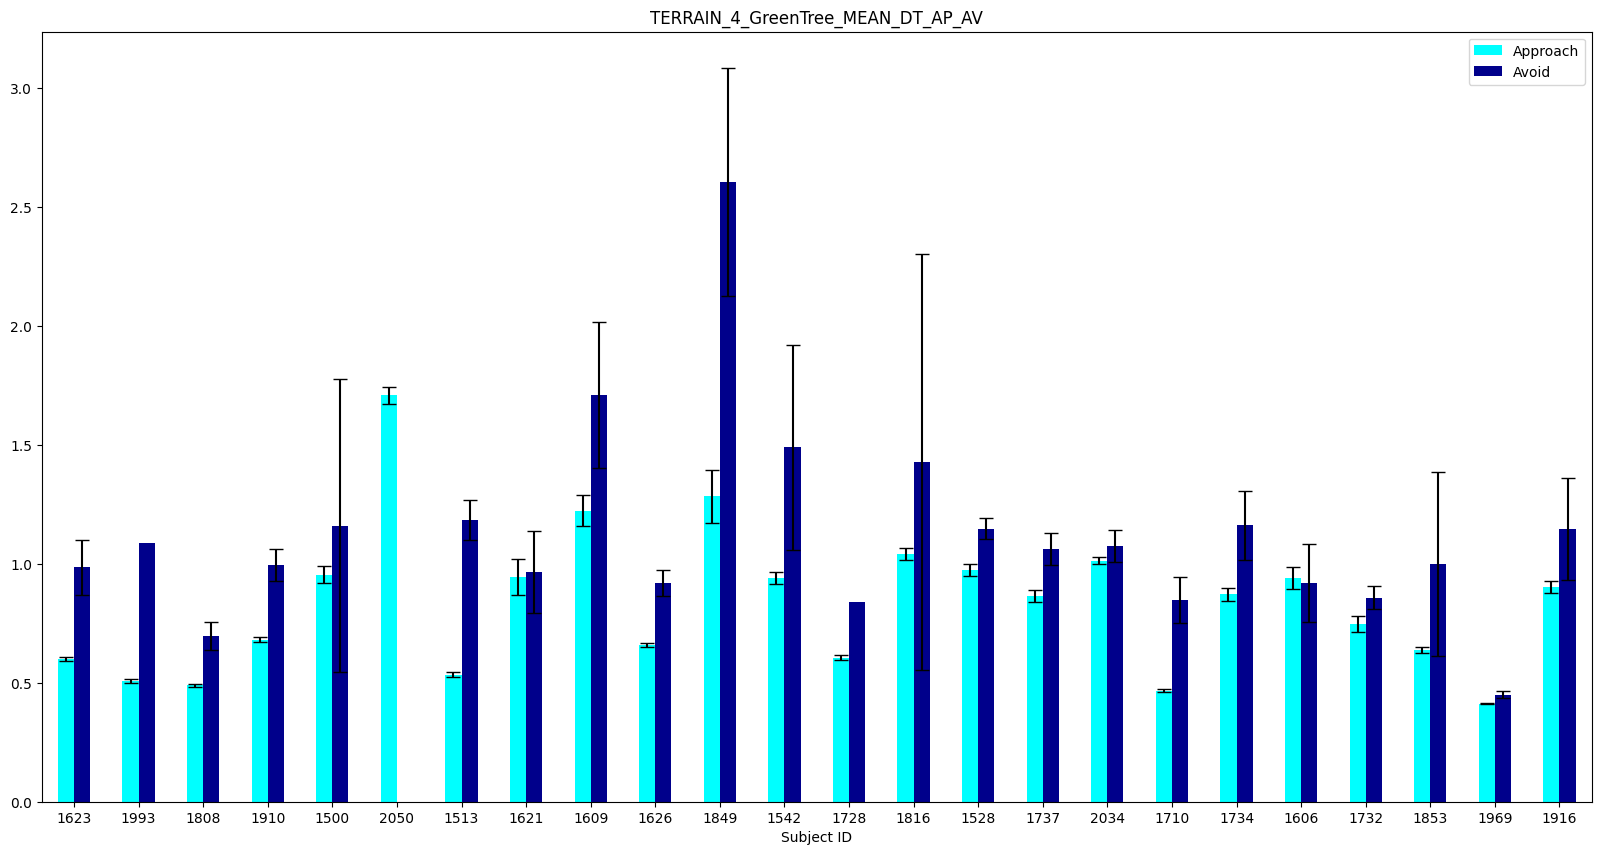

In [ ]:
#Blue

fig1, ax = plt.subplots()
subj['output9'].plot.bar(yerr=subj['output21'], ax=ax, capsize=5, rot=0 , color = ['cyan','darkblue'], figsize=(20,10), title ='TERRAIN_1_GreenTree_MEAN_DT_AP_AV');

fig2, ax = plt.subplots()
subj['output10'].plot.bar(yerr=subj['output22'], ax=ax, capsize=5, rot=0, color = ['cyan','darkblue'], figsize=(20,10), title ='TERRAIN_2_GreenTree_MEAN_DT_AP_AV');

fig3, ax = plt.subplots()
subj['output11'].plot.bar(yerr=subj['output23'], ax=ax, capsize=5, rot=0, color = ['cyan','darkblue'], figsize=(20,10), title ='TERRAIN_3_GreenTree_MEAN_DT_AP_AV');

fig4, ax = plt.subplots()
subj['output12'].plot.bar(yerr=subj['output24'], ax=ax, capsize=5, rot=0, color = ['cyan','darkblue'], figsize=(20,10), title ='TERRAIN_4_GreenTree_MEAN_DT_AP_AV');

## MEAN DT For Different groups of trait anexity wrt Terrains and Trees

In [ ]:
dx = df[df['Trait_score'] != 0]

In [ ]:
dx = dx.sort_values('Trait_score').reset_index(drop=True)

In [ ]:
lf = pd.DataFrame()
kf = ['Trait_score','Terrain_1_mean_DT','Terrain_2_mean_DT','Terrain_3_mean_DT','Terrain_4_mean_DT']

In [ ]:
lf = dx[kf]
anx = {}
low1   = []
medium1 = []
high1   = []
low2   = []
medium2 = []
high2   = []
low3   = []
medium3 = []
high3   = []
low4   = []
medium4 = []
high4   = []

anx['low1'] = low1
anx['medium1'] = medium1
anx['high1'] = high1
anx['low2'] = low2
anx['medium2'] = medium2
anx['high2'] = high2
anx['low3'] = low3
anx['medium3'] = medium3
anx['high3'] = high3
anx['low4'] = low4
anx['medium4'] = medium4
anx['high4'] = high4

In [ ]:
for terr in range(1,5):
    for i in range(len(dx)):
        if lf['Trait_score'][i] <= 37:
            anx[f'low{terr}'].append(lf[f'Terrain_{terr}_mean_DT'][i])
        elif lf['Trait_score'][i] > 37 and lf['Trait_score'][i] <= 44:
            anx[f'medium{terr}'].append(lf[f'Terrain_{terr}_mean_DT'][i])
        else:
            anx[f'high{terr}'].append(lf[f'Terrain_{terr}_mean_DT'][i])
final1 = [np.mean(i) for i in [low1, medium1, high1]]
final2 = [np.mean(i) for i in [low2, medium2, high2]]
final3 = [np.mean(i) for i in [low3, medium3, high3]]
final4 = [np.mean(i) for i in [low4, medium4, high4]]


In [ ]:
output = pd.DataFrame({"Terrain_1_mean_DT" : final1, "Terrain_2_mean_DT" : final2, "Terrain_3_mean_DT" : final3,"Terrain_4_mean_DT" : final4}, index = ["Low_Trait_Anexity","Medium_Trait_Anexity","High_Trait_Anexity"])

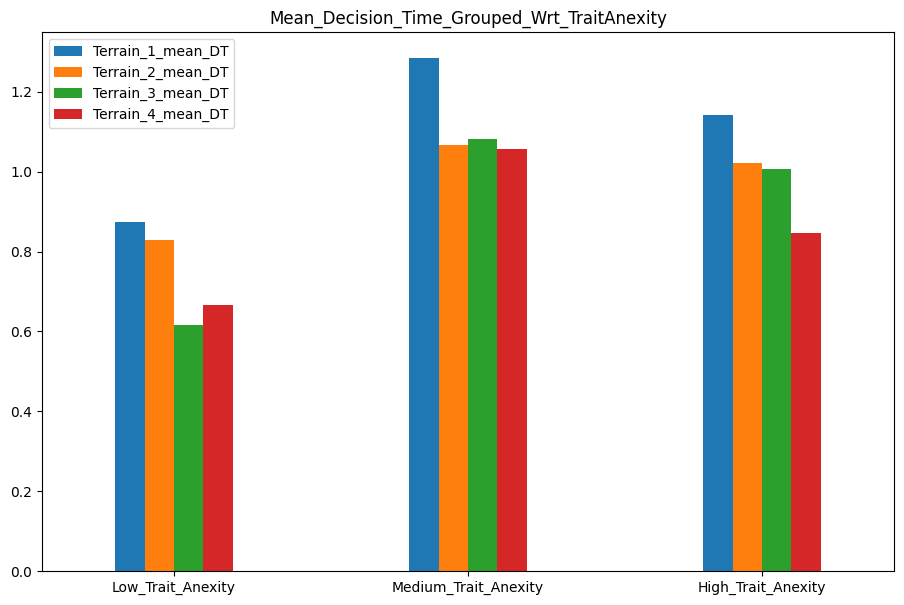

In [ ]:
output.plot.bar( figsize=(11,7), width = 0.4, title ='Mean_Decision_Time_Grouped_Wrt_TraitAnexity',rot=360);

In [ ]:
lf = pd.DataFrame()
kf = ['Trait_score','Terrain_1_Red_mean_DT','Terrain_2_Red_mean_DT','Terrain_3_Red_mean_DT','Terrain_4_Red_mean_DT']

In [ ]:
lf = dx[kf]
anx = {}
low1   = []
medium1 = []
high1   = []
low2   = []
medium2 = []
high2   = []
low3   = []
medium3 = []
high3   = []
low4   = []
medium4 = []
high4   = []

anx['low1'] = low1
anx['medium1'] = medium1
anx['high1'] = high1
anx['low2'] = low2
anx['medium2'] = medium2
anx['high2'] = high2
anx['low3'] = low3
anx['medium3'] = medium3
anx['high3'] = high3
anx['low4'] = low4
anx['medium4'] = medium4
anx['high4'] = high4

In [ ]:
for terr in range(1,5):
    for i in range(len(dx)):
        if lf['Trait_score'][i] <= 37:
            anx[f'low{terr}'].append(lf[f'Terrain_{terr}_Red_mean_DT'][i])
        elif lf['Trait_score'][i] > 37 and lf['Trait_score'][i] <= 44:
            anx[f'medium{terr}'].append(lf[f'Terrain_{terr}_Red_mean_DT'][i])
        else:
            anx[f'high{terr}'].append(lf[f'Terrain_{terr}_Red_mean_DT'][i])
final1 = [np.mean(i) for i in [low1, medium1, high1]]
final2 = [np.mean(i) for i in [low2, medium2, high2]]
final3 = [np.mean(i) for i in [low3, medium3, high3]]
final4 = [np.mean(i) for i in [low4, medium4, high4]]

In [ ]:
output = pd.DataFrame({"Terrain_1_Red_mean_DT" : final1, "Terrain_2_Red_mean_DT" : final2, "Terrain_3_Red_mean_DT" : final3,"Terrain_4_Red_mean_DT" : final4}, index = ["Low_Trait_Anexity","Medium_Trait_Anexity","High_Trait_Anexity"])

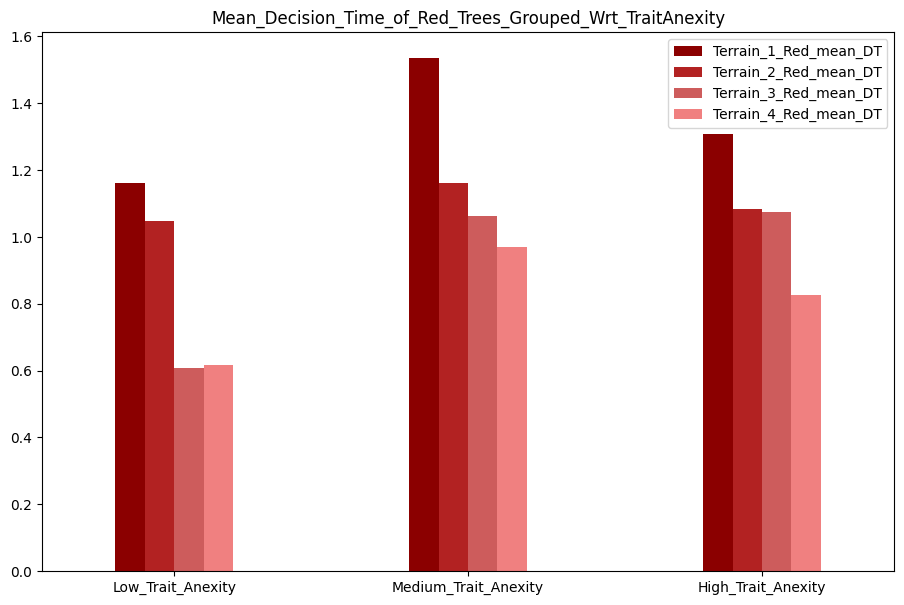

In [ ]:
output.plot.bar( figsize=(11,7), width = 0.4, color=['darkred', 'firebrick','indianred', 'lightcoral' ], title ='Mean_Decision_Time_of_Red_Trees_Grouped_Wrt_TraitAnexity',rot=360);

In [ ]:
lf = pd.DataFrame()
kf = ['Trait_score','Terrain_1_Blue_mean_DT','Terrain_2_Blue_mean_DT','Terrain_3_Blue_mean_DT','Terrain_4_Blue_mean_DT']
lf = dx[kf]
anx = {}
low1   = []
medium1 = []
high1   = []
low2   = []
medium2 = []
high2   = []
low3   = []
medium3 = []
high3   = []
low4   = []
medium4 = []
high4   = []

anx['low1'] = low1
anx['medium1'] = medium1
anx['high1'] = high1
anx['low2'] = low2
anx['medium2'] = medium2
anx['high2'] = high2
anx['low3'] = low3
anx['medium3'] = medium3
anx['high3'] = high3
anx['low4'] = low4
anx['medium4'] = medium4
anx['high4'] = high4


for terr in range(1,5):
    for i in range(len(dx)):
        if lf['Trait_score'][i] <= 37:
            anx[f'low{terr}'].append(lf[f'Terrain_{terr}_Blue_mean_DT'][i])
        elif lf['Trait_score'][i] > 37 and lf['Trait_score'][i] <= 44:
            anx[f'medium{terr}'].append(lf[f'Terrain_{terr}_Blue_mean_DT'][i])
        else:
            anx[f'high{terr}'].append(lf[f'Terrain_{terr}_Blue_mean_DT'][i])
final1 = [np.mean(i) for i in [low1, medium1, high1]]
final2 = [np.mean(i) for i in [low2, medium2, high2]]
final3 = [np.mean(i) for i in [low3, medium3, high3]]
final4 = [np.mean(i) for i in [low4, medium4, high4]]

In [ ]:
output = pd.DataFrame({"Terrain_1_Blue_mean_DT" : final1, "Terrain_2_Blue_mean_DT" : final2, "Terrain_3_Blue_mean_DT" : final3,"Terrain_4_Blue_mean_DT" : final4}, index = ["Low_Trait_Anexity","Medium_Trait_Anexity","High_Trait_Anexity"])

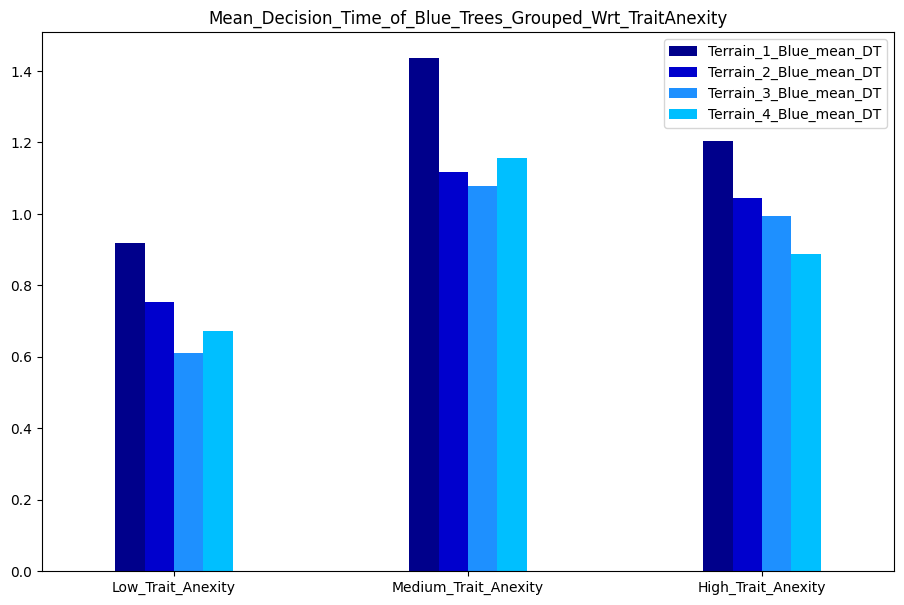

In [ ]:
output.plot.bar( figsize=(11,7), width = 0.4, color=['darkblue', 'mediumblue', 'dodgerblue','deepskyblue'], title ='Mean_Decision_Time_of_Blue_Trees_Grouped_Wrt_TraitAnexity',rot=360);

In [ ]:
lf = pd.DataFrame()
kf = ['Trait_score','Terrain_1_Green_mean_DT','Terrain_2_Green_mean_DT','Terrain_3_Green_mean_DT','Terrain_4_Green_mean_DT']
lf = dx[kf]
anx = {}
low1   = []
medium1 = []
high1   = []
low2   = []
medium2 = []
high2   = []
low3   = []
medium3 = []
high3   = []
low4   = []
medium4 = []
high4   = []

anx['low1'] = low1
anx['medium1'] = medium1
anx['high1'] = high1
anx['low2'] = low2
anx['medium2'] = medium2
anx['high2'] = high2
anx['low3'] = low3
anx['medium3'] = medium3
anx['high3'] = high3
anx['low4'] = low4
anx['medium4'] = medium4
anx['high4'] = high4


for terr in range(1,5):
    for i in range(len(dx)):
        if lf['Trait_score'][i] <= 37:
            anx[f'low{terr}'].append(lf[f'Terrain_{terr}_Green_mean_DT'][i])
        elif lf['Trait_score'][i] > 37 and lf['Trait_score'][i] <= 44:
            anx[f'medium{terr}'].append(lf[f'Terrain_{terr}_Green_mean_DT'][i])
        else:
            anx[f'high{terr}'].append(lf[f'Terrain_{terr}_Green_mean_DT'][i])
final1 = [np.mean(i) for i in [low1, medium1, high1]]
final2 = [np.mean(i) for i in [low2, medium2, high2]]
final3 = [np.mean(i) for i in [low3, medium3, high3]]
final4 = [np.mean(i) for i in [low4, medium4, high4]]


In [ ]:
output = pd.DataFrame({"Terrain_1_Green_mean_DT" : final1, "Terrain_2Green__mean_DT" : final2, "Terrain_3Green__mean_DT" : final3,"Terrain_4_Green_mean_DT" : final4}, index = ["Low_Trait_Anexity","Medium_Trait_Anexity","High_Trait_Anexity"])

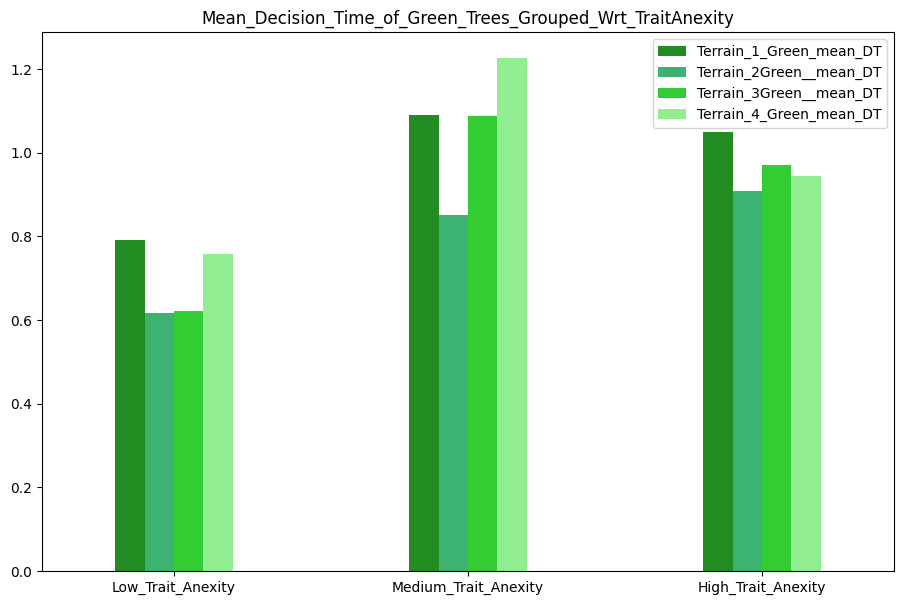

In [ ]:
output.plot.bar( figsize=(11,7), width = 0.4, color=['forestgreen', 'mediumseagreen','limegreen', 'lightgreen' ], title ='Mean_Decision_Time_of_Green_Trees_Grouped_Wrt_TraitAnexity',rot=360);